Details given about the project - This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

Objective of the project- The prediction task is to determine whether a person makes over $50K a year. We will be doing classification.

The solution for the project is provided below-

lets import all the packages we need inorder to do eda, non-visual and visual data analysis.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from sklearn import *
import statsmodels.api as sm
import networkx as nx
import requests
from flask import Flask
import sqlalchemy
import pytest
import tkinter as tk
import openpyxl

Now lets upload the database from the url and create a dataframe from it.

In [2]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
census_income_data = pd.read_csv(url)
print(census_income_data)

       Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divor

lets get the first 30 values from the dataframe

In [15]:
census_income_data.head(30)

Age          Workclass  Fnlwgt      Education  Education_num  \
0    50   Self-emp-not-inc   83311      Bachelors             13   
1    38            Private  215646        HS-grad              9   
2    53            Private  234721           11th              7   
3    28            Private  338409      Bachelors             13   
4    37            Private  284582        Masters             14   
5    49            Private  160187            9th              5   
6    52   Self-emp-not-inc  209642        HS-grad              9   
7    31            Private   45781        Masters             14   
8    42            Private  159449      Bachelors             13   
9    37            Private  280464   Some-college             10   
10   30          State-gov  141297      Bachelors             13   
11   23            Private  122272      Bachelors             13   
12   32            Private  205019     Assoc-acdm             12   
13   40            Private  121772      Assoc-voc             11   
14   34            Private  245487        7th-8th              4   
15   25   Self-emp-not-inc  176756        HS-grad              9   
16   32            Private  186824        HS-grad              9   
17   38            Private   28887           11th              7   
18   43   Self-emp-not-inc  292175        Masters             14   
19   40            Private  193524      Doctorate             16   
20   54            Private  302146        HS-grad              9   
21   35        Federal-gov   76845            9th              5   
22   43            Private  117037           11th              7   
23   59            Private  109015        HS-grad              9   
24   56          Local-gov  216851      Bachelors             13   
25   19            Private  168294        HS-grad              9   
26   54                  ?  180211   Some-college             10   
27   39            Private  367260        HS-grad              9   
28   49            Private  193366        HS-grad              9   
29   23          Local-gov  190709     Assoc-acdm             12   

            Marital_status          Occupation    Relationship  \
0       Married-civ-spouse     Exec-managerial         Husband   
1                 Divorced   Handlers-cleaners   Not-in-family   
2       Married-civ-spouse   Handlers-cleaners         Husband   
3       Married-civ-spouse      Prof-specialty            Wife   
4       Married-civ-spouse     Exec-managerial            Wife   
5    Married-spouse-absent       Other-service   Not-in-family   
6       Married-civ-spouse     Exec-managerial         Husband   
7            Never-married      Prof-specialty   Not-in-family   
8       Married-civ-spouse     Exec-managerial         Husband   
9       Married-civ-spouse     Exec-managerial         Husband   
10      Married-civ-spouse      Prof-specialty         Husband   
11           Never-married        Adm-clerical       Own-child   
12           Never-married               Sales   Not-in-family   
13      Married-civ-spouse        Craft-repair         Husband   
14      Married-civ-spouse    Transport-moving         Husband   
15           Never-married     Farming-fishing       Own-child   
16           Never-married   Machine-op-inspct       Unmarried   
17      Married-civ-spouse               Sales         Husband   
18                Divorced     Exec-managerial       Unmarried   
19      Married-civ-spouse      Prof-specialty         Husband   
20               Separated       Other-service       Unmarried   
21      Married-civ-spouse     Farming-fishing         Husband   
22      Married-civ-spouse    Transport-moving         Husband   
23                Divorced        Tech-support       Unmarried   
24      Married-civ-spouse        Tech-support         Husband   
25           Never-married        Craft-repair       Own-child   
26      Married-civ-spouse                   ?         Husband   
27                Divorced     Exec-managerial 

lets get the last 30 values from the dataframe

In [16]:
census_income_data.tail(30)

Age          Workclass  Fnlwgt      Education  Education_num  \
32530   30                  ?   33811      Bachelors             13   
32531   34            Private  204461      Doctorate             16   
32532   54            Private  337992      Bachelors             13   
32533   37            Private  179137   Some-college             10   
32534   22            Private  325033           12th              8   
32535   34            Private  160216      Bachelors             13   
32536   30            Private  345898        HS-grad              9   
32537   38            Private  139180      Bachelors             13   
32538   71                  ?  287372      Doctorate             16   
32539   45          State-gov  252208        HS-grad              9   
32540   41                  ?  202822        HS-grad              9   
32541   72                  ?  129912        HS-grad              9   
32542   45          Local-gov  119199     Assoc-acdm             12   
32543   31            Private  199655        Masters             14   
32544   39          Local-gov  111499     Assoc-acdm             12   
32545   37            Private  198216     Assoc-acdm             12   
32546   43            Private  260761        HS-grad              9   
32547   65   Self-emp-not-inc   99359    Prof-school             15   
32548   43          State-gov  255835   Some-college             10   
32549   43   Self-emp-not-inc   27242   Some-college             10   
32550   32            Private   34066           10th              6   
32551   43            Private   84661      Assoc-voc             11   
32552   32            Private  116138        Masters             14   
32553   53            Private  321865        Masters             14   
32554   22            Private  310152   Some-college             10   
32555   27            Private  257302     Assoc-acdm             12   
32556   40            Private  154374        HS-grad              9   
32557   58            Private  151910        HS-grad              9   
32558   22            Private  201490        HS-grad              9   
32559   52       Self-emp-inc  287927        HS-grad              9   

            Marital_status          Occupation     Relationship  \
32530        Never-married                   ?    Not-in-family   
32531   Married-civ-spouse      Prof-specialty          Husband   
32532   Married-civ-spouse     Exec-managerial          Husband   
32533             Divorced        Adm-clerical        Unmarried   
32534        Never-married     Protective-serv        Own-child   
32535        Never-married     Exec-managerial    Not-in-family   
32536        Never-married        Craft-repair    Not-in-family   
32537             Divorced      Prof-specialty        Unmarried   
32538   Married-civ-spouse                   ?          Husband   
32539            Separated        Adm-clerical        Own-child   
32540            Separated                   ?    Not-in-family   
32541   Married-civ-spouse                   ?          Husband   
32542             Divorced      Prof-specialty        Unmarried   
32543             Divorced       Other-service    Not-in-family   
32544   Married-civ-spouse        Adm-clerical             Wife   
32545             Divorced        Tech-support    Not-in-family   
32546   Married-civ-spouse   Machine-op-inspct          Husband   
32547        Never-married      Prof-specialty    Not-in-family   
32548             Divorced        Adm-clerical   Other-relative   
32549   Married-civ-spouse        Craft-repair          Husband   
32550   Married-civ-spouse   Handlers-cleaners          Husband   
32551   Married-civ-spouse               Sales          Husband   
32552        Never-married        Tech-support    Not-in-family   
32553   Married-civ-spouse     Exec-managerial          Husband   
32554        Never-married     Protective-serv    Not-in-family   
32555   Married-civ-spouse        Tech-support             Wife

now lets label encode few column to get the integer values from their non-integer data.

In [3]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race','Sex','Native_country','Income']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    census_income_data[column] = label_encoder.fit_transform(census_income_data[column])

now lets check the data for the converted columns.

In [18]:
census_income_data.head(30)

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0    50          6   83311          9             13               2   
1    38          4  215646         11              9               0   
2    53          4  234721          1              7               2   
3    28          4  338409          9             13               2   
4    37          4  284582         12             14               2   
5    49          4  160187          6              5               3   
6    52          6  209642         11              9               2   
7    31          4   45781         12             14               4   
8    42          4  159449          9             13               2   
9    37          4  280464         15             10               2   
10   30          7  141297          9             13               2   
11   23          4  122272          9             13               4   
12   32          4  205019          7             12               4   
13   40          4  121772          8             11               2   
14   34          4  245487          5              4               2   
15   25          6  176756         11              9               4   
16   32          4  186824         11              9               4   
17   38          4   28887          1              7               2   
18   43          6  292175         12             14               0   
19   40          4  193524         10             16               2   
20   54          4  302146         11              9               5   
21   35          1   76845          6              5               2   
22   43          4  117037          1              7               2   
23   59          4  109015         11              9               0   
24   56          2  216851          9             13               2   
25   19          4  168294         11              9               4   
26   54          0  180211         15             10               2   
27   39          4  367260         11              9               0   
28   49          4  193366         11              9               2   
29   23          2  190709          7             12               4   

    Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0            4             0     4    1             0             0   
1            6             1     4    1             0             0   
2            6             0     2    1             0             0   
3           10             5     2    0             0             0   
4            4             5     4    0             0             0   
5            8             1     2    0             0             0   
6            4             0     4    1             0             0   
7           10             1     4    0         14084             0   
8            4             0     4    1          5178             0   
9            4             0     2    1             0             0   
10          10             0     1    1             0             0   
11           1             3     4    0             0             0   
12          12             1     2    1             0             0   
13           3             0     1    1             0             0   
14          14             0     0    1             0             0   
15           5             3     4    1             0             0   
16           7             4     4    1             0             0   
17          12             0     4    1             0             0   
18           4             4     4    0             0             0   
19          10             0     4    1             0             0   
20           8             4     2    0             0             0   
21           5             0     2    1             0             0   
22          14             0     4    1             0          2042   
23          13             4     4    0             0             0

In [19]:
census_income_data.tail(30)

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
32530   30          0   33811          9             13               4   
32531   34          4  204461         10             16               2   
32532   54          4  337992          9             13               2   
32533   37          4  179137         15             10               0   
32534   22          4  325033          2              8               4   
32535   34          4  160216          9             13               4   
32536   30          4  345898         11              9               4   
32537   38          4  139180          9             13               0   
32538   71          0  287372         10             16               2   
32539   45          7  252208         11              9               5   
32540   41          0  202822         11              9               5   
32541   72          0  129912         11              9               2   
32542   45          2  119199          7             12               0   
32543   31          4  199655         12             14               0   
32544   39          2  111499          7             12               2   
32545   37          4  198216          7             12               0   
32546   43          4  260761         11              9               2   
32547   65          6   99359         14             15               4   
32548   43          7  255835         15             10               0   
32549   43          6   27242         15             10               2   
32550   32          4   34066          0              6               2   
32551   43          4   84661          8             11               2   
32552   32          4  116138         12             14               4   
32553   53          4  321865         12             14               2   
32554   22          4  310152         15             10               4   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
32530           0             1     1    0             0             0   
32531          10             0     4    1             0             0   
32532           4             0     1    1             0             0   
32533           1             4     4    0             0             0   
32534          11             3     2    1             0             0   
32535           4             1     4    0             0             0   
32536           3             1     2    1             0             0   
32537          10             4     2    0         15020             0   
32538           0             0     4    1             0             0   
32539           1             3     4    0             0             0   
32540           0             1     2    0             0             0   
32541           0             0     4    1             0             0   
32542          10             4     4    0             0             0   
32543           8             1     3    0             0             0   
32544           1             5     4    0             0             0   
32545          13             1     4    0             0             0   
32546           7             0     4    1             0             0   
32547          10             1     4    1          1086             0   
32548           1             2     4    0             0             0   
32549           3             0     4    1             0             0   
32550           6             0     0    1             0             0   
32551          12             0     4    1           

It seems that all the columns have integer values.

Now lets check for null -values in the dataframe.

In [20]:
census_income_data.isnull().sum().sum()

0

There are zero null values in the dataframe

Now lets check the data types in the dataframe.

In [21]:
census_income_data.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

lets convert all the non-float columns into float datatypes using the astype(float) command.

In [4]:
census_income_data['Age'] = census_income_data['Age'].astype(float)
census_income_data['Workclass'] = census_income_data['Workclass'].astype(float)
census_income_data['Fnlwgt'] = census_income_data['Fnlwgt'].astype(float)
census_income_data['Education'] = census_income_data['Education'].astype(float)
census_income_data['Education_num'] = census_income_data['Education_num'].astype(float)
census_income_data['Marital_status'] = census_income_data['Marital_status'].astype(float)
census_income_data['Occupation'] = census_income_data['Occupation'].astype(float)
census_income_data['Relationship'] = census_income_data['Relationship'].astype(float)
census_income_data['Race'] = census_income_data['Race'].astype(float)
census_income_data['Sex'] = census_income_data['Sex'].astype(float)
census_income_data['Capital_gain'] = census_income_data['Capital_gain'].astype(float)
census_income_data['Capital_loss'] = census_income_data['Capital_loss'].astype(float)
census_income_data['Hours_per_week'] = census_income_data['Hours_per_week'].astype(float)
census_income_data['Native_country'] = census_income_data['Native_country'].astype(float)
census_income_data['Income'] = census_income_data['Income'].astype(float)

now lets check the data types after conversion.

In [23]:
census_income_data.dtypes

Age               float64
Workclass         float64
Fnlwgt            float64
Education         float64
Education_num     float64
Marital_status    float64
Occupation        float64
Relationship      float64
Race              float64
Sex               float64
Capital_gain      float64
Capital_loss      float64
Hours_per_week    float64
Native_country    float64
Income            float64
dtype: object

all the columns have float 64 values.

lets declare the x variables/ input columns of our project

In [24]:
census_income_data_xvariable = census_income_data.iloc[:, :-1]
census_income_data_xvariable

Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0      50.0        6.0   83311.0        9.0           13.0             2.0   
1      38.0        4.0  215646.0       11.0            9.0             0.0   
2      53.0        4.0  234721.0        1.0            7.0             2.0   
3      28.0        4.0  338409.0        9.0           13.0             2.0   
4      37.0        4.0  284582.0       12.0           14.0             2.0   
...     ...        ...       ...        ...            ...             ...   
32555  27.0        4.0  257302.0        7.0           12.0             2.0   
32556  40.0        4.0  154374.0       11.0            9.0             2.0   
32557  58.0        4.0  151910.0       11.0            9.0             6.0   
32558  22.0        4.0  201490.0       11.0            9.0             4.0   
32559  52.0        5.0  287927.0       11.0            9.0             2.0   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0             4.0           0.0   4.0  1.0           0.0           0.0   
1             6.0           1.0   4.0  1.0           0.0           0.0   
2             6.0           0.0   2.0  1.0           0.0           0.0   
3            10.0           5.0   2.0  0.0           0.0           0.0   
4             4.0           5.0   4.0  0.0           0.0           0.0   
...           ...           ...   ...  ...           ...           ...   
32555        13.0           5.0   4.0  0.0           0.0           0.0   
32556         7.0           0.0   4.0  1.0           0.0           0.0   
32557         1.0           4.0   4.0  0.0           0.0           0.0   
32558         1.0           3.0   4.0  1.0           0.0           0.0   
32559         4.0           5.0   4.0  0.0       15024.0           0.0   

       Hours_per_week  Native_country  
0                13.0            39.0  
1                40.0            39.0  
2                40.0            39.0  
3                40.0             5.0  
4                40.0            39.0  
...               ...             ...  
32555            38.0            39.0  
32556            40.0            39.0  
32557            40.0            39.0  
32558            20.0            39.0  
32559            40.0            39.0  

[32560 rows x 14 columns]

lets declare the y variables/ output column of our project

In [25]:
census_income_data_yvariable = census_income_data.iloc[:, -1:]
census_income_data_yvariable

Income
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
32555     0.0
32556     1.0
32557     0.0
32558     0.0
32559     1.0

[32560 rows x 1 columns]

lets check the value counts for the output column in our dataframe.

In [26]:
census_income_data_counts = census_income_data['Income'].value_counts()
print(census_income_data_counts)

0.0    24719
1.0     7841
Name: Income, dtype: int64


We can see that most of the applicants have below 50,000 dollars as income.

lets get some description from the dataframe.

In [27]:
census_income_data_details =  census_income_data.describe()
print(census_income_data_details)

                Age     Workclass        Fnlwgt     Education  Education_num  \
count  32560.000000  32560.000000  3.256000e+04  32560.000000   32560.000000   
mean      38.581634      3.868796  1.897818e+05     10.298249      10.080590   
std       13.640642      1.455879  1.055498e+05      3.870317       2.572709   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.178315e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.783630e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.370545e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       Marital_status    Occupation  Relationship          Race           Sex  \
count    32560.000000  32560.000000  32560.000000  32560.000000  32560.000000   
mean         2.611794      6.572912      1.446376      3.665848      0.669195   
std          1.506225      4.228809 

Below are the following details that we can extract from the above table-

Median of Age is(37.000000) is lower to its mean(38.581634), which means few outliers are present- +vely skewed

Median of Workclass (4.000000) is higher than its mean(3.868796), which means few outliers are present- -vely skewed

Median of Fnlwgt (1.783630e+05) is quite lower than its mean(1.897818e+05), which means some outliers are present- +vely skewed

Median of Education (11.000000) is quite higher than its mean(10.298249), which means some outliers are present- -vely skewed

Median of Education_num (10.000000) is quite lower than its mean(10.080590), which means few outliers are present- +ve

Median of Marital_status (2.000000) is quite lower than its mean(2.611794), which means some outliers are present- +ve

Median of Occupation (7.000000) is quite higher than its mean(6.572912), which means few outliers are present- -ve

Median of Relationship (1.000000) is pretty lower than its mean(1.446376), which means a lot of outliers are present- +ve

Median of Race (4.000000) is pretty higher than its mean(3.665848), which means a lot of outliers are present- -ve

Median of Sex (1.000000) is higher than its mean(0.669195), which means a lot of outliers are present- -ve

Median of Capital_gain (0.000000) is pretty lower than its mean(1077.615172), which means a lot of outliers are present- +ve

Median of Capital_loss (0.000000) is pretty lower than its mean(87.306511), which means a lot of outliers are present- +ve

Median of Hours_per_week (40.000000) is pretty lower than its mean(40.437469), which means a lot of outliers are present- +ve

Median of Native_country (39.000000) is pretty higher than its mean(36.718796), which means a lot of outliers are present- -ve

Median of Income (0.000000) is pretty lower than its mean(0.240817), which means a lot of outliers are present- +ve

The total count of all columns is 32560.000000 values.

The maximum values of each column are as follows:-

Age: 90.000000, iqr = 20.00

Workclass: 8.000000, iqr= 0

Fnlwgt: 1.484705e+06, iqr= 119223

Education:15.000000, iqr= 3

Education_num:16.000000,iqr= 3

Marital_status:6.000000,iqr= 2

Occupation:14.000000,iqr=7

Relationship:5.000000,iqr=3

Race:4.000000,iqr= 0

Sex:1.000000,iqr=1

Capital_gain:99999.000000,iqr=0

Capital_loss:4356.000000,iqr=0

Hours_per_week:99.000000,iqr=5

Native_country:41.000000,iqr=0

Income:1.000000,iqr=0

lets get some information from the dataframe

In [28]:
census_income_data_info = census_income_data.info
print(census_income_data_info)

<bound method DataFrame.info of         Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0      50.0        6.0   83311.0        9.0           13.0             2.0   
1      38.0        4.0  215646.0       11.0            9.0             0.0   
2      53.0        4.0  234721.0        1.0            7.0             2.0   
3      28.0        4.0  338409.0        9.0           13.0             2.0   
4      37.0        4.0  284582.0       12.0           14.0             2.0   
...     ...        ...       ...        ...            ...             ...   
32555  27.0        4.0  257302.0        7.0           12.0             2.0   
32556  40.0        4.0  154374.0       11.0            9.0             2.0   
32557  58.0        4.0  151910.0       11.0            9.0             6.0   
32558  22.0        4.0  201490.0       11.0            9.0             4.0   
32559  52.0        5.0  287927.0       11.0            9.0             2.0   

       Occupation  Relationship

now lets get some absolute values from the dataframe

In [29]:
absolute_df = census_income_data.abs()
print(absolute_df)

        Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0      50.0        6.0   83311.0        9.0           13.0             2.0   
1      38.0        4.0  215646.0       11.0            9.0             0.0   
2      53.0        4.0  234721.0        1.0            7.0             2.0   
3      28.0        4.0  338409.0        9.0           13.0             2.0   
4      37.0        4.0  284582.0       12.0           14.0             2.0   
...     ...        ...       ...        ...            ...             ...   
32555  27.0        4.0  257302.0        7.0           12.0             2.0   
32556  40.0        4.0  154374.0       11.0            9.0             2.0   
32557  58.0        4.0  151910.0       11.0            9.0             6.0   
32558  22.0        4.0  201490.0       11.0            9.0             4.0   
32559  52.0        5.0  287927.0       11.0            9.0             2.0   

       Occupation  Relationship  Race  Sex  Capital_gain  Capit

lets get the dimensions of the dataframe.

In [30]:
census_income_data.shape

(32560, 15)

now lets get the list of all columns in the dataframe

In [31]:
census_income_data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

lets visualise that all these columns are free of any null-values in the dataframe using a heatmap.

<Axes: >

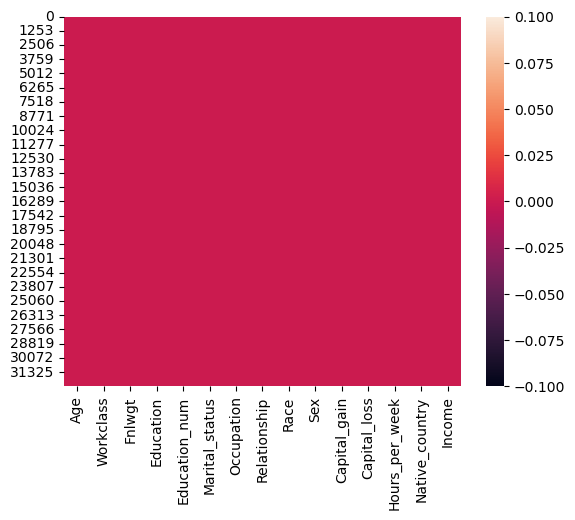

In [32]:
sns.heatmap(census_income_data.isnull())

now lets check the unique values in the output of our dataframe

In [35]:
(census_income_data['Income'].unique())

array([0., 1.])

so the total number of unique values in the output column is 2

In [36]:
(census_income_data['Income'].nunique())

2

lets get the value counts from our dataframe

In [37]:
for i in census_income_data.columns:
    print(census_income_data[i].value_counts())
    print("/n")

36.0    898
31.0    888
34.0    886
23.0    877
35.0    876
       ... 
83.0      6
88.0      3
85.0      3
86.0      1
87.0      1
Name: Age, Length: 73, dtype: int64
/n
4.0    22696
6.0     2541
2.0     2093
0.0     1836
7.0     1297
5.0     1116
1.0      960
8.0       14
3.0        7
Name: Workclass, dtype: int64
/n
164190.0    13
203488.0    13
123011.0    13
148995.0    12
126675.0    12
            ..
325573.0     1
140176.0     1
318264.0     1
329205.0     1
257302.0     1
Name: Fnlwgt, Length: 21647, dtype: int64
/n
11.0    10501
15.0     7291
9.0      5354
12.0     1723
8.0      1382
1.0      1175
7.0      1067
0.0       933
5.0       646
14.0      576
6.0       514
2.0       433
10.0      413
4.0       333
3.0       168
13.0       51
Name: Education, dtype: int64
/n
9.0     10501
10.0     7291
13.0     5354
14.0     1723
11.0     1382
7.0      1175
12.0     1067
6.0       933
4.0       646
15.0      576
5.0       514
8.0       433
16.0      413
3.0       333
2.0       168
1.

Below are the details(most of number of occurences) that we can extract from our dataframe-

1) Age : 36.0    898
2) Workclass: 4.0    22696
3) Fnlwgt: 164190.0    13
4) Education: 11.0    10501
5) Education_num: 9.0     10501
6) Marital_status: 2.0    14976
7) Occupation: 10.0    4140
8) Relationship: 0.0    13193
9) Race: 4.0    27815
10) Sex: 1.0    21789
11) Capital_gain: 0.0        29849
12) Capital_loss: 0.0       31041
13) Hours_per_week: 40.0    15216
14) Native_country: 39.0    29169
15) Income: 0.0    24719

lets create a dataframe that consists of all the columns with float64 datatype values.

In [21]:
census_income_data_col=[]
for i in census_income_data.dtypes.index:
    if census_income_data.dtypes[i] == 'float64':
        census_income_data_col.append(i)
print("census_income_data_cateogry columns:", census_income_data_col)
print("/n")

census_income_data_cateogry columns: ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country', 'Income']
/n


lets finally check if all the columns in our dataframe is free of null values

In [40]:
census_income_data.loc[census_income_data["Income"]==""]

Empty DataFrame
Columns: [Age, Workclass, Fnlwgt, Education, Education_num, Marital_status, Occupation, Relationship, Race, Sex, Capital_gain, Capital_loss, Hours_per_week, Native_country, Income]
Index: []

lets get the mean of our output column- income

In [41]:
print(census_income_data["Income"].mean())

0.24081695331695332


now lets get the list of number of unique values in all the columns from our dataframe.

In [42]:
census_income_data.nunique().to_frame("No. of Unique values")

No. of Unique values
Age                               73
Workclass                          9
Fnlwgt                         21647
Education                         16
Education_num                     16
Marital_status                     7
Occupation                        15
Relationship                       6
Race                               5
Sex                                2
Capital_gain                     119
Capital_loss                      92
Hours_per_week                    94
Native_country                    42
Income                             2

lets check if there are any duplicated rows in our dataframe.

In [43]:
print("Total duplicated rows:", census_income_data.duplicated().sum())

Total duplicated rows: 24


we can let these duplicated rows a pass since we will be doing classifications and there is possibility that multiple applicant can have the same name, same income and other features.

Univariate analysis

Countplots.

Below are the details(most of number of occurences) that we can extract from our dataframe-

1) Age : 36.0    898
2) Workclass: 4.0    22696
3) Fnlwgt: 164190.0    13
4) Education: 11.0    10501
5) Education_num: 9.0     10501
6) Marital_status: 2.0    14976
7) Occupation: 10.0    4140
8) Relationship: 0.0    13193
9) Race: 4.0    27815
10) Sex: 1.0    21789
11) Capital_gain: 0.0        29849
12) Capital_loss: 0.0       31041
13) Hours_per_week: 40.0    15216
14) Native_country: 39.0    29169
15) Income: 0.0    24719

0.0    24719
1.0     7841
Name: Income, dtype: int64


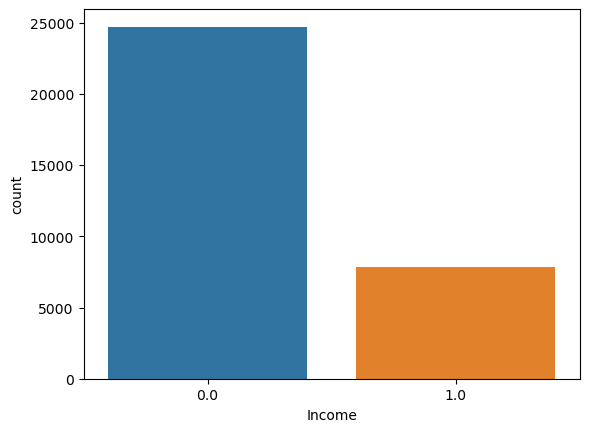

In [5]:
lc=sns.countplot(x='Income',data=census_income_data)
print(census_income_data['Income'].value_counts())

36.0    898
31.0    888
34.0    886
23.0    877
35.0    876
       ... 
83.0      6
88.0      3
85.0      3
86.0      1
87.0      1
Name: Age, Length: 73, dtype: int64


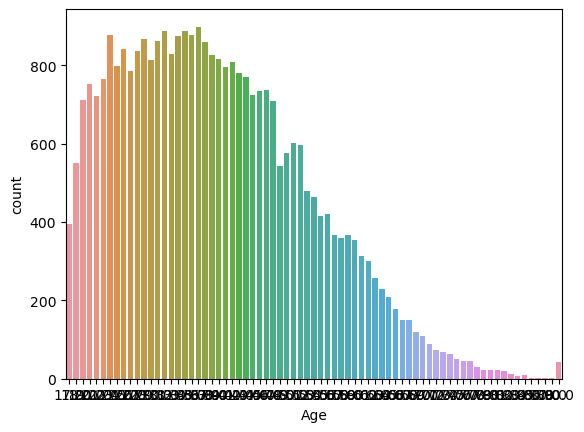

In [6]:
lc=sns.countplot(x='Age',data=census_income_data)
print(census_income_data['Age'].value_counts())

4.0    22696
6.0     2541
2.0     2093
0.0     1836
7.0     1297
5.0     1116
1.0      960
8.0       14
3.0        7
Name: Workclass, dtype: int64


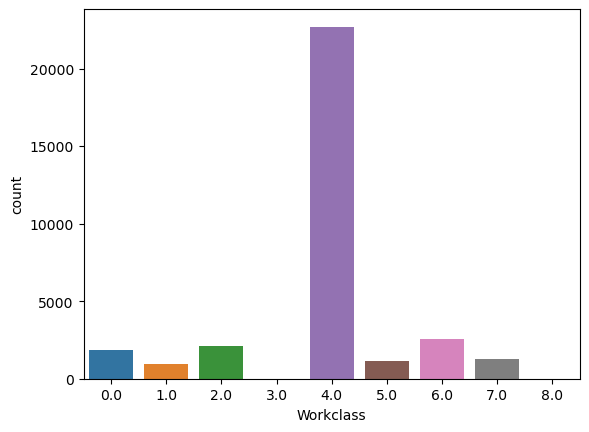

In [7]:
lc=sns.countplot(x='Workclass',data=census_income_data)
print(census_income_data['Workclass'].value_counts())

164190.0    13
203488.0    13
123011.0    13
148995.0    12
126675.0    12
            ..
325573.0     1
140176.0     1
318264.0     1
329205.0     1
257302.0     1
Name: Fnlwgt, Length: 21647, dtype: int64


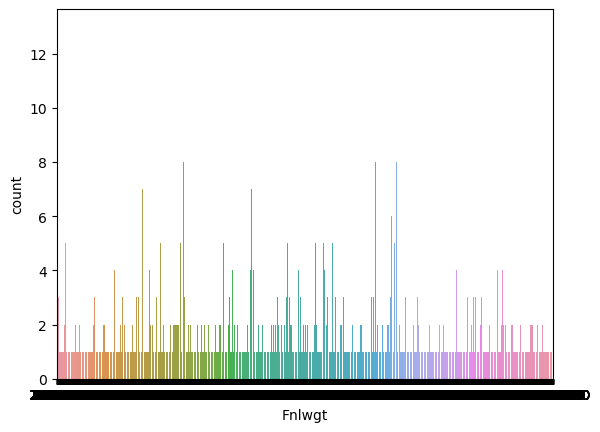

In [8]:
lc=sns.countplot(x='Fnlwgt',data=census_income_data)
print(census_income_data['Fnlwgt'].value_counts())

11.0    10501
15.0     7291
9.0      5354
12.0     1723
8.0      1382
1.0      1175
7.0      1067
0.0       933
5.0       646
14.0      576
6.0       514
2.0       433
10.0      413
4.0       333
3.0       168
13.0       51
Name: Education, dtype: int64


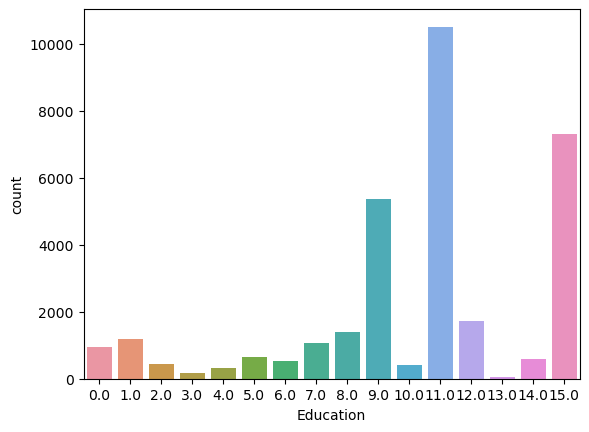

In [9]:
lc=sns.countplot(x='Education',data=census_income_data)
print(census_income_data['Education'].value_counts())

9.0     10501
10.0     7291
13.0     5354
14.0     1723
11.0     1382
7.0      1175
12.0     1067
6.0       933
4.0       646
15.0      576
5.0       514
8.0       433
16.0      413
3.0       333
2.0       168
1.0        51
Name: Education_num, dtype: int64


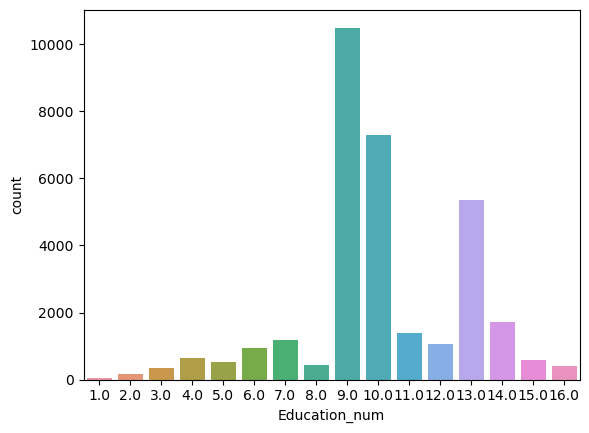

In [10]:
lc=sns.countplot(x='Education_num',data=census_income_data)
print(census_income_data['Education_num'].value_counts())

2.0    14976
4.0    10682
0.0     4443
5.0     1025
6.0      993
3.0      418
1.0       23
Name: Marital_status, dtype: int64


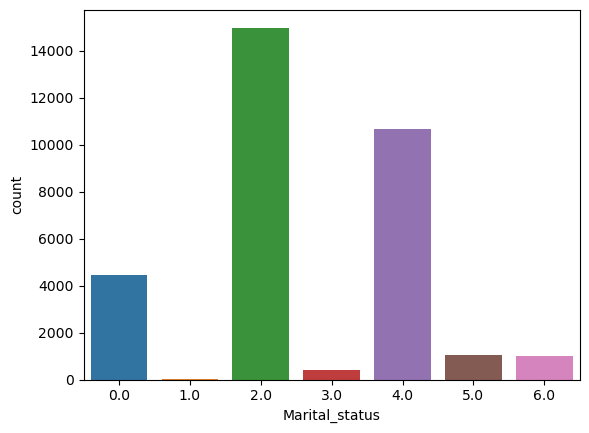

In [11]:
lc=sns.countplot(x='Marital_status',data=census_income_data)
print(census_income_data['Marital_status'].value_counts())

10.0    4140
3.0     4099
4.0     4066
1.0     3769
12.0    3650
8.0     3295
7.0     2002
0.0     1843
14.0    1597
6.0     1370
5.0      994
13.0     928
11.0     649
9.0      149
2.0        9
Name: Occupation, dtype: int64


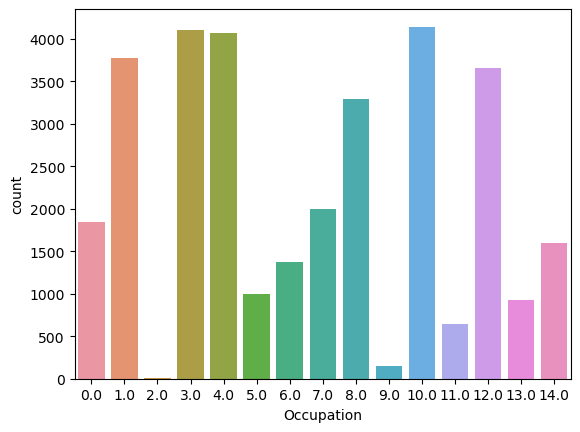

In [12]:
lc=sns.countplot(x='Occupation',data=census_income_data)
print(census_income_data['Occupation'].value_counts())

0.0    13193
1.0     8304
3.0     5068
4.0     3446
5.0     1568
2.0      981
Name: Relationship, dtype: int64


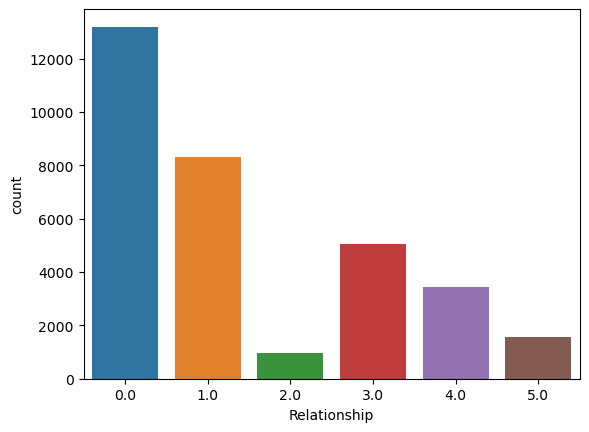

In [13]:
lc=sns.countplot(x='Relationship',data=census_income_data)
print(census_income_data['Relationship'].value_counts())

4.0    27815
2.0     3124
1.0     1039
0.0      311
3.0      271
Name: Race, dtype: int64


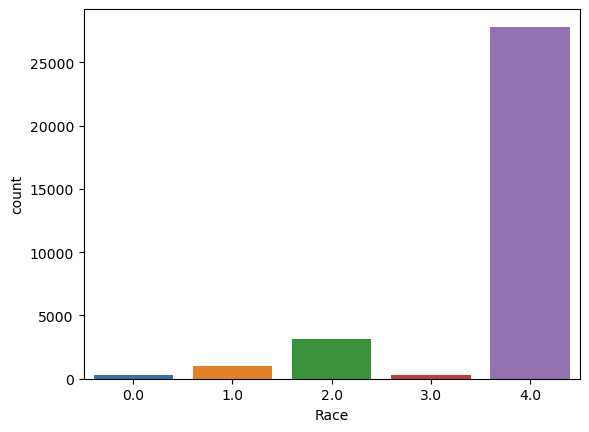

In [14]:
lc=sns.countplot(x='Race',data=census_income_data)
print(census_income_data['Race'].value_counts())

1.0    21789
0.0    10771
Name: Sex, dtype: int64


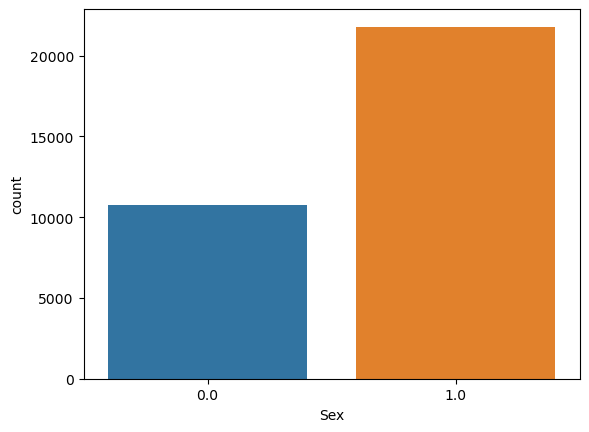

In [15]:
lc=sns.countplot(x='Sex',data=census_income_data)
print(census_income_data['Sex'].value_counts())

0.0        29849
15024.0      347
7688.0       284
7298.0       246
99999.0      159
           ...  
1111.0         1
2538.0         1
22040.0        1
4931.0         1
5060.0         1
Name: Capital_gain, Length: 119, dtype: int64


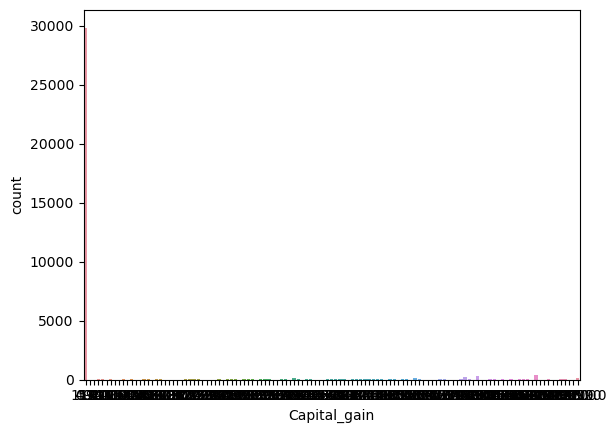

In [16]:
lc=sns.countplot(x='Capital_gain',data=census_income_data)
print(census_income_data['Capital_gain'].value_counts())

0.0       31041
1902.0      202
1977.0      168
1887.0      159
1848.0       51
          ...  
2080.0        1
1539.0        1
1844.0        1
2489.0        1
1411.0        1
Name: Capital_loss, Length: 92, dtype: int64


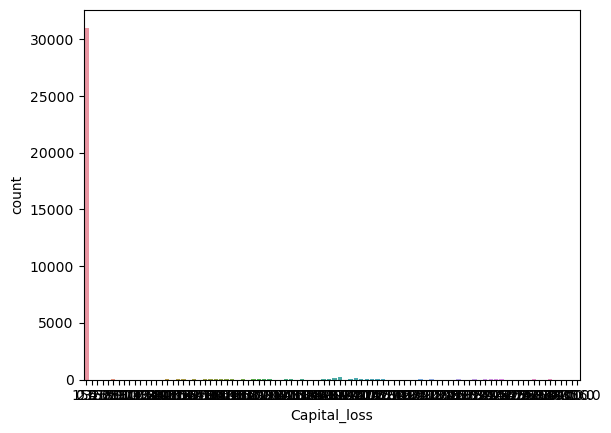

In [17]:
lc=sns.countplot(x='Capital_loss',data=census_income_data)
print(census_income_data['Capital_loss'].value_counts())

40.0    15216
50.0     2819
45.0     1824
60.0     1475
35.0     1297
        ...  
82.0        1
94.0        1
92.0        1
74.0        1
87.0        1
Name: Hours_per_week, Length: 94, dtype: int64


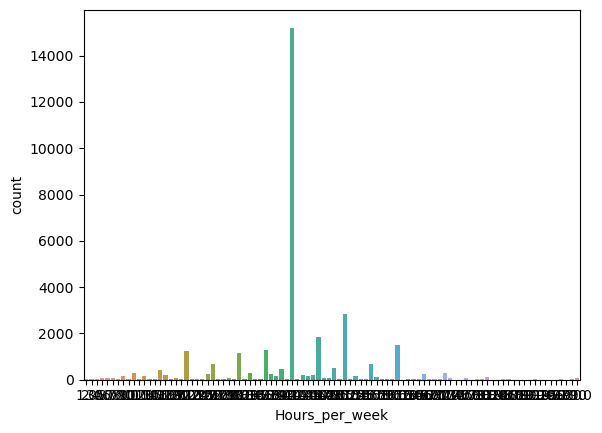

In [18]:
lc=sns.countplot(x='Hours_per_week',data=census_income_data)
print(census_income_data['Hours_per_week'].value_counts())

39.0    29169
26.0      643
0.0       583
30.0      198
11.0      137
2.0       121
33.0      114
8.0       106
19.0      100
5.0        95
9.0        90
23.0       81
35.0       80
3.0        75
22.0       73
6.0        70
40.0       67
13.0       64
24.0       62
31.0       60
4.0        59
36.0       51
14.0       44
20.0       43
32.0       37
27.0       34
29.0       31
10.0       29
12.0       29
7.0        28
21.0       24
17.0       20
1.0        19
38.0       19
25.0       18
37.0       18
41.0       16
28.0       14
16.0       13
18.0       13
34.0       12
15.0        1
Name: Native_country, dtype: int64


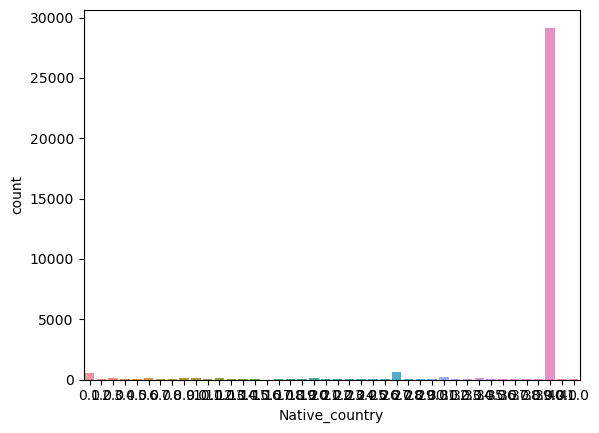

In [19]:
lc=sns.countplot(x='Native_country',data=census_income_data)
print(census_income_data['Native_country'].value_counts())

Distribution plots

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_6716\3984418232.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(census_income_data[col],color="b")
C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_6716\3984418232.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(census_income_data[col]

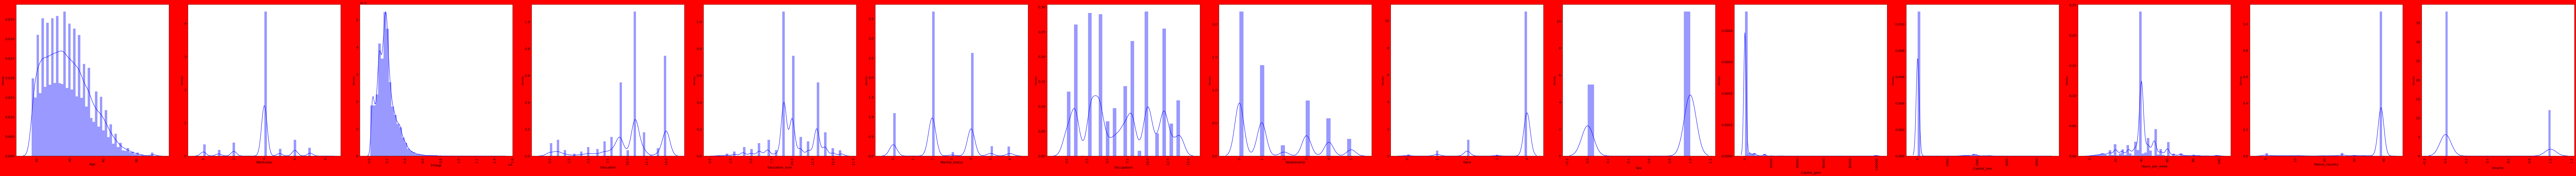

In [22]:
plt.figure(figsize=(145,145),facecolor = "red")
plotnumber=1
for col in census_income_data_col:
    if plotnumber<=16:
        wc=plt.subplot(15,15,plotnumber)
        sns.distplot(census_income_data[col],color="b")
        plt.xlabel(col,rotation=0,fontsize = 13)
        plt.xticks(rotation=90, fontsize=13)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.tight_layout()

Below are the details we can extract from the above plots.

1) Age is skewed to the left
2) Workclass is normally skewed
3) Fnlwgt is skewed to the left.
4) Education is skewed to the right.
5) Education num is skewed to the right.
6) Marital status is skewed to the left 
7) Occupation has skewness all over the place
8) Relationship is skewed to the left.
9)  Race is skewed to the right.
10) Sex is skewed to the right
11) capital gain is skewed to te left
12) capital loss is skewed to the left
13) hours per week is normally distributed
14) native country is skewed to the right.
15) Income is skewed to the left.

Bivariate analysis

Strip plots

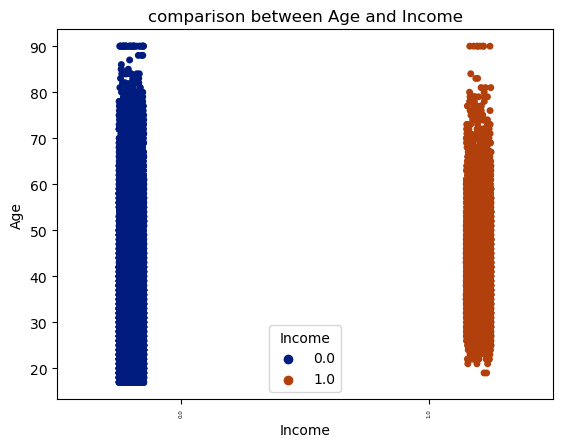

<Figure size 2800x200 with 0 Axes>

In [23]:
plt.title("comparison between Age and Income")
sns.stripplot(x= "Income", y= "Age", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

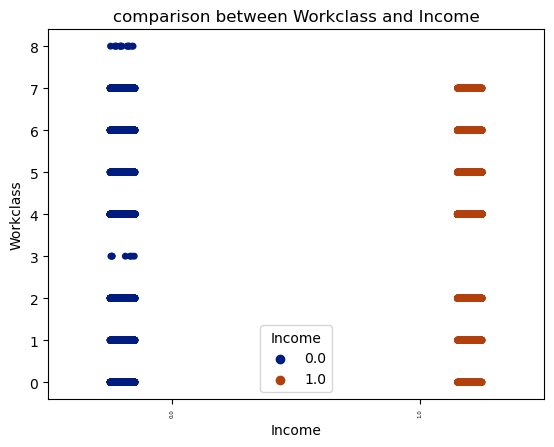

<Figure size 2800x200 with 0 Axes>

In [24]:
plt.title("comparison between Workclass and Income")
sns.stripplot(x= "Income", y= "Workclass", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

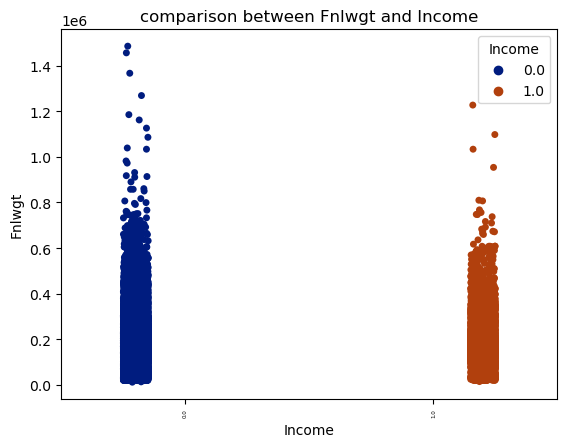

<Figure size 2800x200 with 0 Axes>

In [25]:
plt.title("comparison between Fnlwgt and Income")
sns.stripplot(x= "Income", y= "Fnlwgt", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

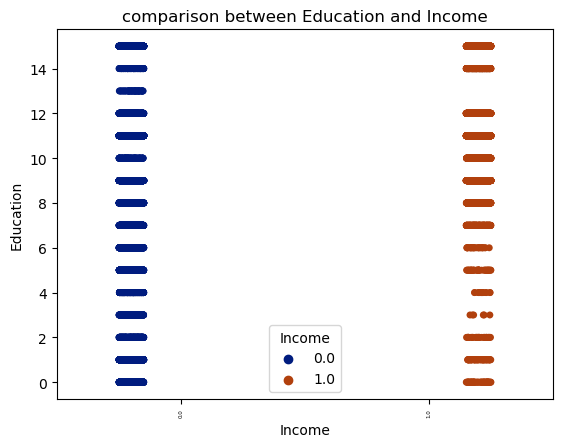

<Figure size 2800x200 with 0 Axes>

In [26]:
plt.title("comparison between Education and Income")
sns.stripplot(x= "Income", y= "Education", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

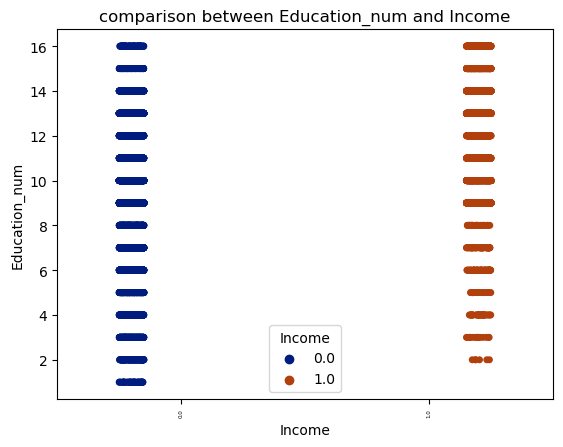

<Figure size 2800x200 with 0 Axes>

In [27]:
plt.title("comparison between Education_num and Income")
sns.stripplot(x= "Income", y= "Education_num", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

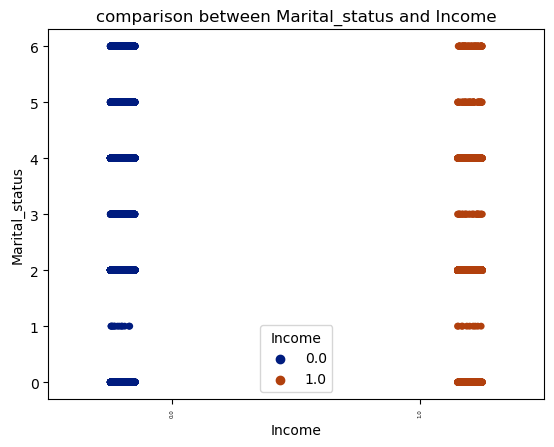

<Figure size 2800x200 with 0 Axes>

In [28]:
plt.title("comparison between Marital_status and Income")
sns.stripplot(x= "Income", y= "Marital_status", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

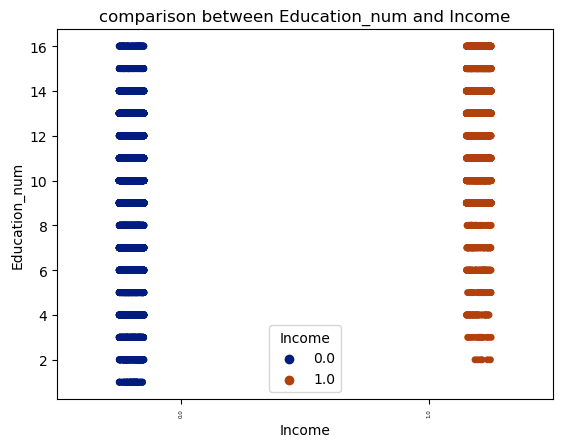

<Figure size 2800x200 with 0 Axes>

In [29]:
plt.title("comparison between Education_num and Income")
sns.stripplot(x= "Income", y= "Education_num", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

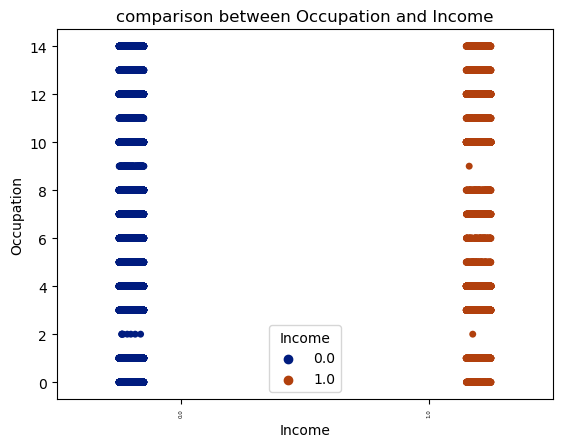

<Figure size 2800x200 with 0 Axes>

In [30]:
plt.title("comparison between Occupation and Income")
sns.stripplot(x= "Income", y= "Occupation", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

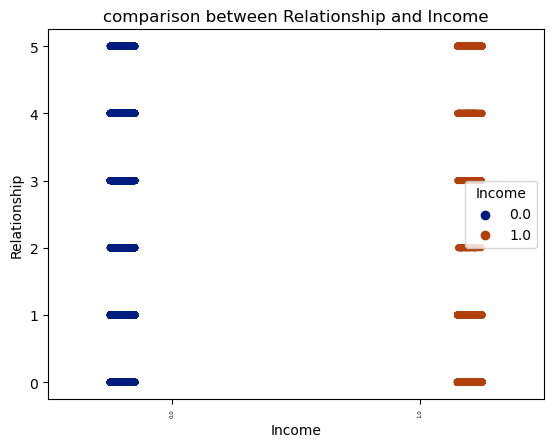

<Figure size 2800x200 with 0 Axes>

In [31]:
plt.title("comparison between Relationship and Income")
sns.stripplot(x= "Income", y= "Relationship", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

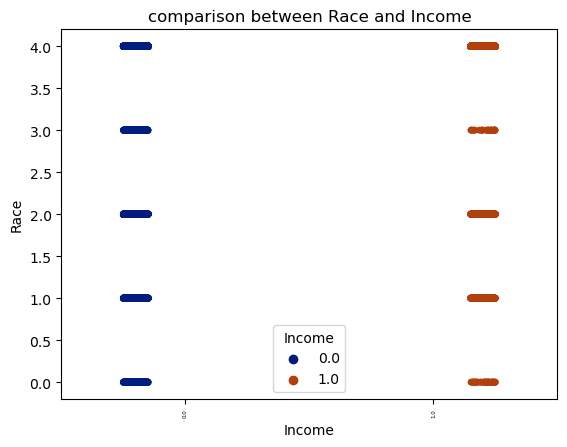

<Figure size 2800x200 with 0 Axes>

In [32]:
plt.title("comparison between Race and Income")
sns.stripplot(x= "Income", y= "Race", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

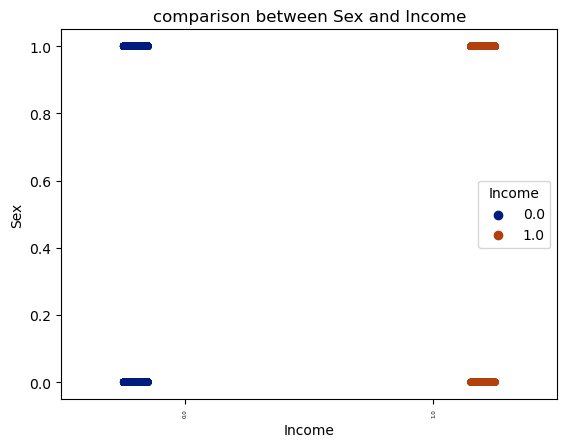

<Figure size 2800x200 with 0 Axes>

In [33]:
plt.title("comparison between Sex and Income")
sns.stripplot(x= "Income", y= "Sex", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

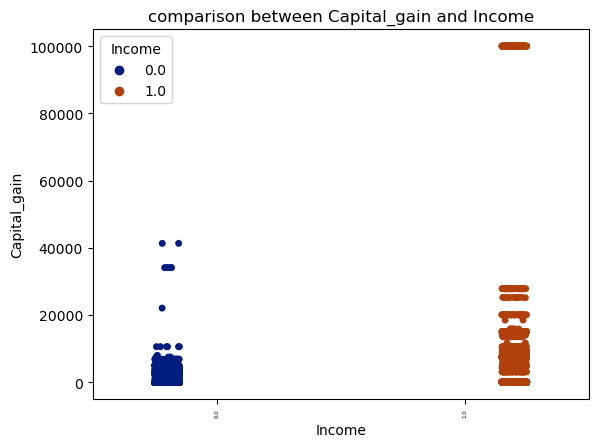

<Figure size 2800x200 with 0 Axes>

In [34]:
plt.title("comparison between Capital_gain and Income")
sns.stripplot(x= "Income", y= "Capital_gain", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

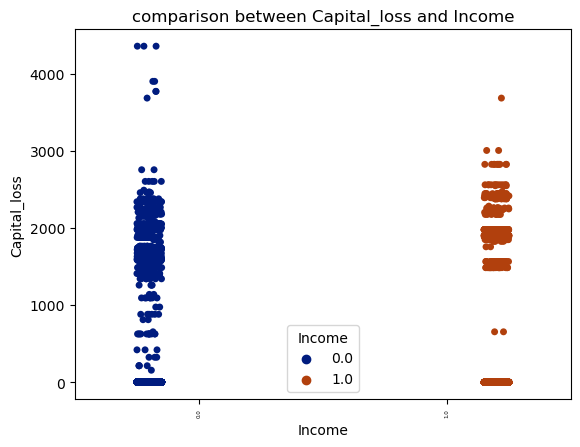

<Figure size 2800x200 with 0 Axes>

In [35]:
plt.title("comparison between Capital_loss and Income")
sns.stripplot(x= "Income", y= "Capital_loss", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

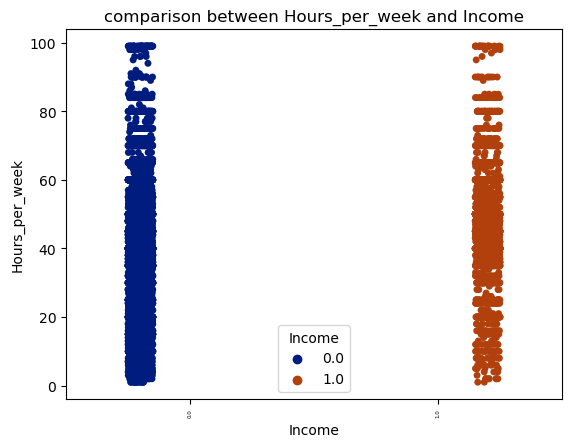

<Figure size 2800x200 with 0 Axes>

In [36]:
plt.title("comparison between Hours_per_week and Income")
sns.stripplot(x= "Income", y= "Hours_per_week", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

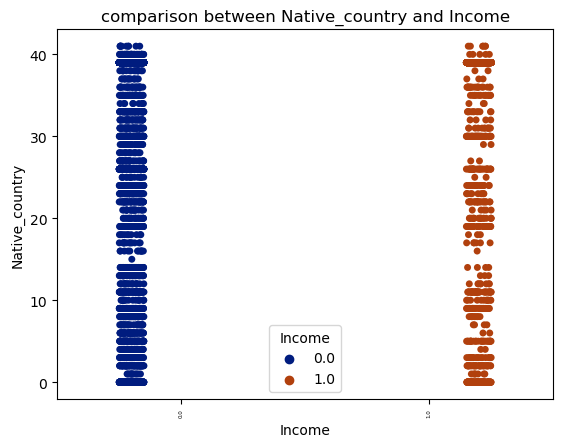

<Figure size 2800x200 with 0 Axes>

In [37]:
plt.title("comparison between Native_country and Income")
sns.stripplot(x= "Income", y= "Native_country", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclsuive statement can be made from the above plot.

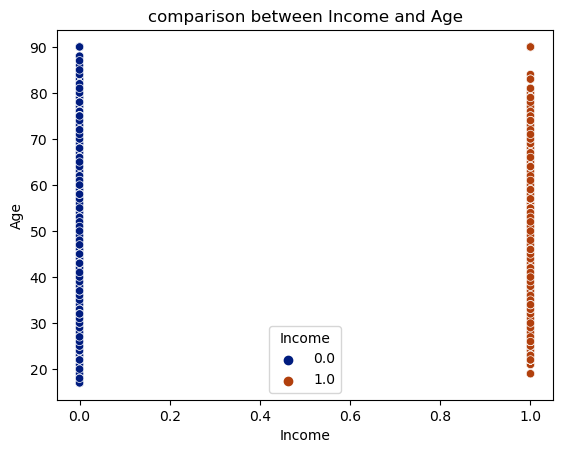

In [38]:
plt.title("comparison between Income and Age")
sns.scatterplot(x= 'Income', y= 'Age', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

Scatter plots

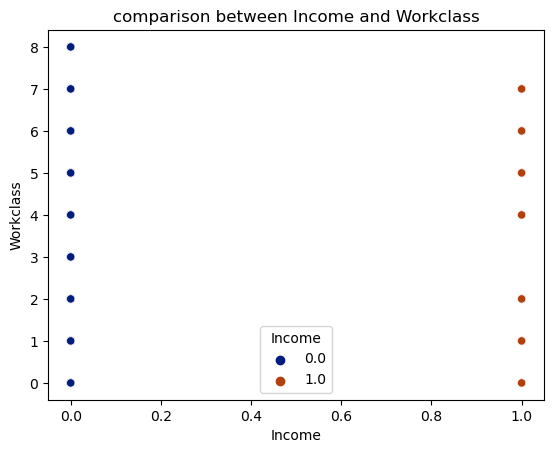

In [39]:
plt.title("comparison between Income and Workclass")
sns.scatterplot(x= 'Income', y= 'Workclass', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

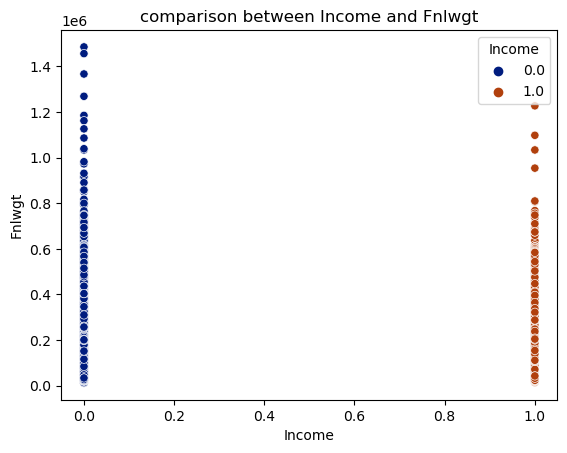

In [40]:
plt.title("comparison between Income and Fnlwgt")
sns.scatterplot(x= 'Income', y= 'Fnlwgt', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

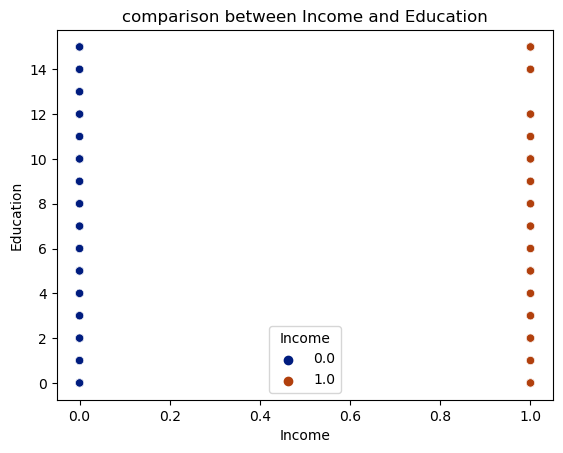

In [41]:
plt.title("comparison between Income and Education")
sns.scatterplot(x= 'Income', y= 'Education', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

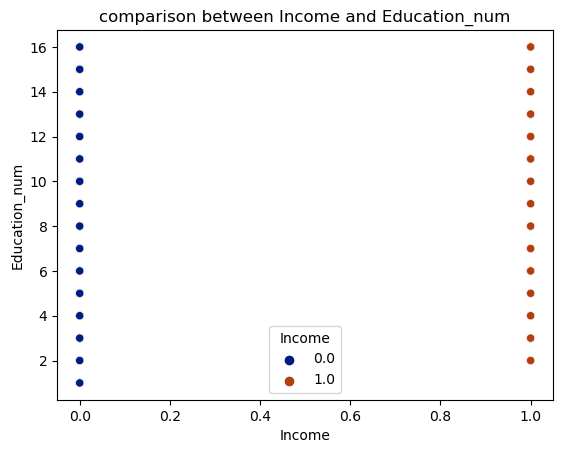

In [42]:
plt.title("comparison between Income and Education_num")
sns.scatterplot(x= 'Income', y= 'Education_num', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

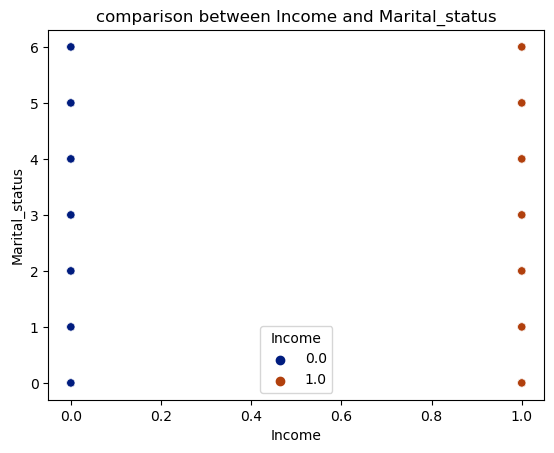

In [43]:
plt.title("comparison between Income and Marital_status")
sns.scatterplot(x= 'Income', y= 'Marital_status', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

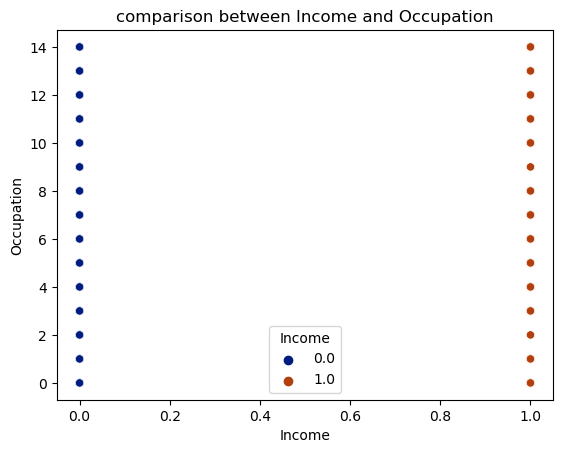

In [44]:
plt.title("comparison between Income and Occupation")
sns.scatterplot(x= 'Income', y= 'Occupation', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

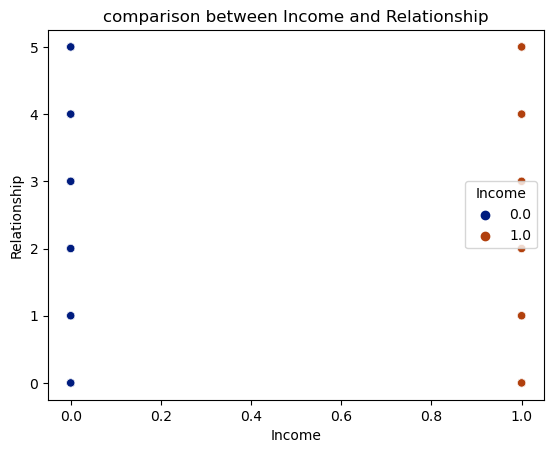

In [45]:
plt.title("comparison between Income and Relationship")
sns.scatterplot(x= 'Income', y= 'Relationship', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

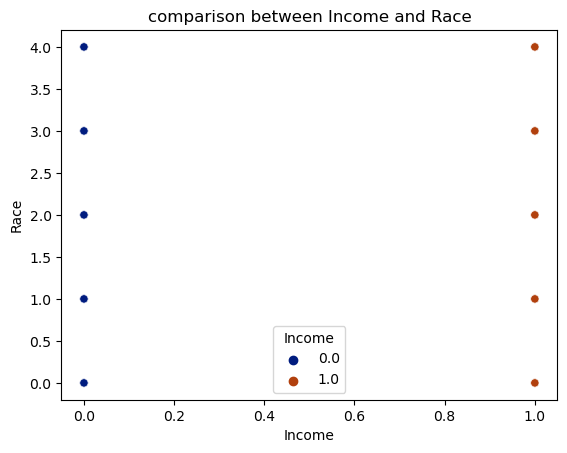

In [46]:
plt.title("comparison between Income and Race")
sns.scatterplot(x= 'Income', y= 'Race', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

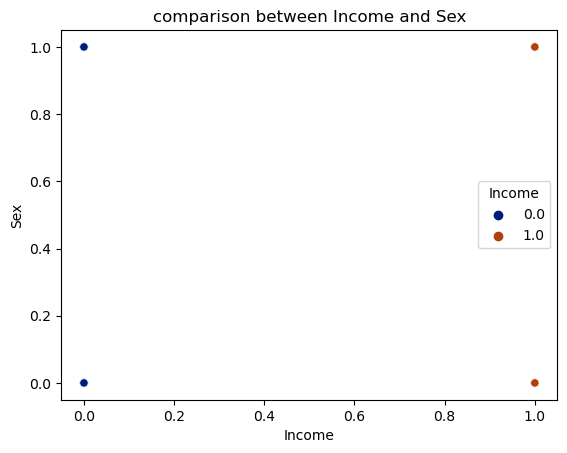

In [47]:
plt.title("comparison between Income and Sex")
sns.scatterplot(x= 'Income', y= 'Sex', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

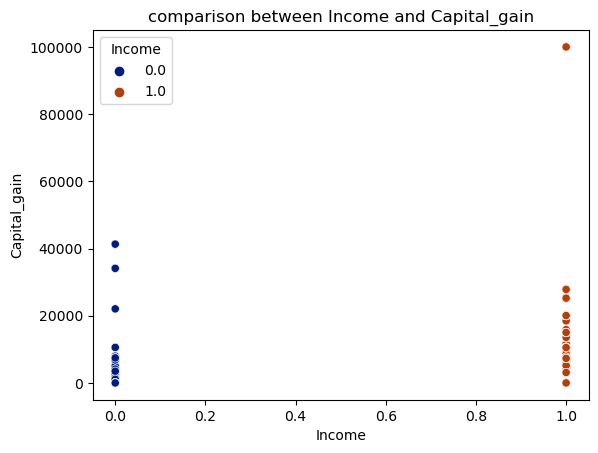

In [48]:
plt.title("comparison between Income and Capital_gain")
sns.scatterplot(x= 'Income', y= 'Capital_gain', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

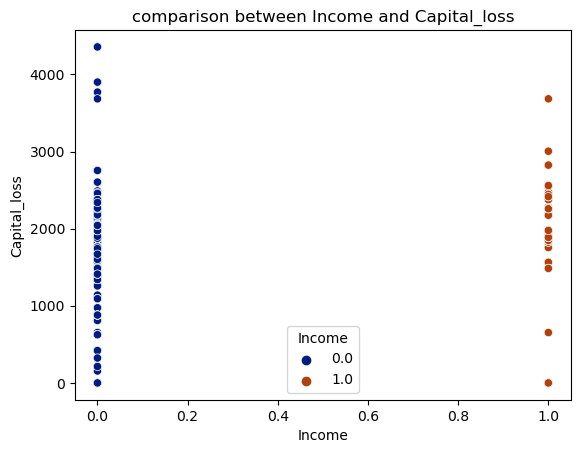

In [49]:
plt.title("comparison between Income and Capital_loss")
sns.scatterplot(x= 'Income', y= 'Capital_loss', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

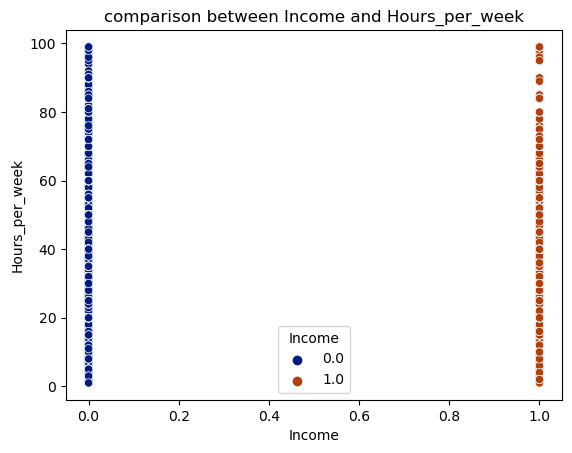

In [50]:
plt.title("comparison between Income and Hours_per_week")
sns.scatterplot(x= 'Income', y= 'Hours_per_week', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

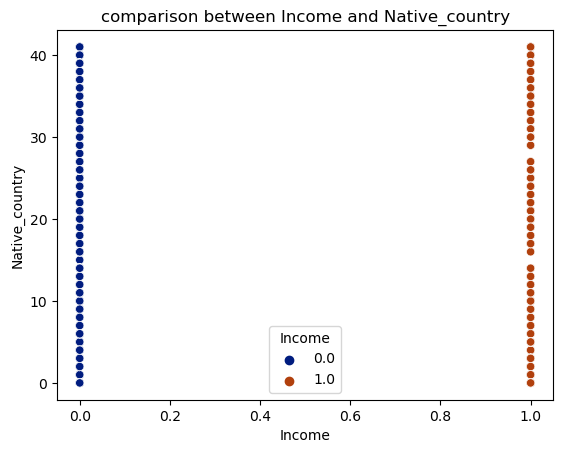

In [51]:
plt.title("comparison between Income and Native_country")
sns.scatterplot(x= 'Income', y= 'Native_country', data = census_income_data,hue='Income', palette='dark')
plt.show()

No conclsuive statement can be made from the above plot.

Barplots

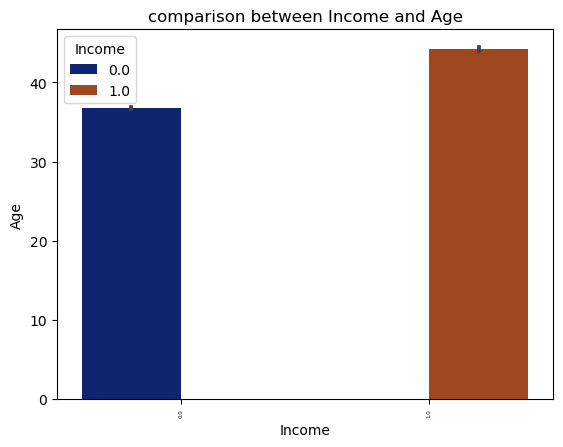

<Figure size 2800x200 with 0 Axes>

In [52]:
plt.title("comparison between Income and Age")
sns.barplot(x= "Income", y= "Age", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

Applicants whose income is above 50k are older than applicants whose income is below 50k generally.

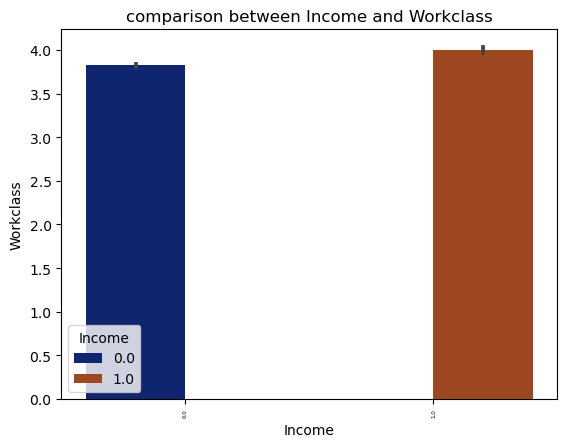

<Figure size 2800x200 with 0 Axes>

In [53]:
plt.title("comparison between Income and Workclass")
sns.barplot(x= "Income", y= "Workclass", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclusive statements can be made from the above plot.

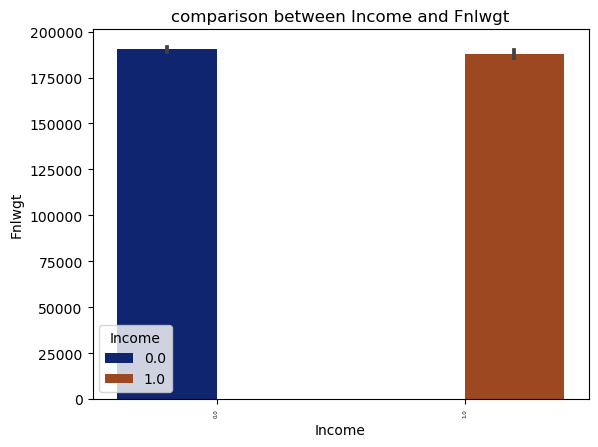

<Figure size 2800x200 with 0 Axes>

In [54]:
plt.title("comparison between Income and Fnlwgt")
sns.barplot(x= "Income", y= "Fnlwgt", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclusive statements can be made from the above plot.

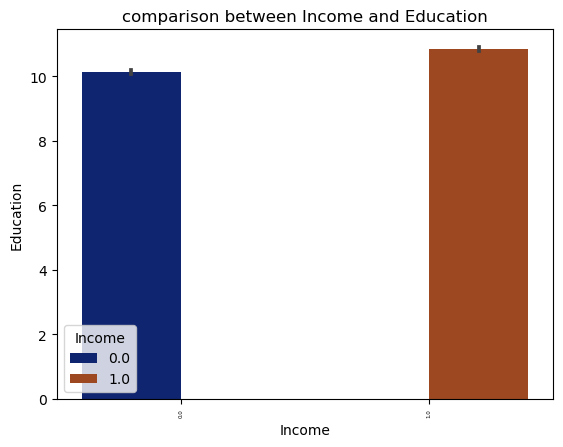

<Figure size 2800x200 with 0 Axes>

In [55]:
plt.title("comparison between Income and Education")
sns.barplot(x= "Income", y= "Education", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

No conclusive statements can be made from the above plot.

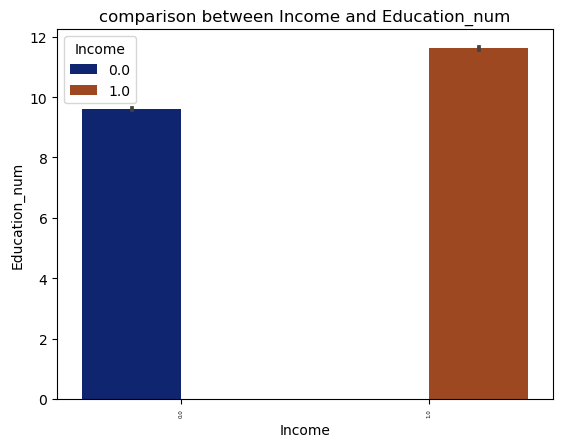

<Figure size 2800x200 with 0 Axes>

In [56]:
plt.title("comparison between Income and Education_num")
sns.barplot(x= "Income", y= "Education_num", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

education num is higher for applicants who has income above 50k. 

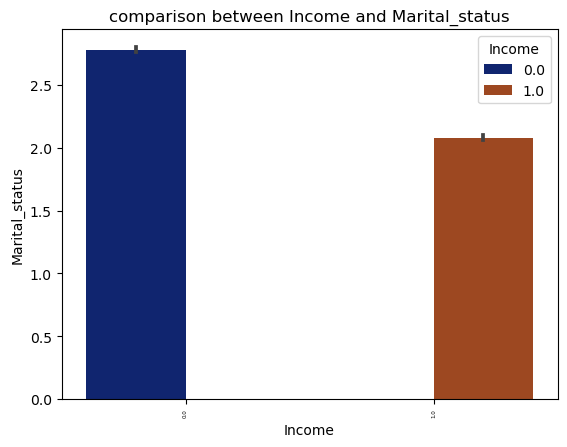

<Figure size 2800x200 with 0 Axes>

In [57]:
plt.title("comparison between Income and Marital_status")
sns.barplot(x= "Income", y= "Marital_status", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

income of applicants who are not married are lower than people who are married or are past that stage.

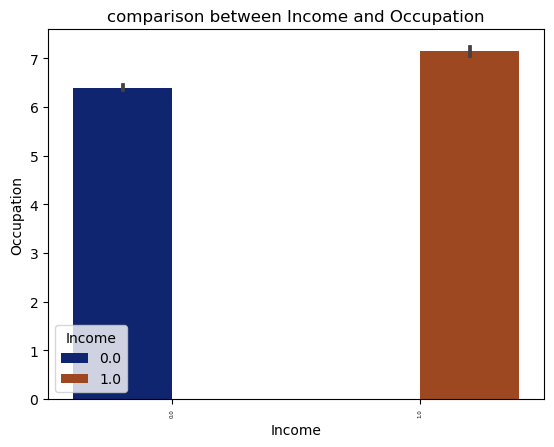

<Figure size 2800x200 with 0 Axes>

In [58]:
plt.title("comparison between Income and Occupation")
sns.barplot(x= "Income", y= "Occupation", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be derived from the above plot.

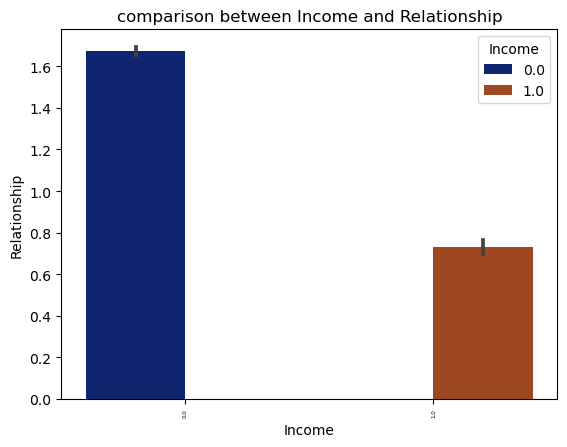

<Figure size 2800x200 with 0 Axes>

In [59]:
plt.title("comparison between Income and Relationship")
sns.barplot(x= "Income", y= "Relationship", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

people with income below 50k have higher variations in relationship status than people whose income are above 50k.

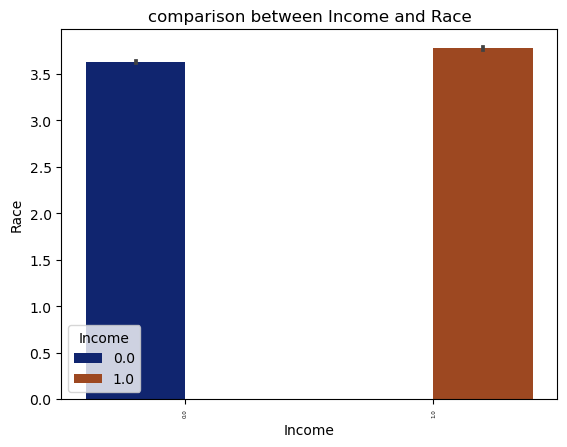

<Figure size 2800x200 with 0 Axes>

In [60]:
plt.title("comparison between Income and Race")
sns.barplot(x= "Income", y= "Race", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statements can be made from the above plot.

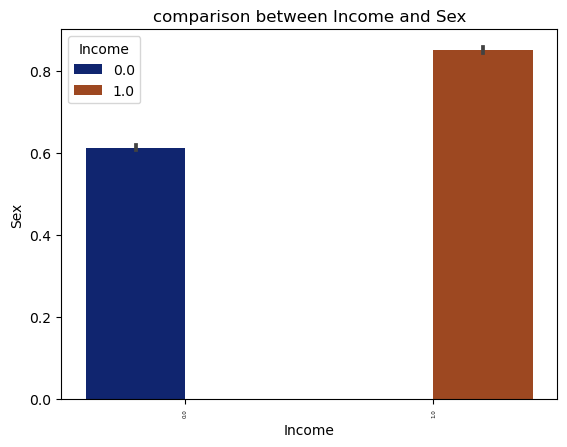

<Figure size 2800x200 with 0 Axes>

In [61]:
plt.title("comparison between Income and Sex")
sns.barplot(x= "Income", y= "Sex", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

more men belong to the income group above 50k than women.

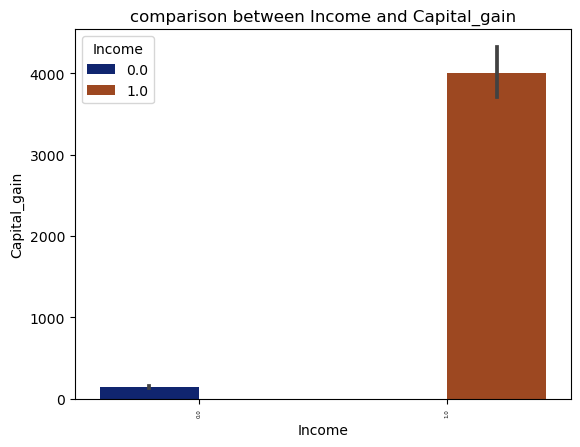

<Figure size 2800x200 with 0 Axes>

In [62]:
plt.title("comparison between Income and Capital_gain")
sns.barplot(x= "Income", y= "Capital_gain", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

capital gain is extremely high for applicants with income above 50k than applicants with income below 50k.

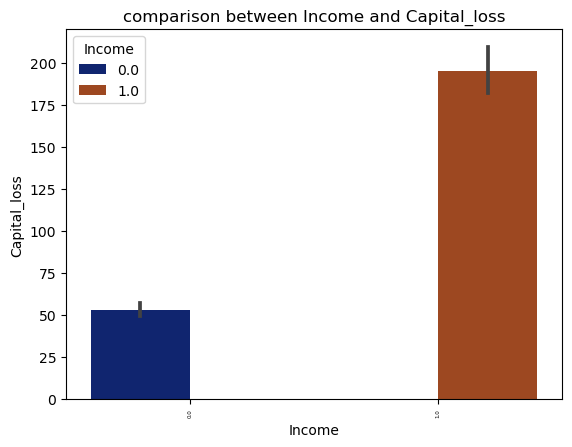

<Figure size 2800x200 with 0 Axes>

In [63]:
plt.title("comparison between Income and Capital_loss")
sns.barplot(x= "Income", y= "Capital_loss", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

capital loss is extremely high for income above 50k than applicants with income less than 50k.

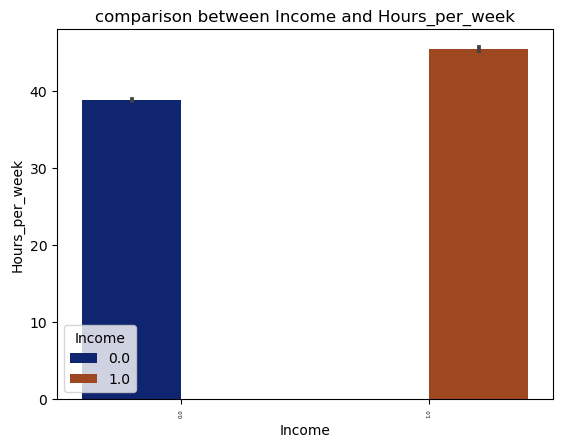

<Figure size 2800x200 with 0 Axes>

In [64]:
plt.title("comparison between Income and Hours_per_week")
sns.barplot(x= "Income", y= "Hours_per_week", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conlusive statement can be made from above plot, other people with income above 50k has longer hours per week.

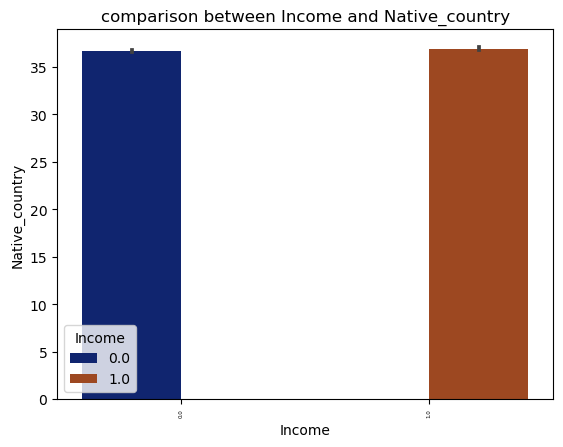

<Figure size 2800x200 with 0 Axes>

In [65]:
plt.title("comparison between Income and Native_country")
sns.barplot(x= "Income", y= "Native_country", data = census_income_data,hue='Income', palette='dark',dodge=True)
plt.xticks(rotation=90, fontsize=4)
plt.figure(figsize=(28, 2))
plt.show()

no conclusive statement can be made from the above plot.

Multivariate analysis

In [ ]:
Catplots

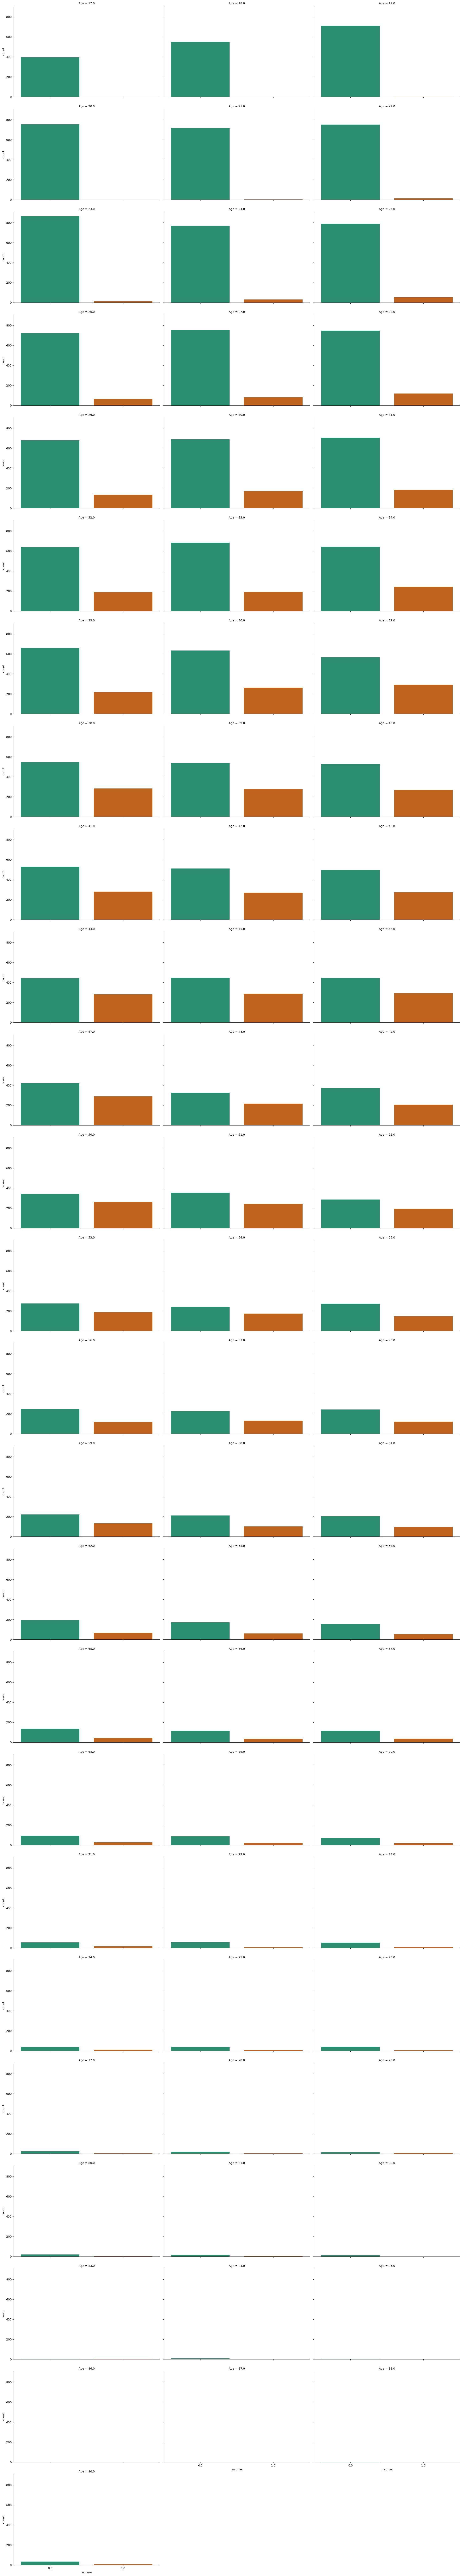

In [69]:
sns.catplot(x= 'Income', col= 'Age', data = census_income_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of the applicants range from 20-35 who has income below 50k, and most of the applicants whose income is above 50k range from 35-60.

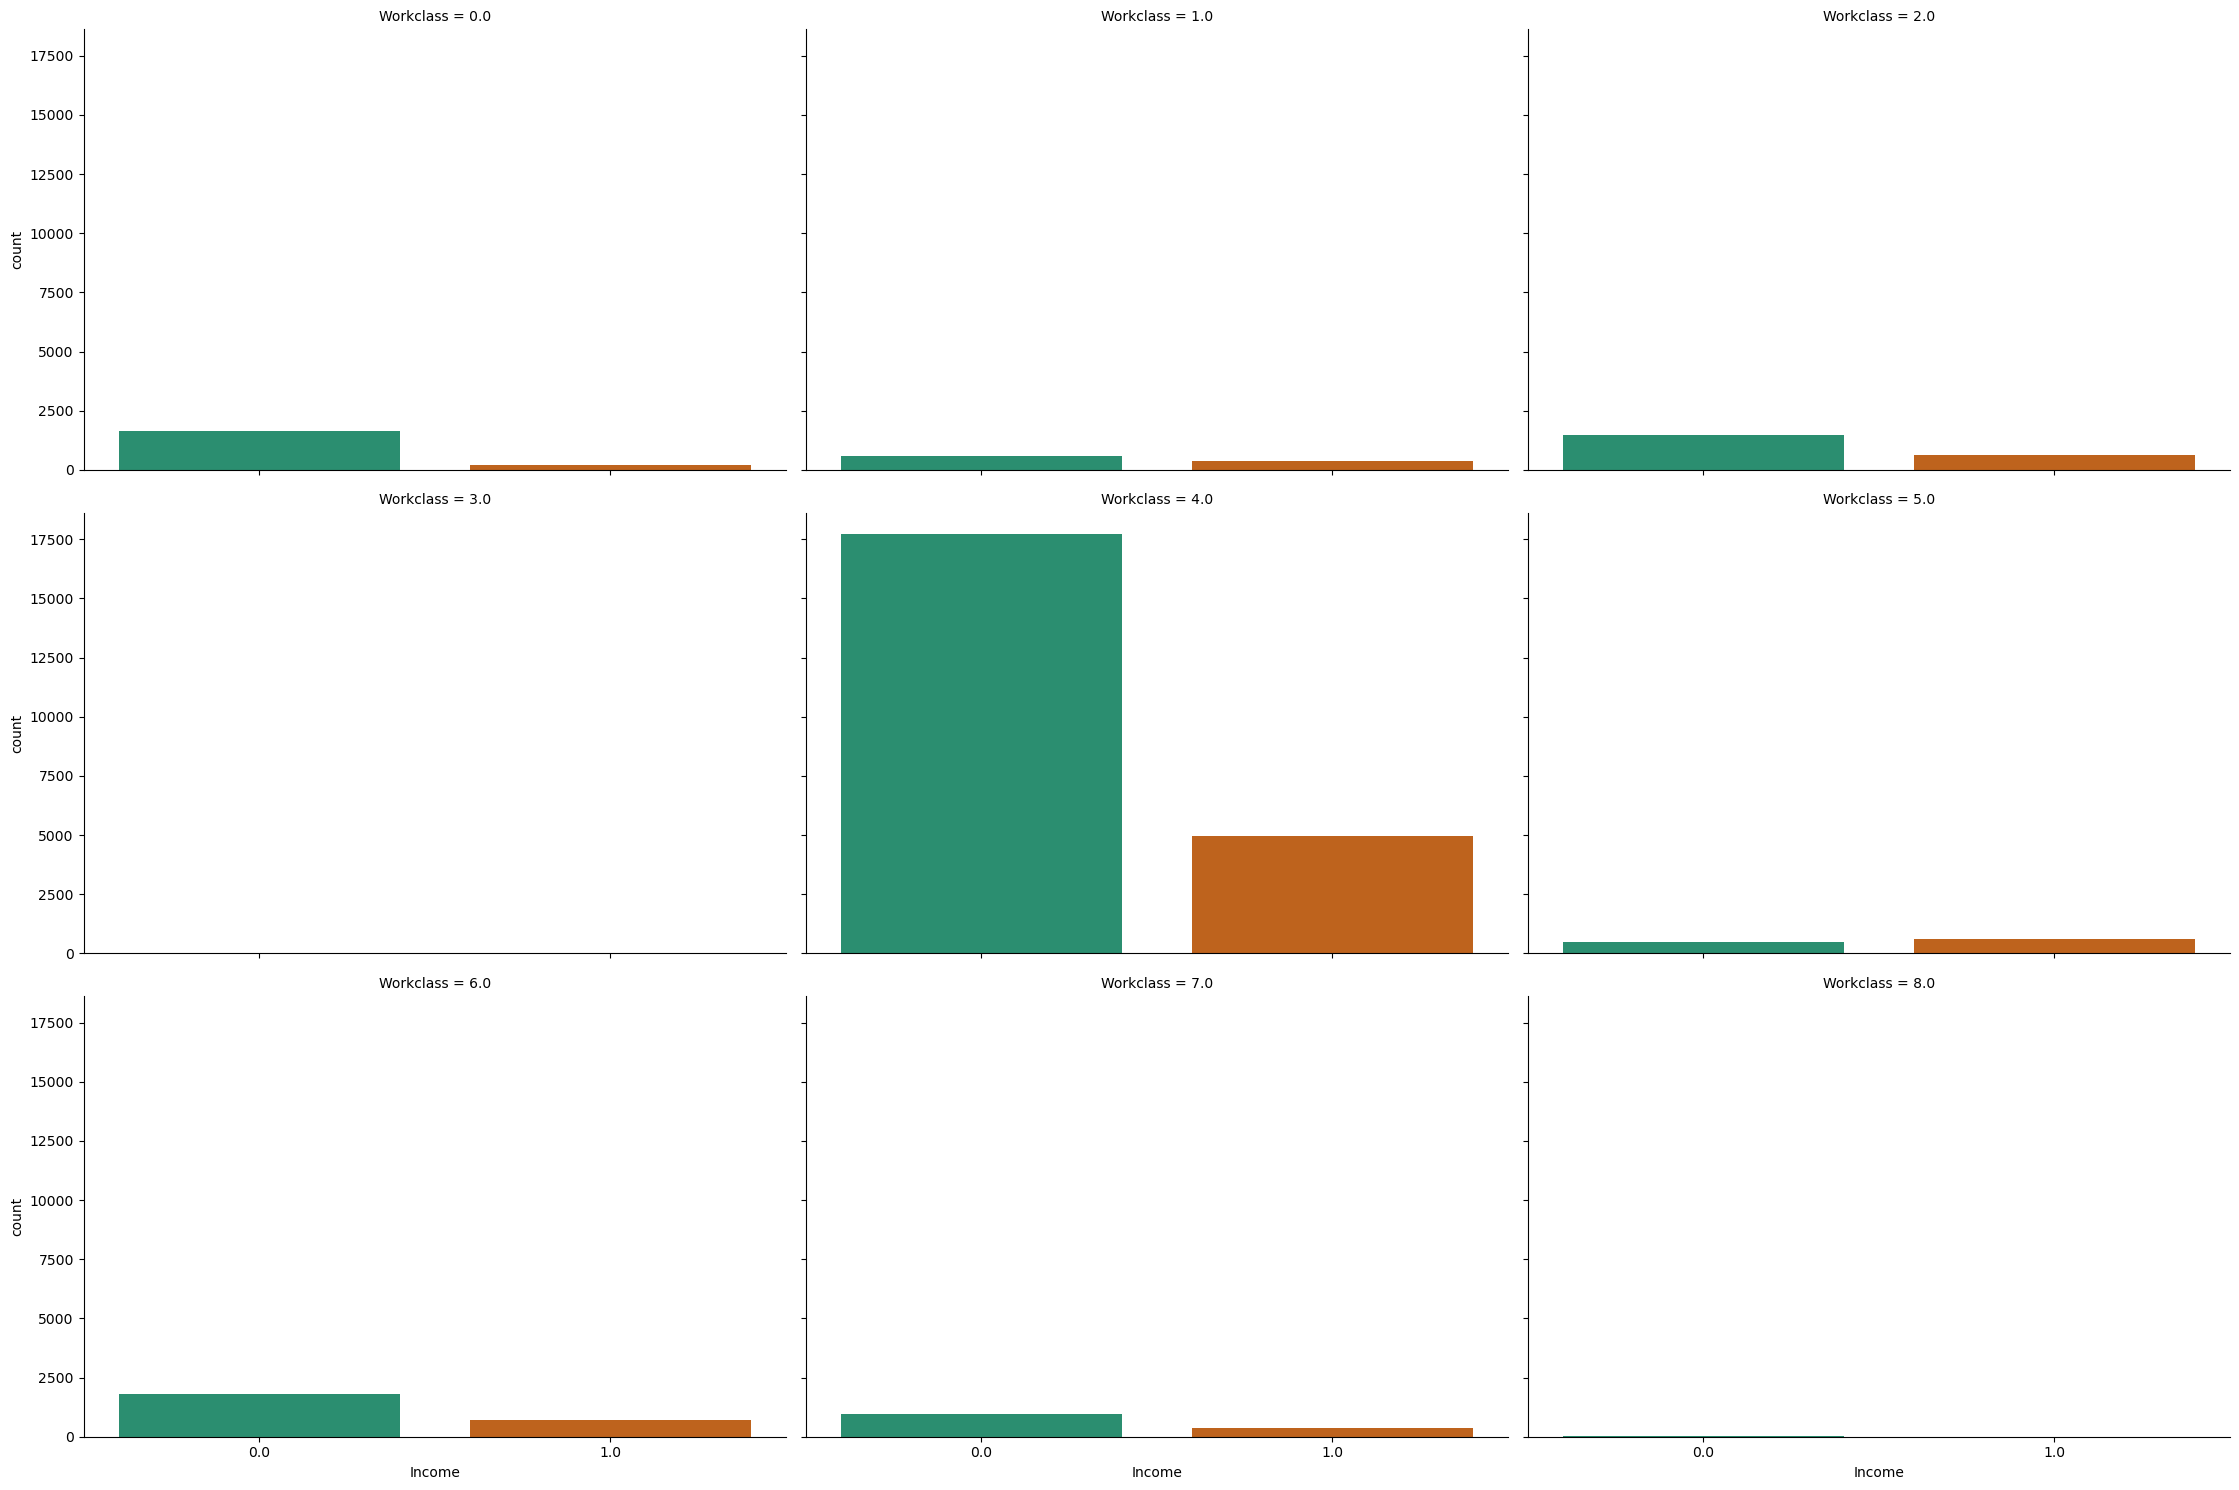

In [70]:
sns.catplot(x= 'Income', col= 'Workclass', data = census_income_data, kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of applicants whose income is below 50k and above 50k comes from workclass 4.0.

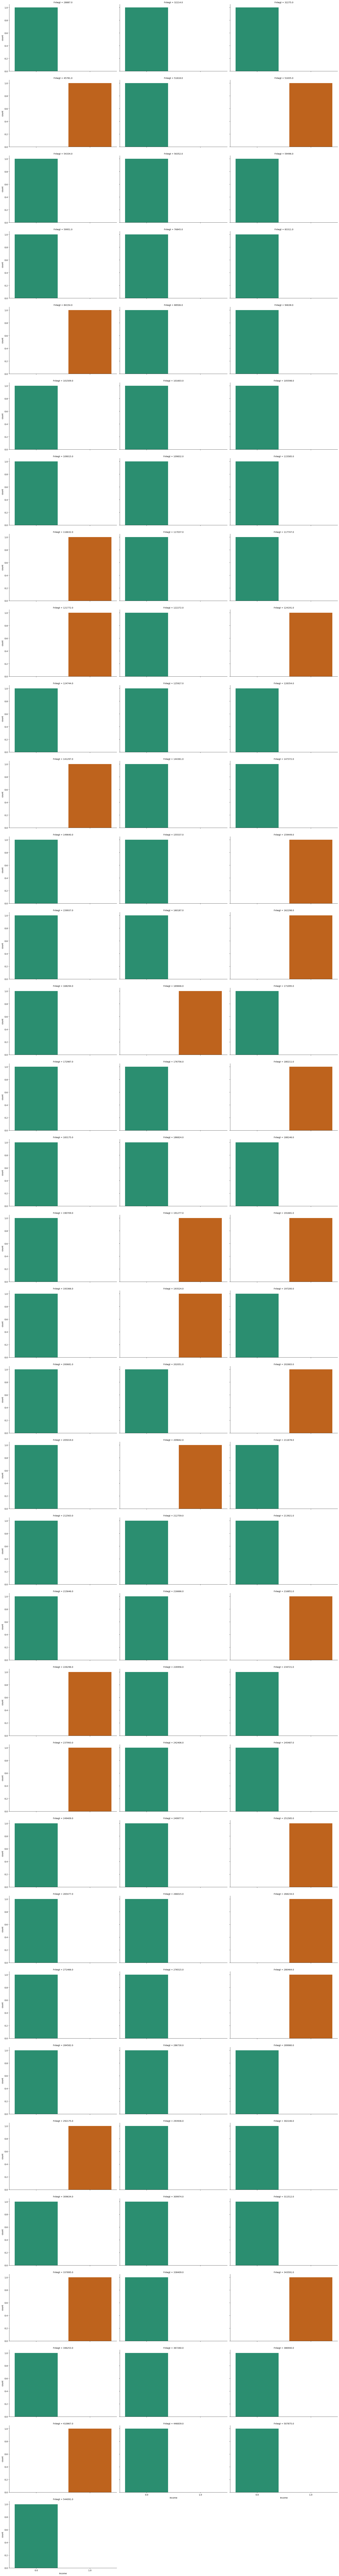

In [74]:
sns.catplot(x= 'Income', col= 'Fnlwgt', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

no conclusive statements can be made from the above plots.

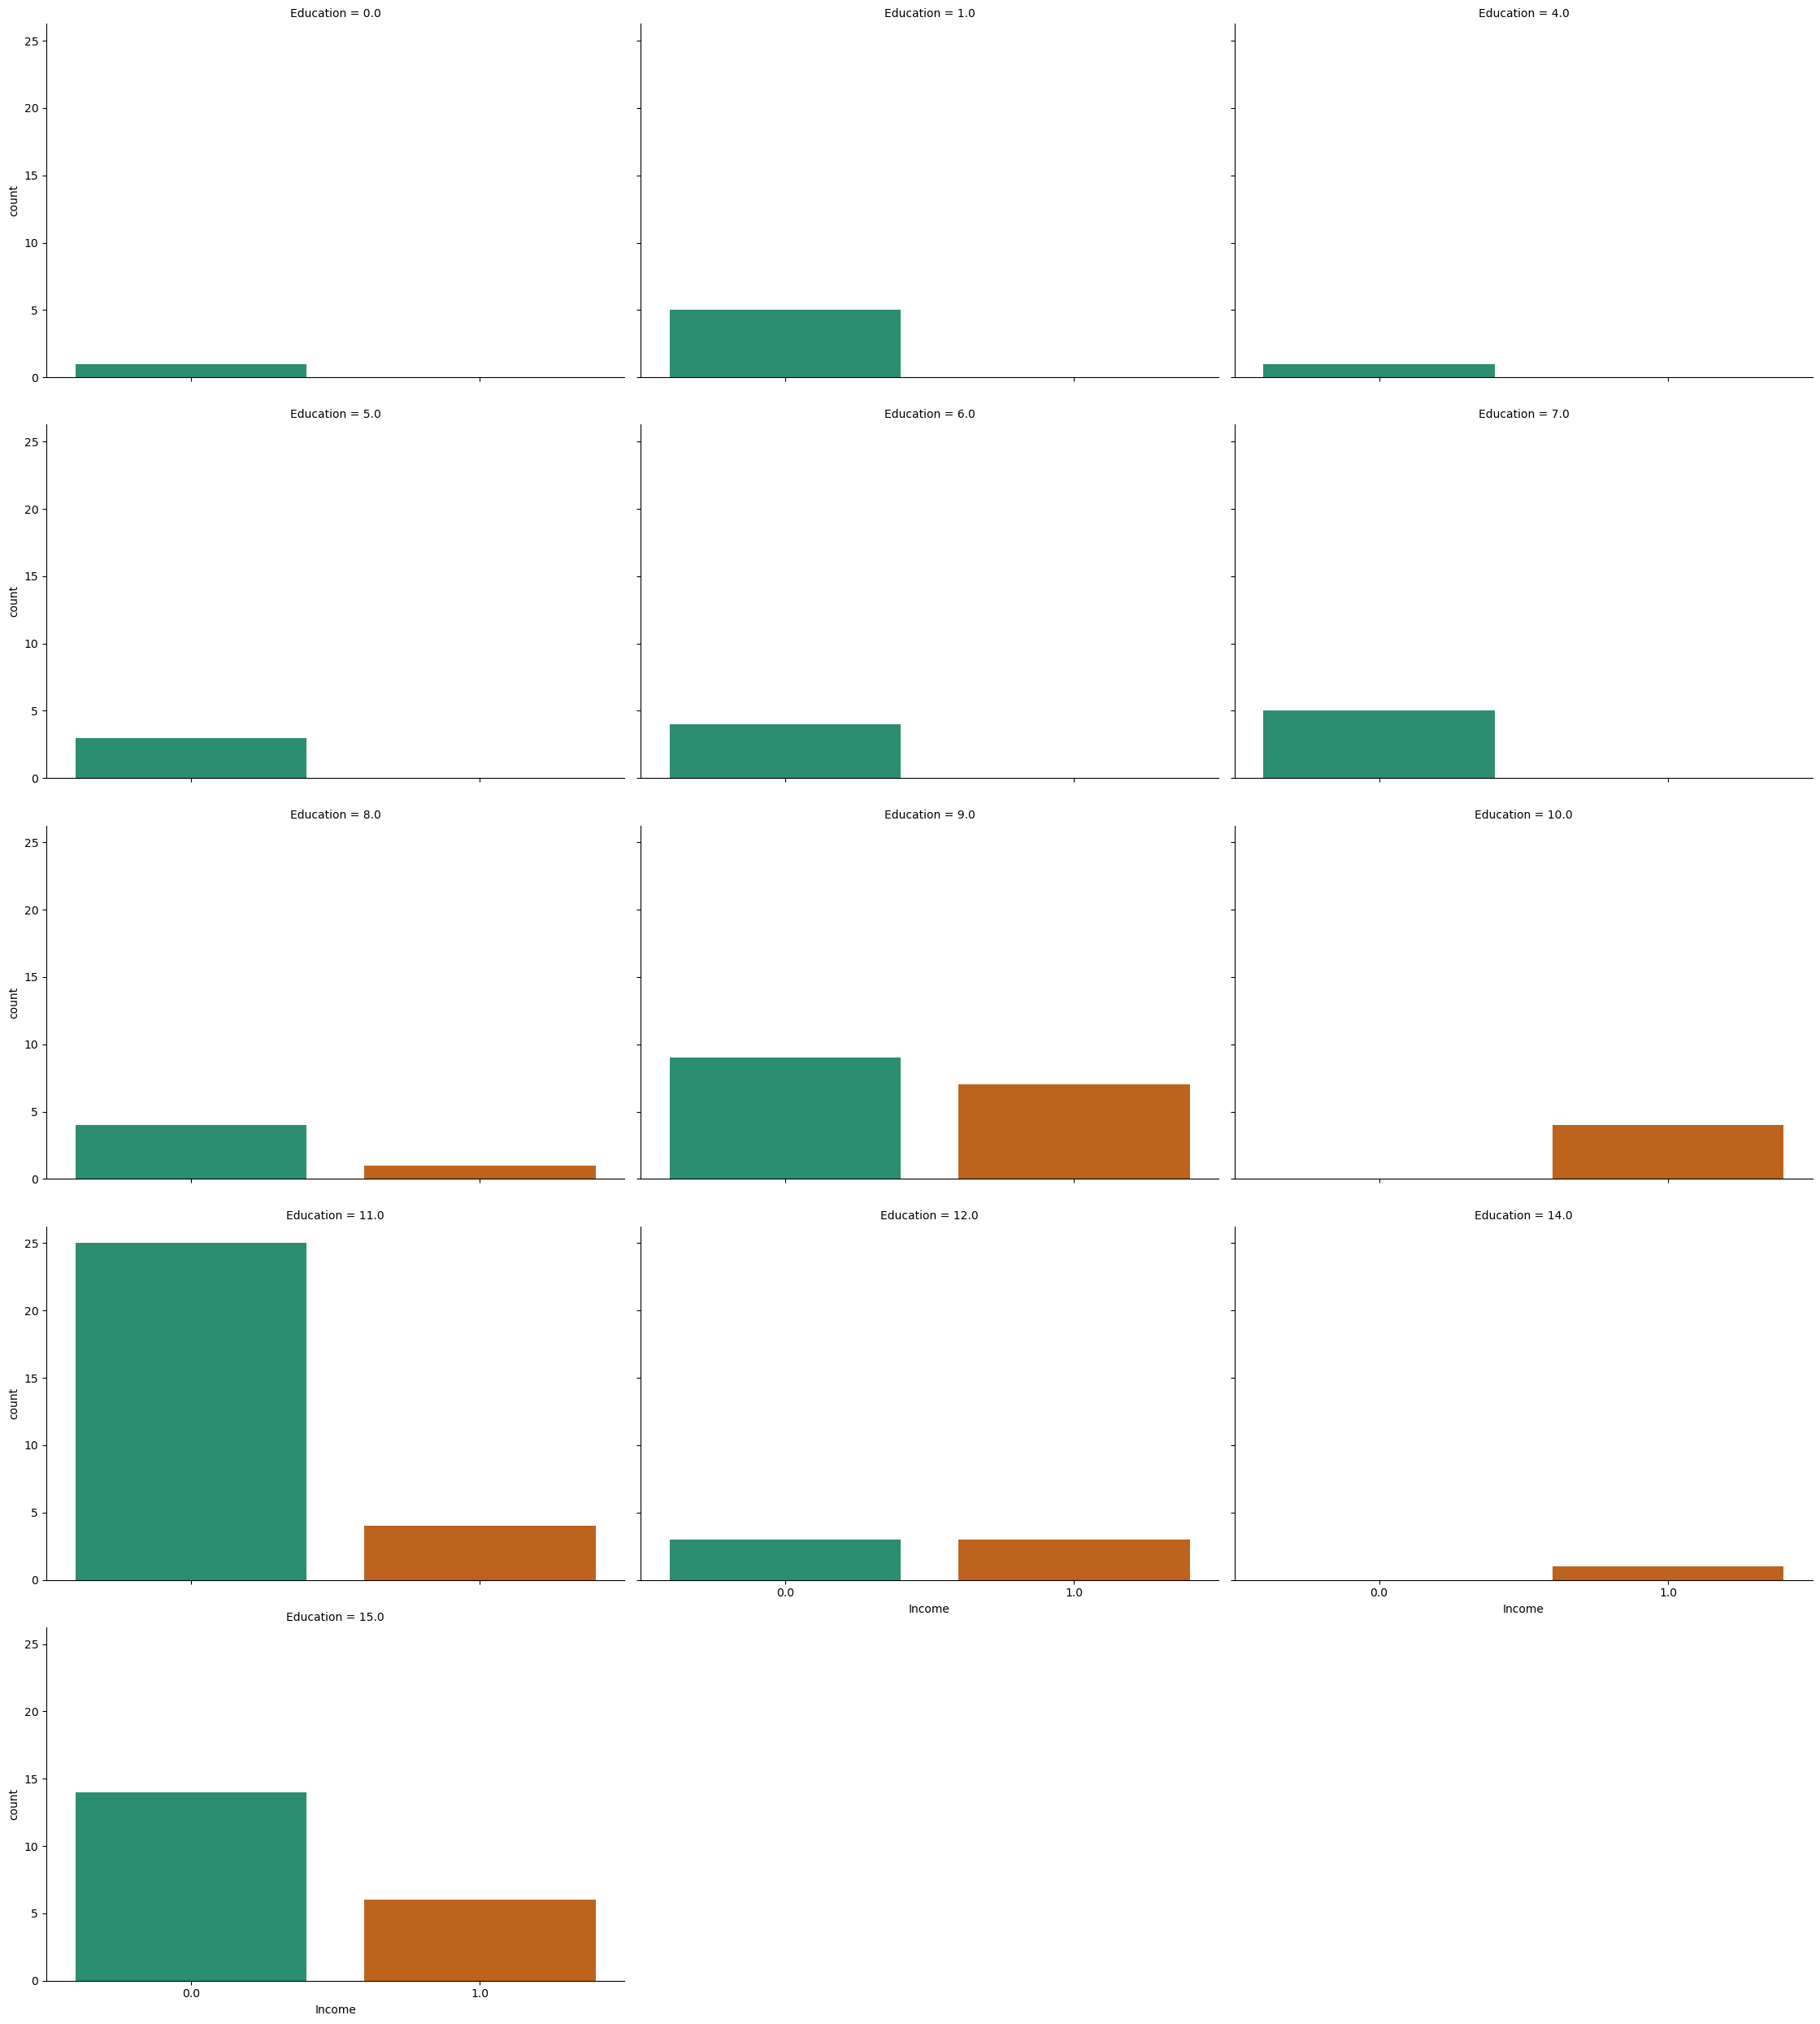

In [75]:
sns.catplot(x= 'Income', col= 'Education', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of the applicants whose income is below 50k comes from education level 11.0 and whose income is above 50k come from education level 9.0.

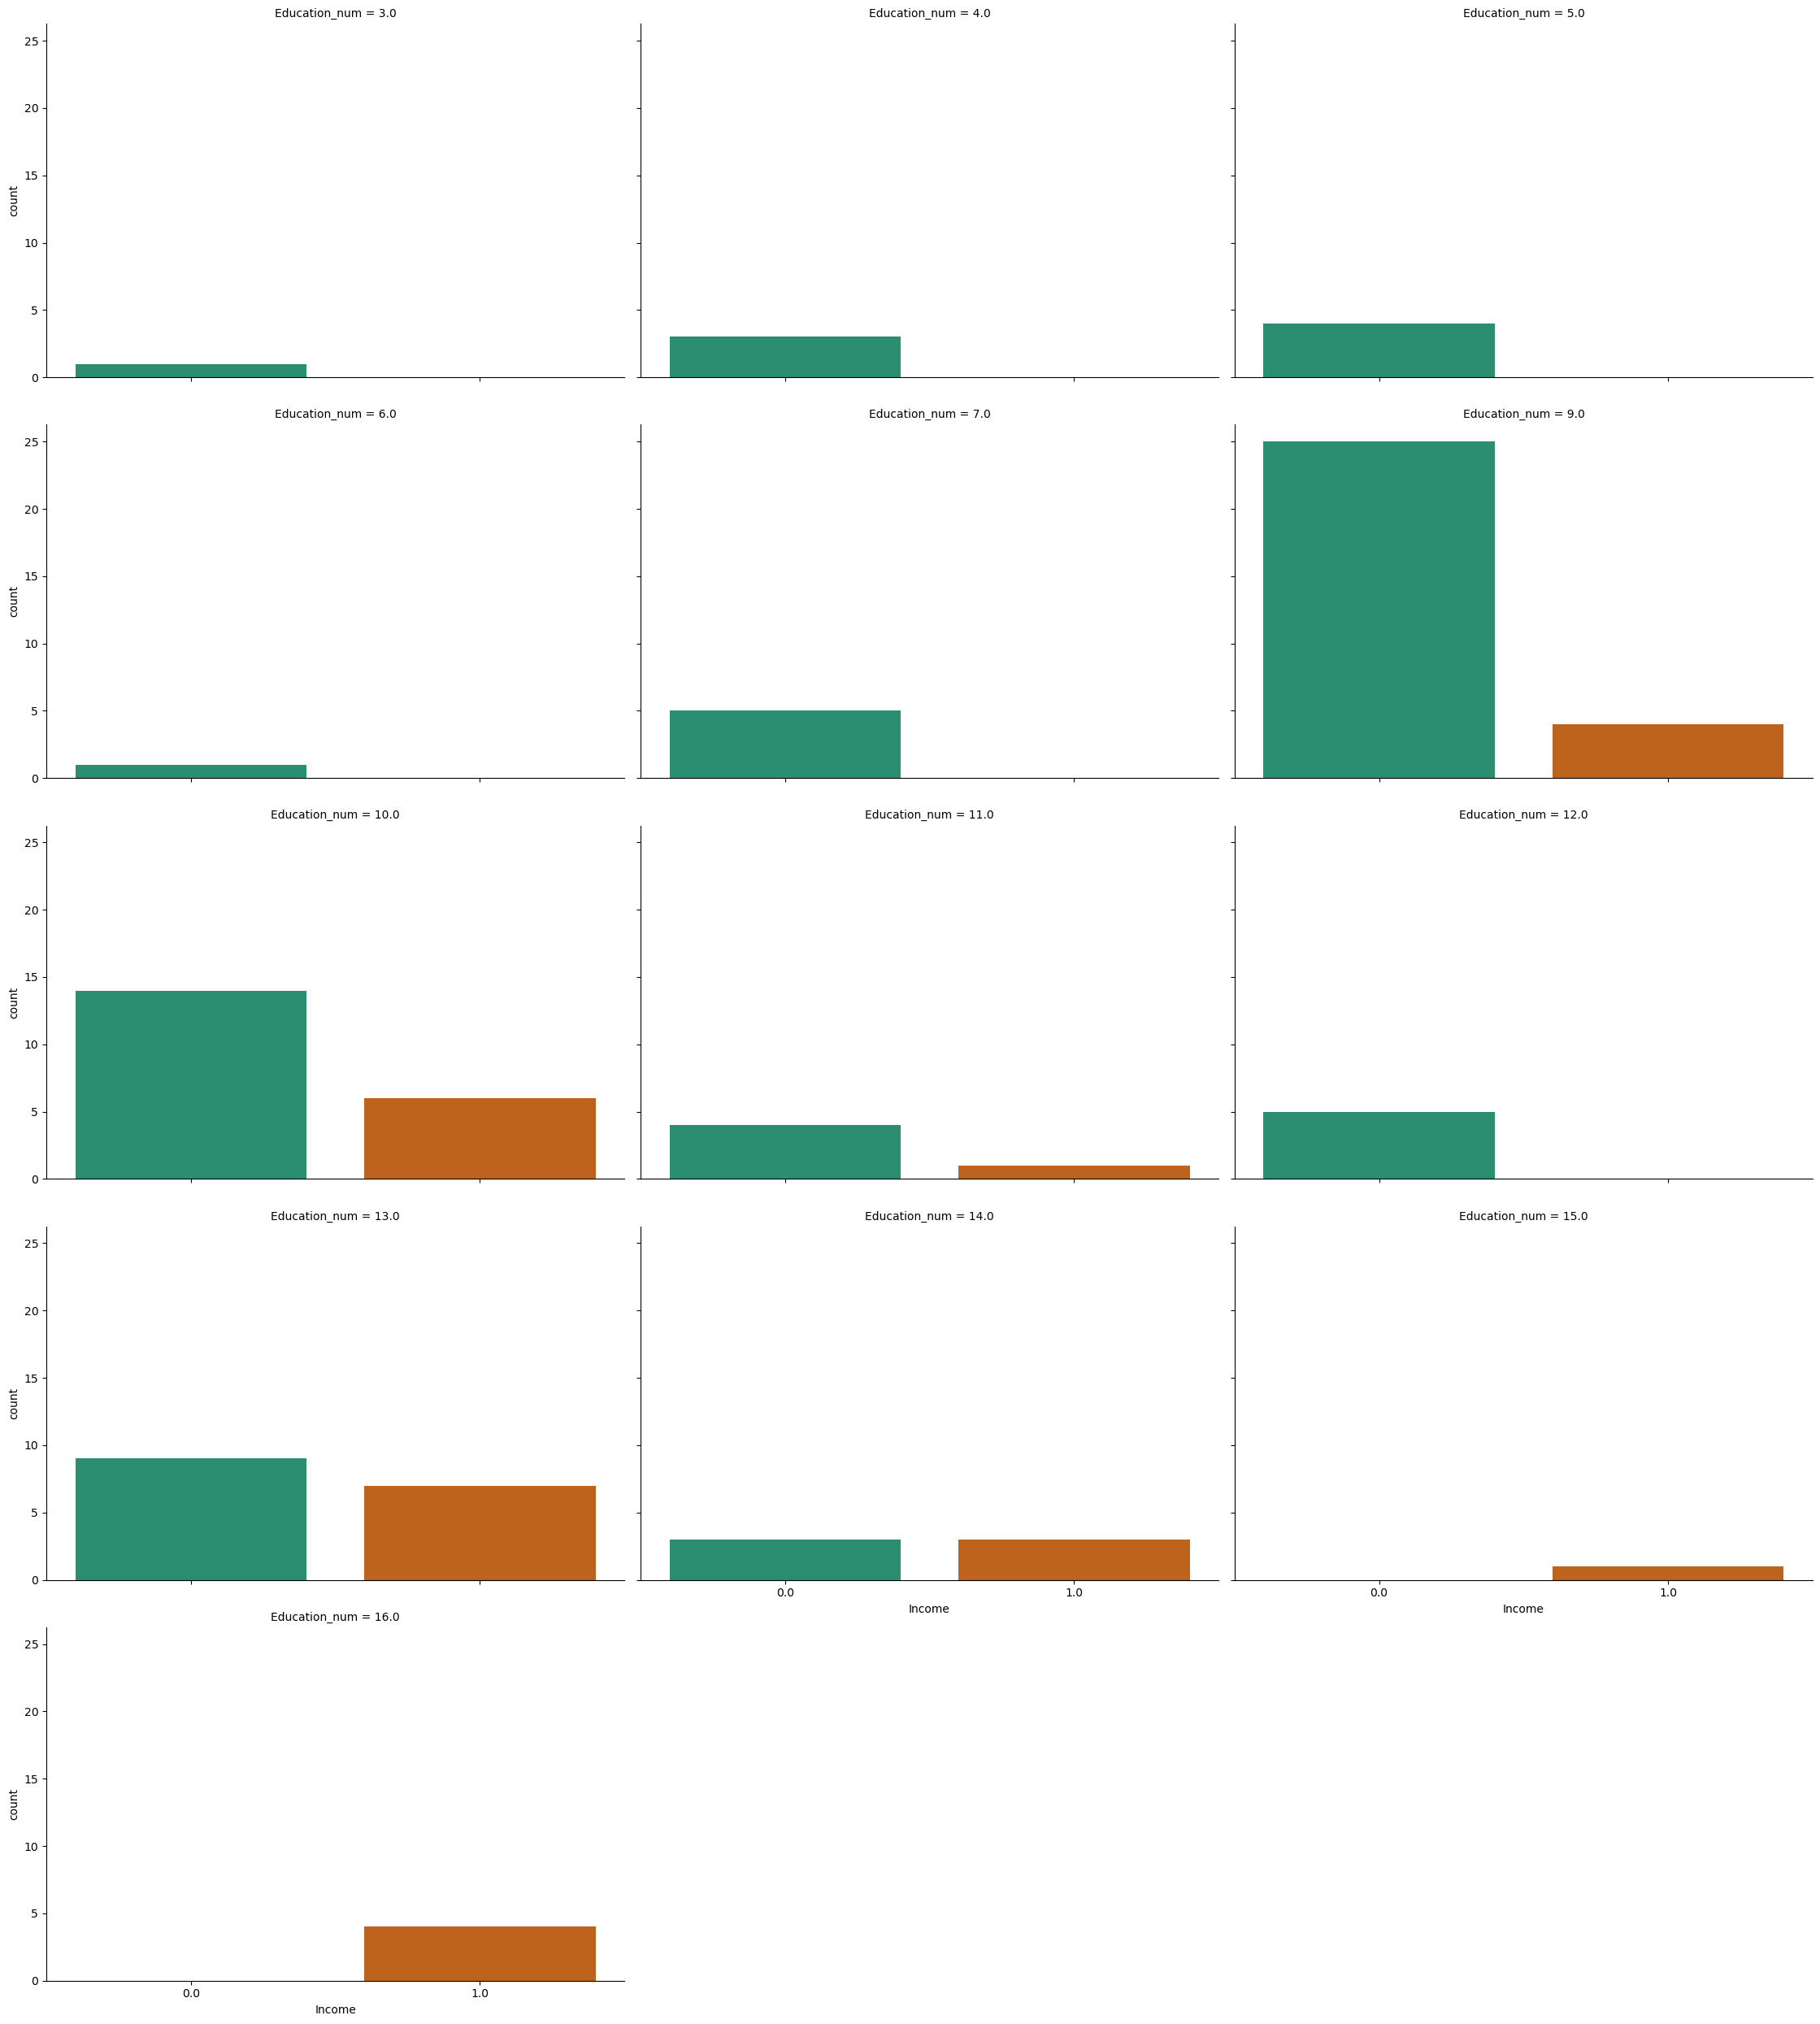

In [76]:
sns.catplot(x= 'Income', col= 'Education_num', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of applicants whose income is below 50k comes from education_num level- 9.0 and whose income is above 50k comes from education_num level 13.0.

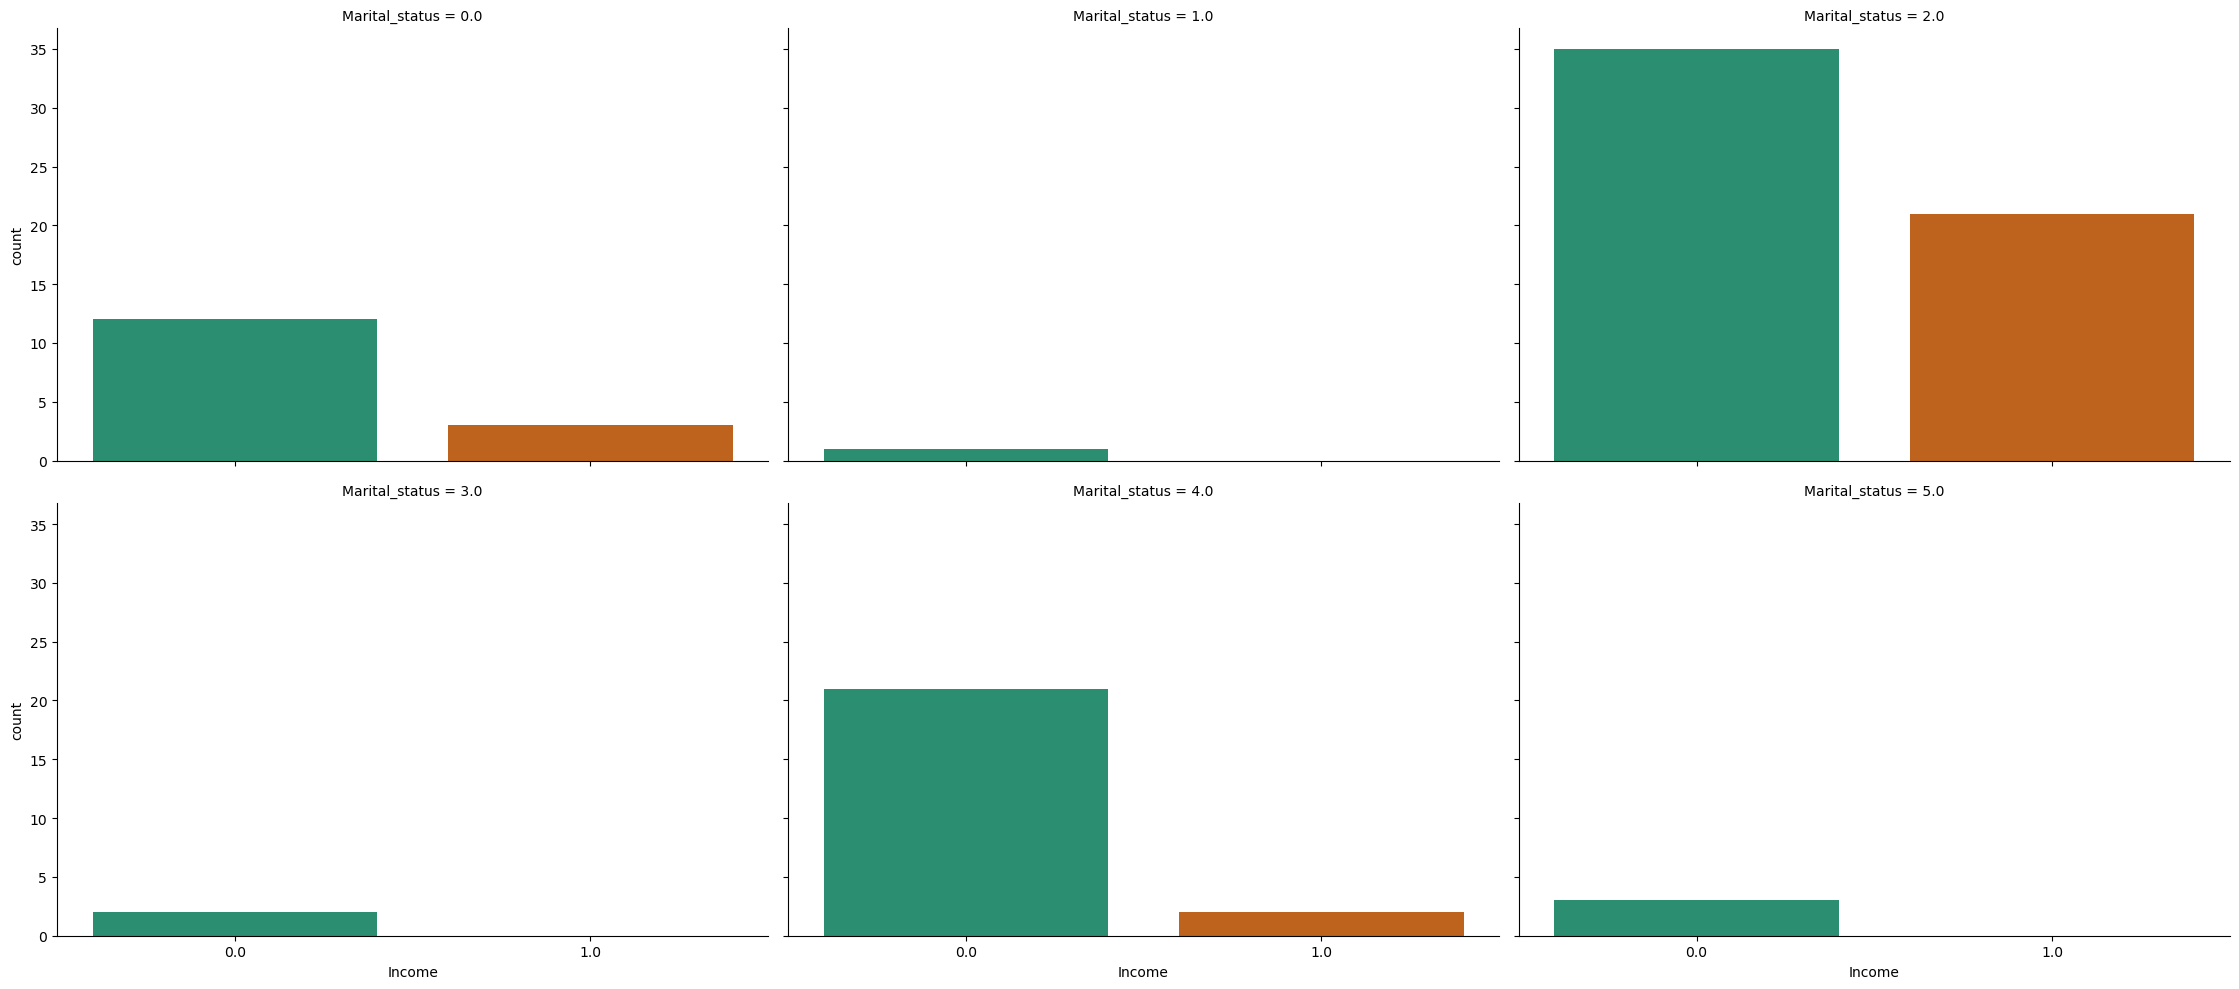

In [77]:
sns.catplot(x= 'Income', col= 'Marital_status', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of the applicants whose incomes is below 50k and above 50k comes from marital status 2.0.

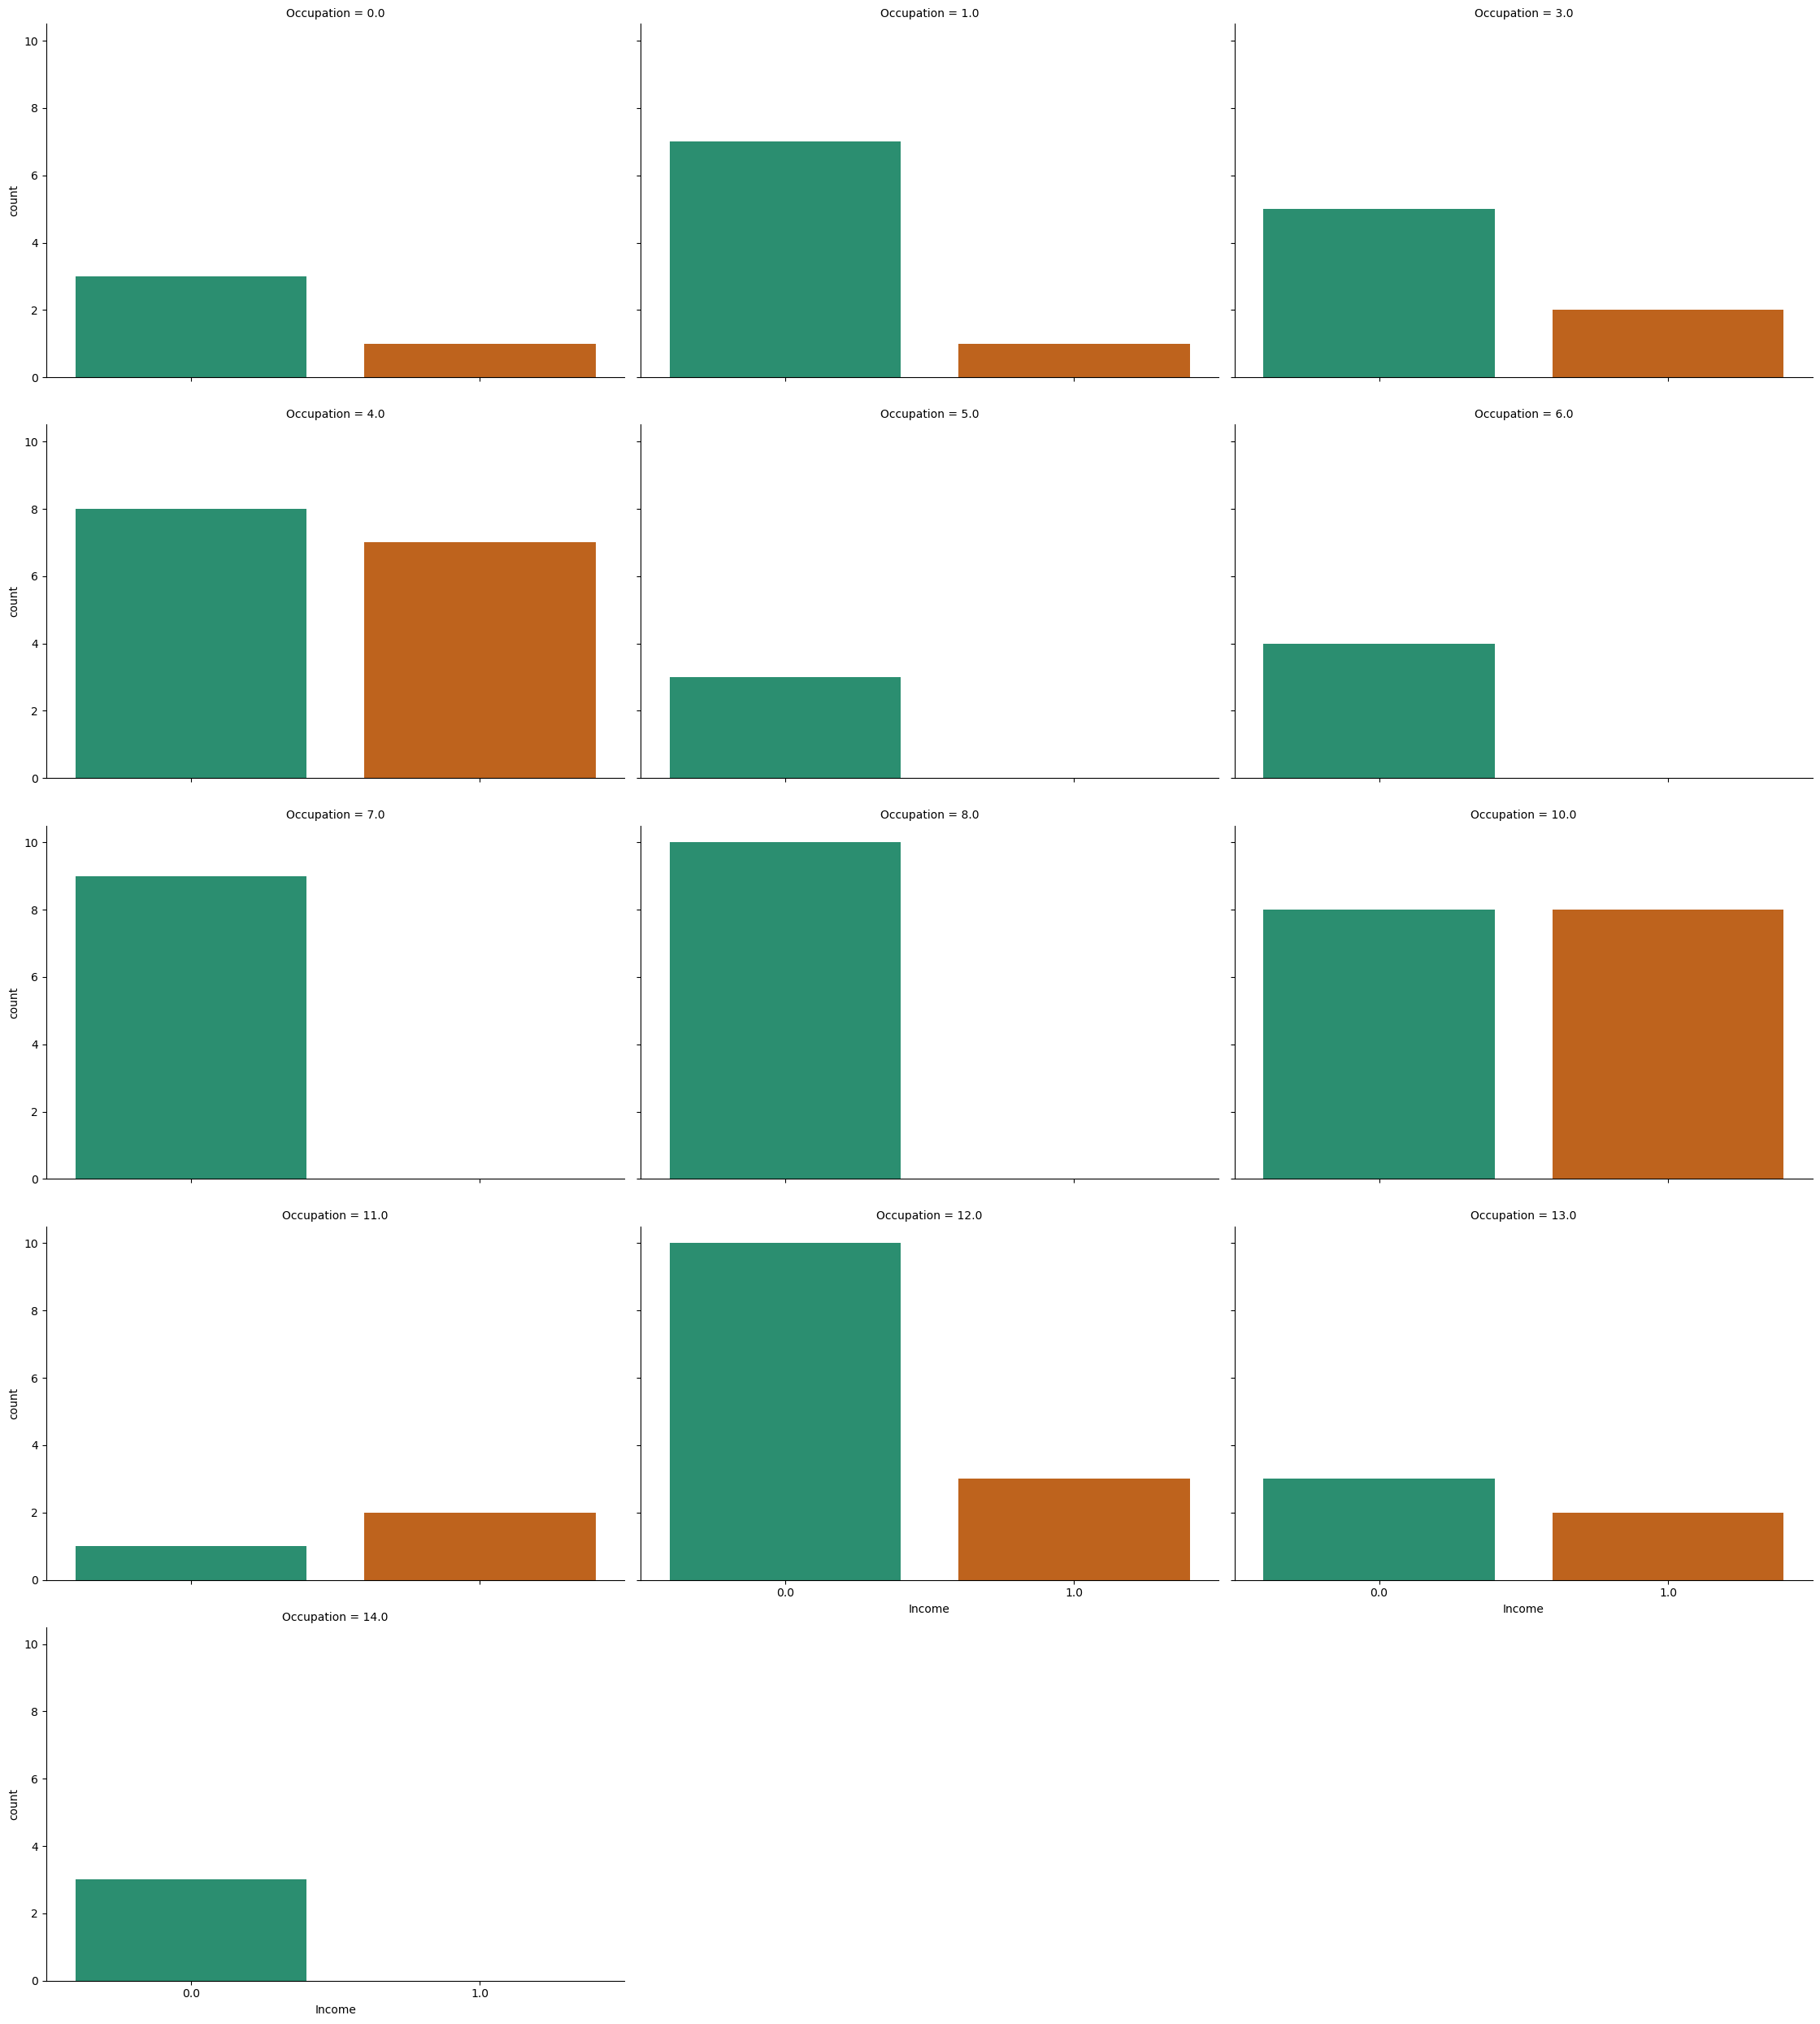

In [78]:
sns.catplot(x= 'Income', col= 'Occupation', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of the applicants whose income is below 50k comes from occupation level 7,8, and 12, and applicants whose income is above 50k comes from occupation level 4 and 10.

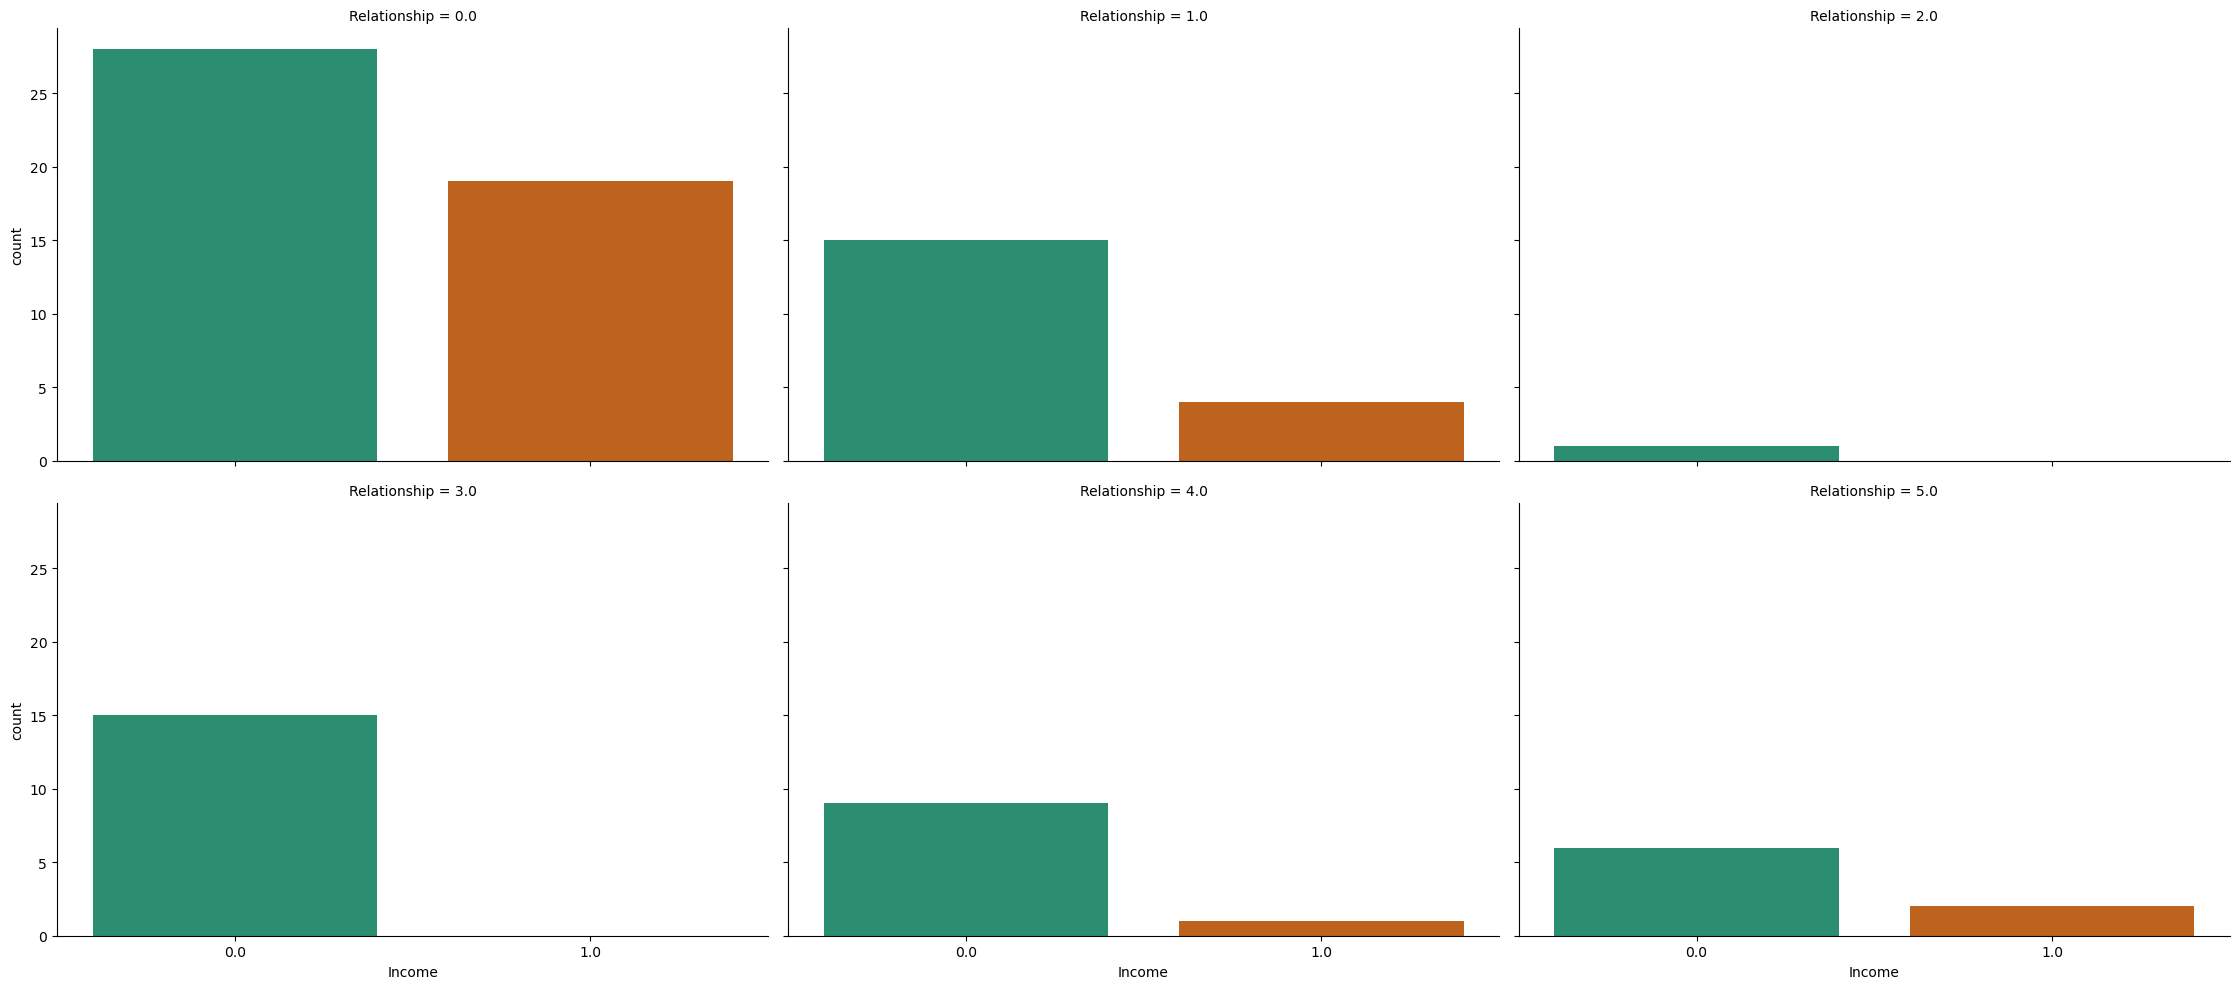

In [79]:
sns.catplot(x= 'Income', col= 'Relationship', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of the applicants whose income is above 50k and below 50k comes from relationship 0.0.

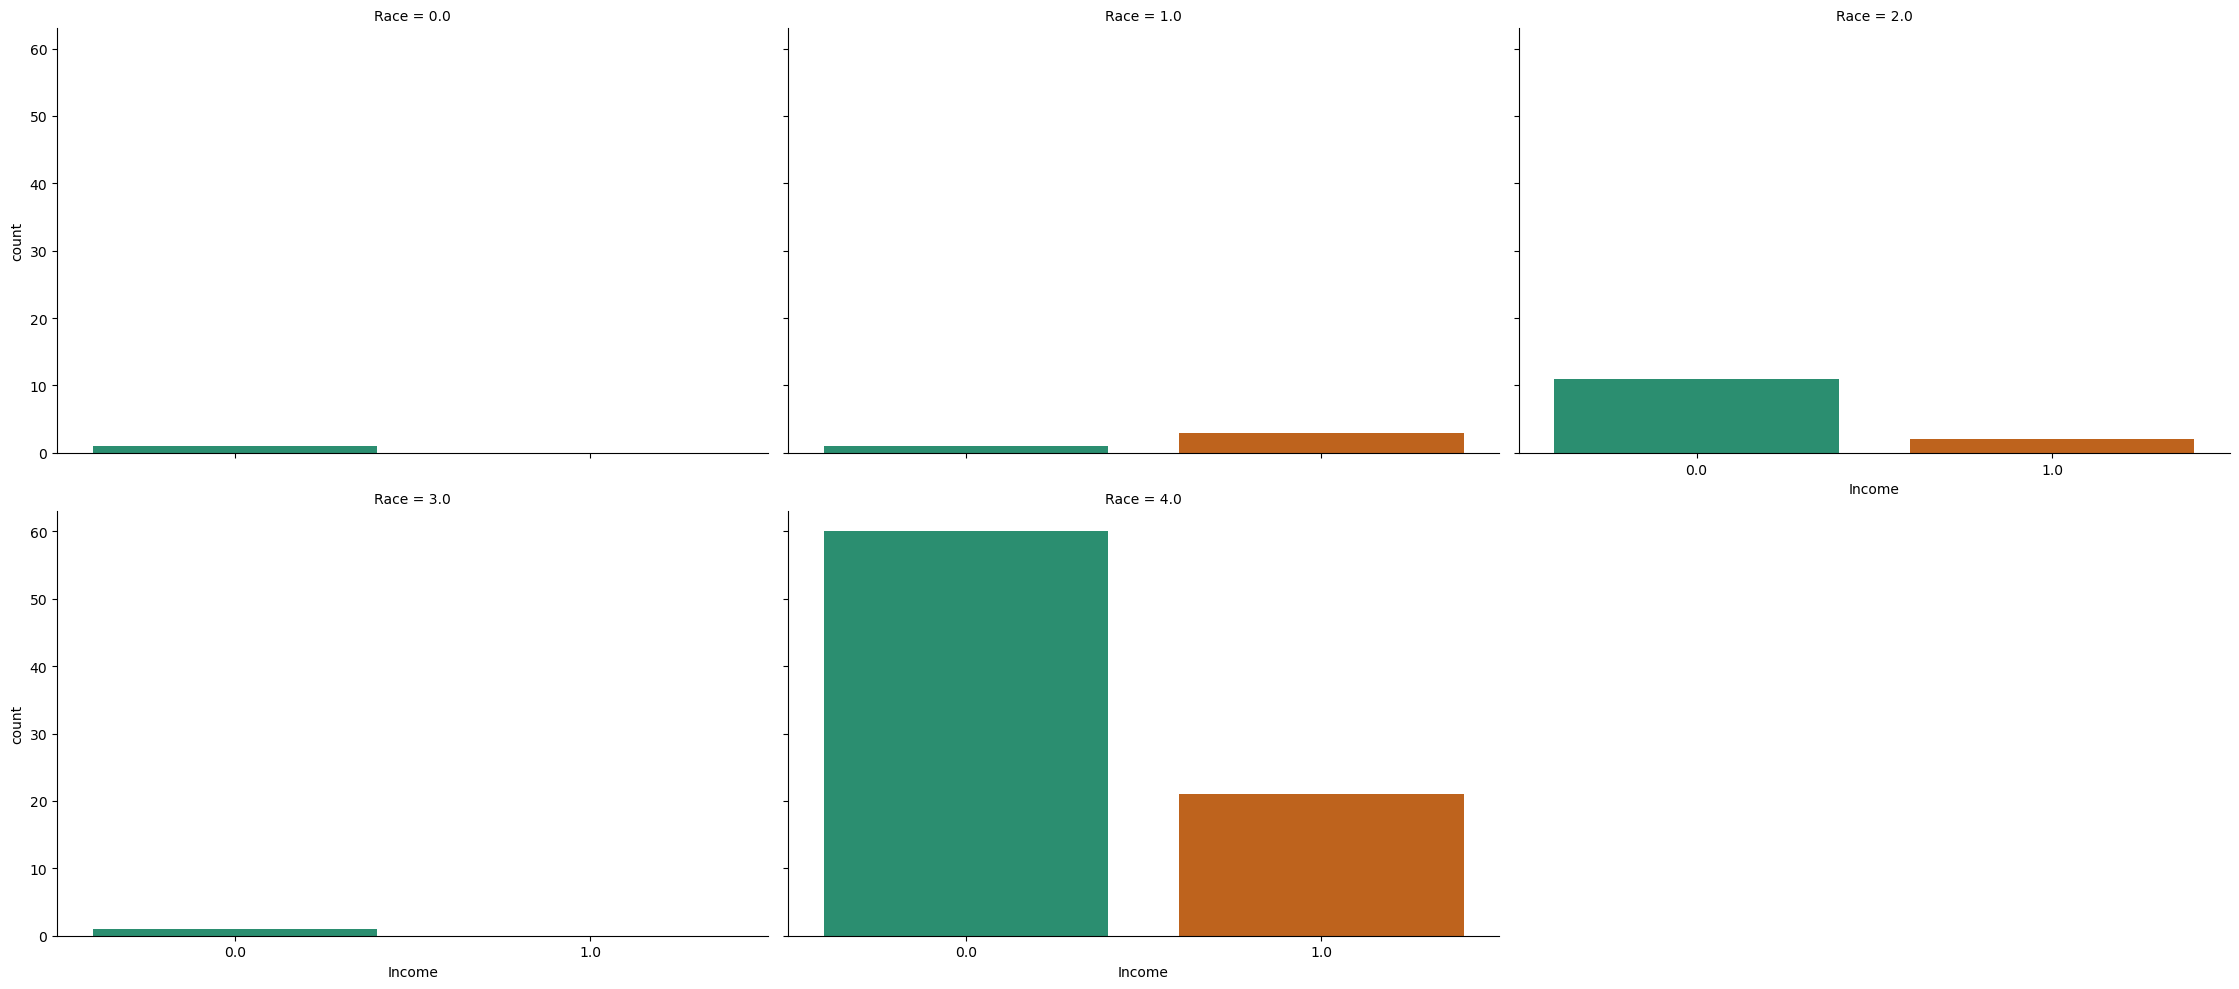

In [80]:
sns.catplot(x= 'Income', col= 'Race', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of the applicants whose income is above 50k and below 50k comes from race category 4.0.

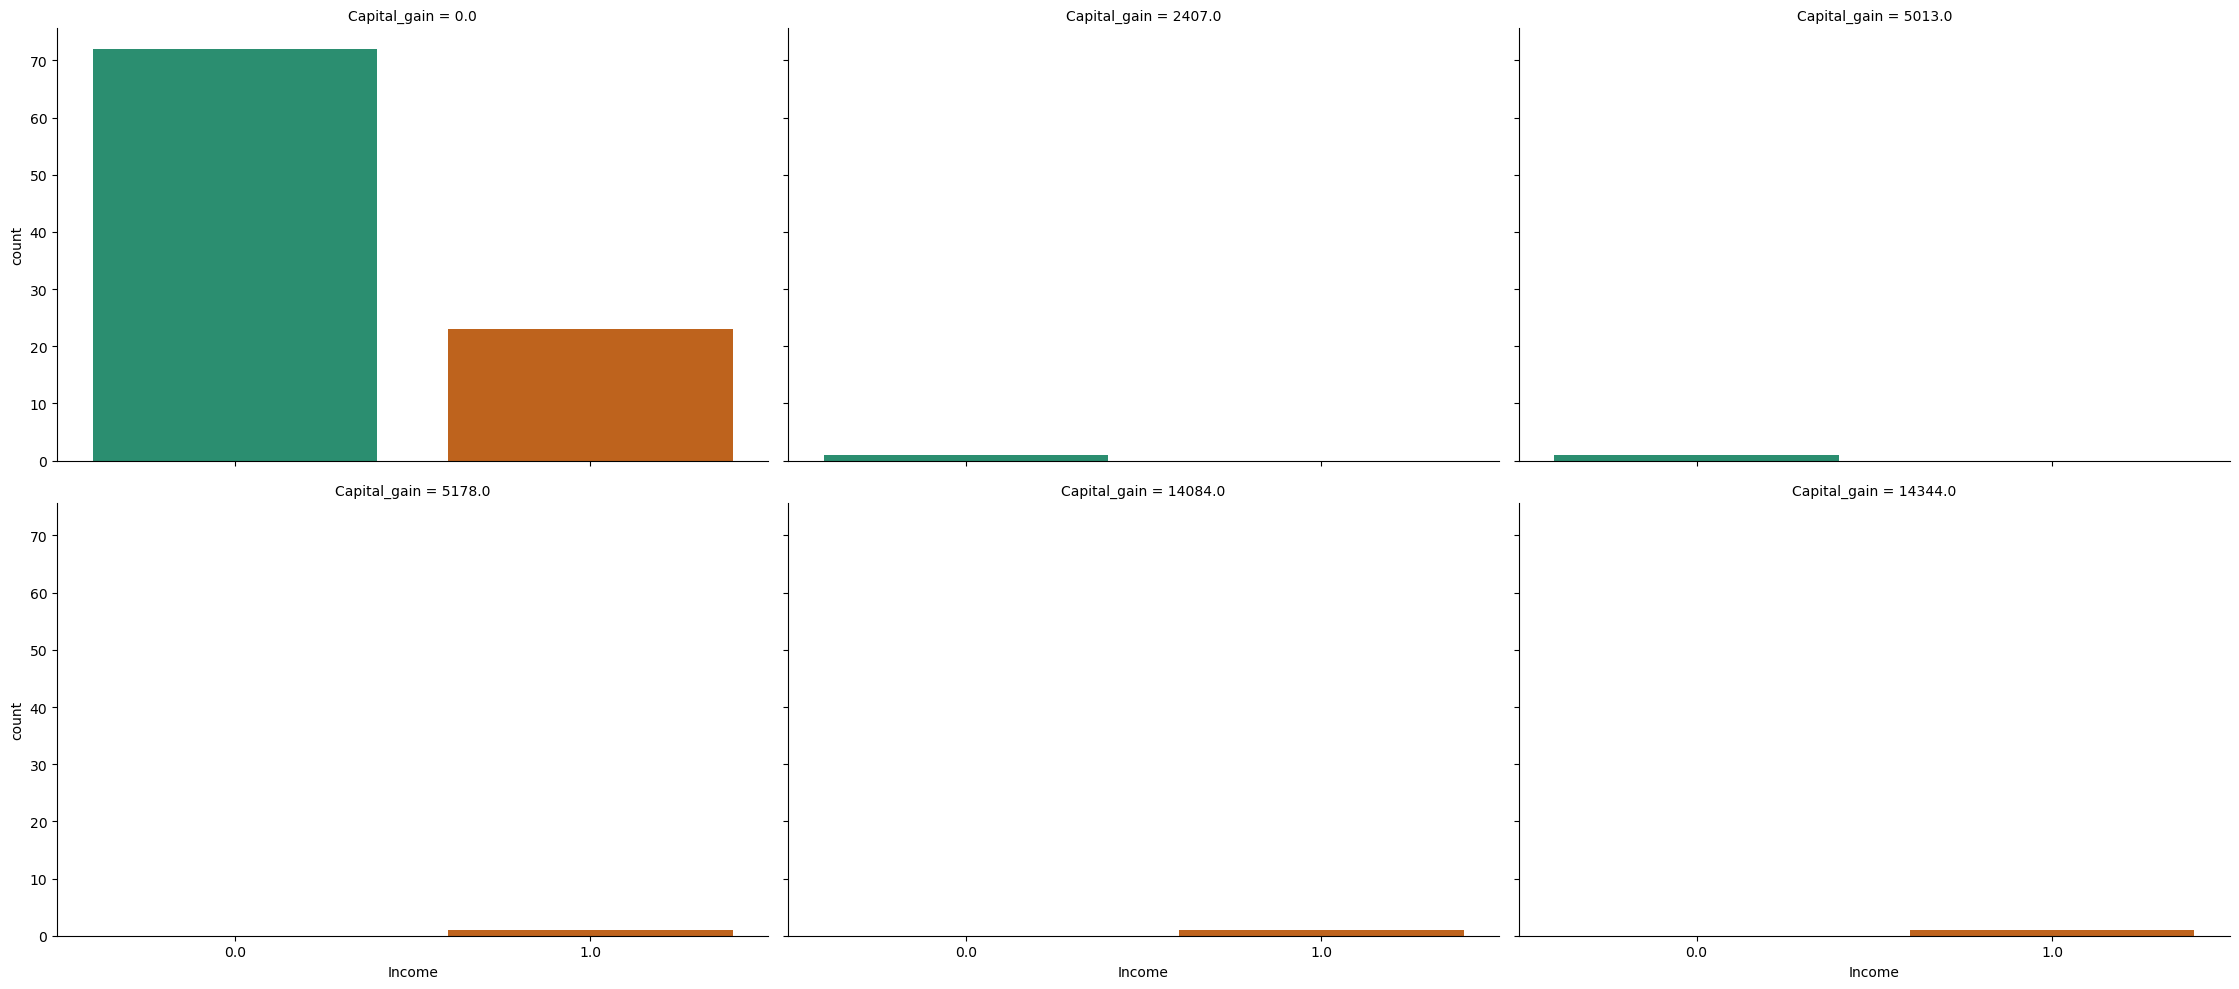

In [81]:
sns.catplot(x= 'Income', col= 'Capital_gain', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of applicants whose income is above 50k and below 50k comes from capital gain 0.0.

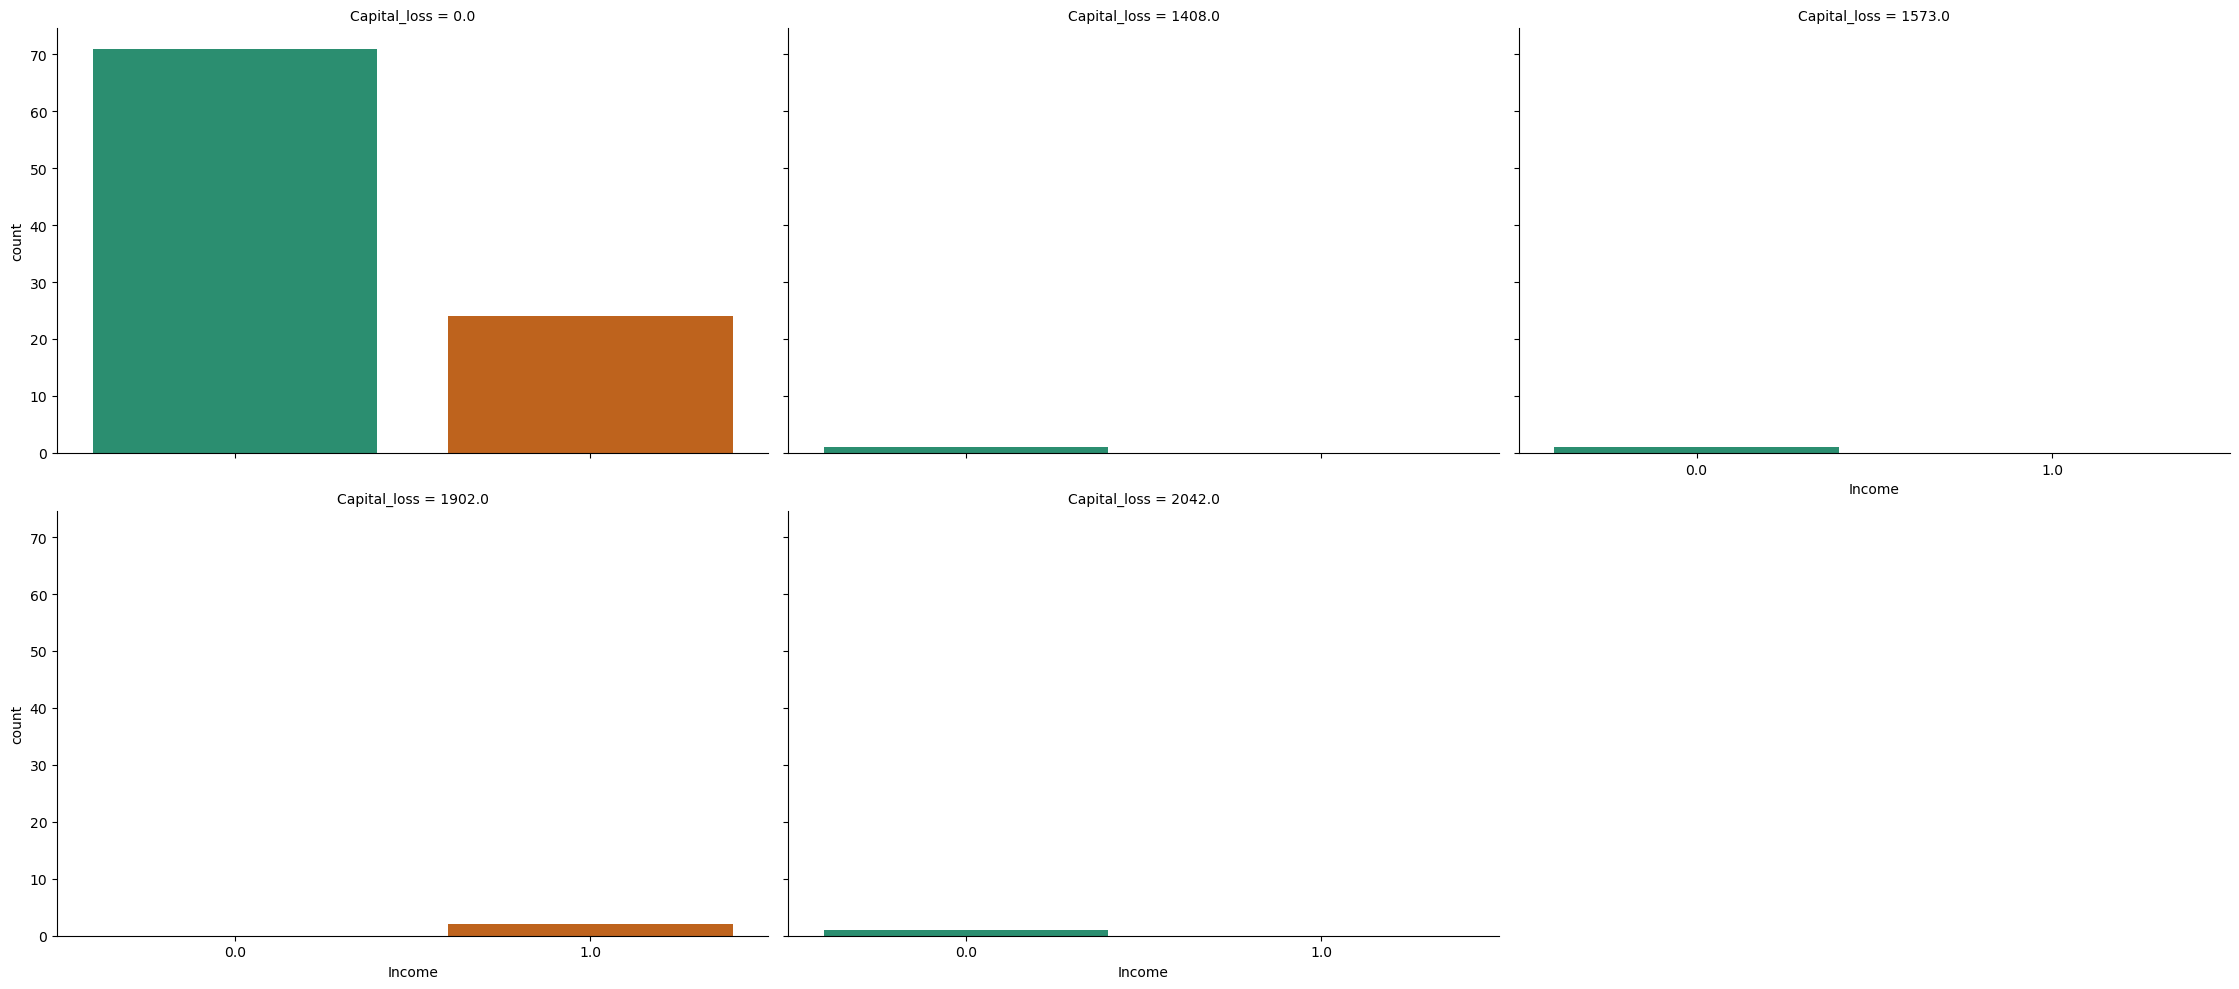

In [83]:
sns.catplot(x= 'Income', col= 'Capital_loss', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of applicants whose income is above 50k and below 50k comes from capital loss 0.0.

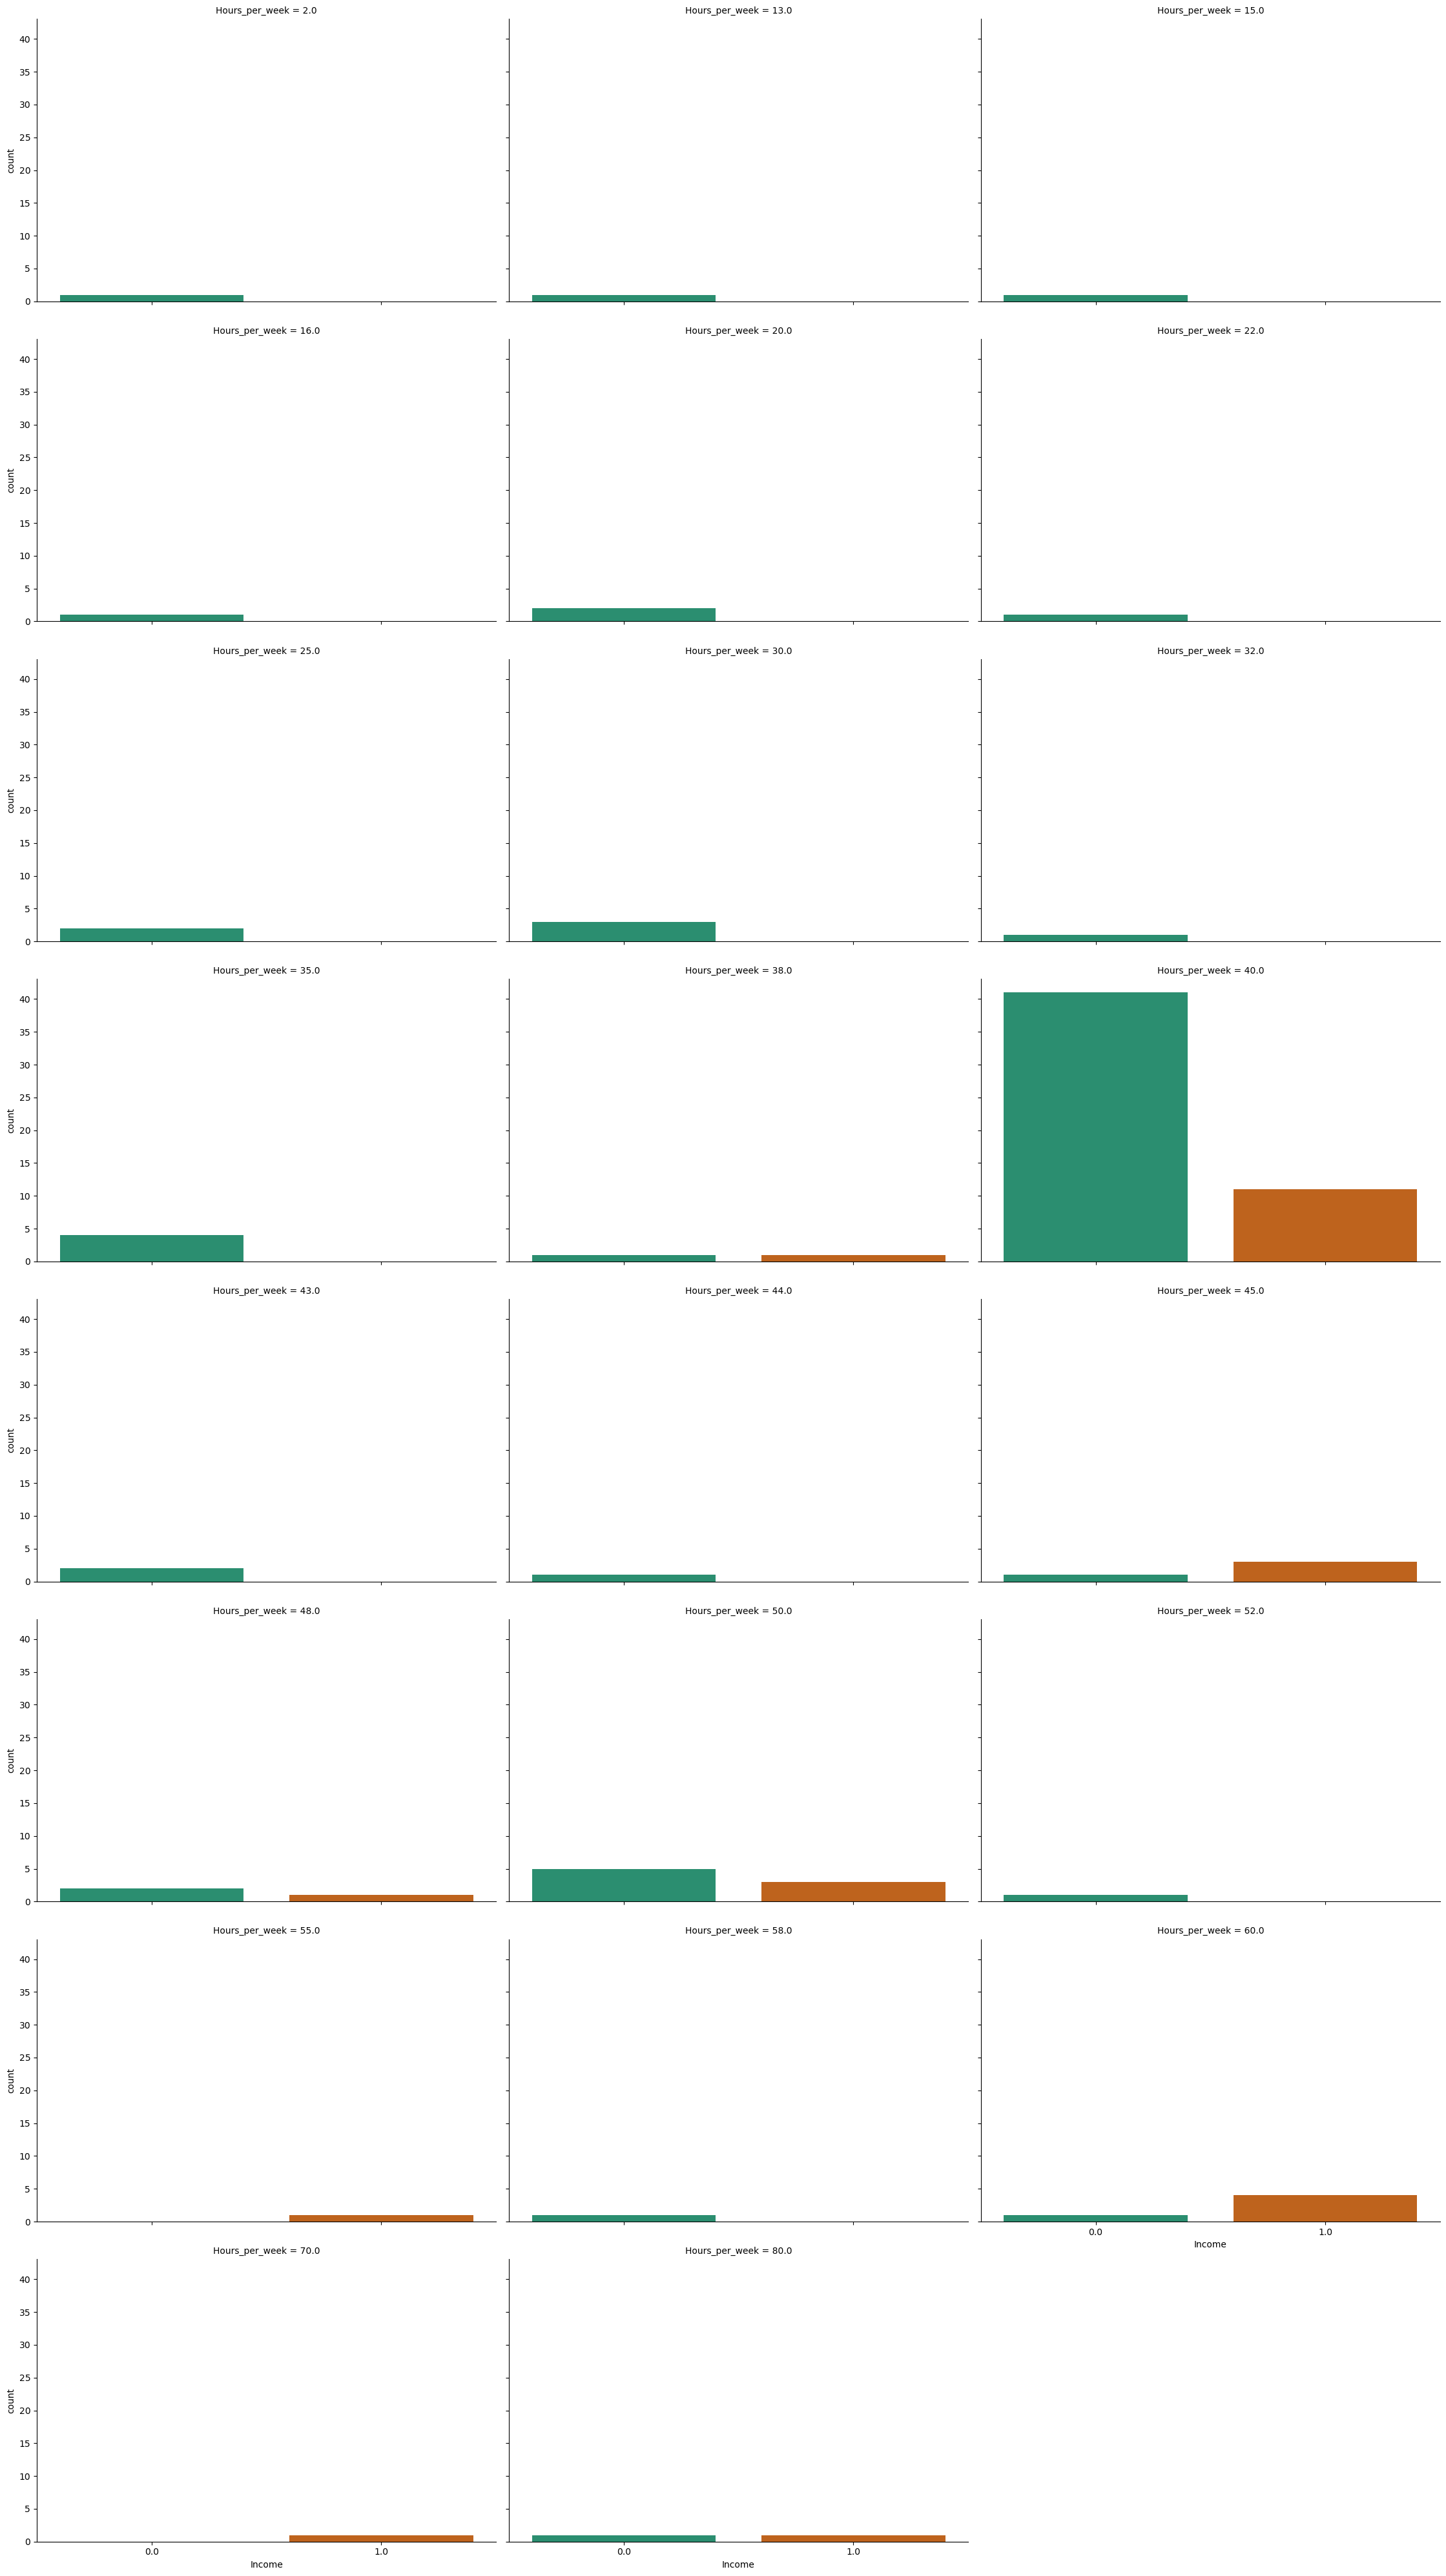

In [84]:
sns.catplot(x= 'Income', col= 'Hours_per_week', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of applicants whose income is above 50k and below 50k comes from 40 hours per week. 

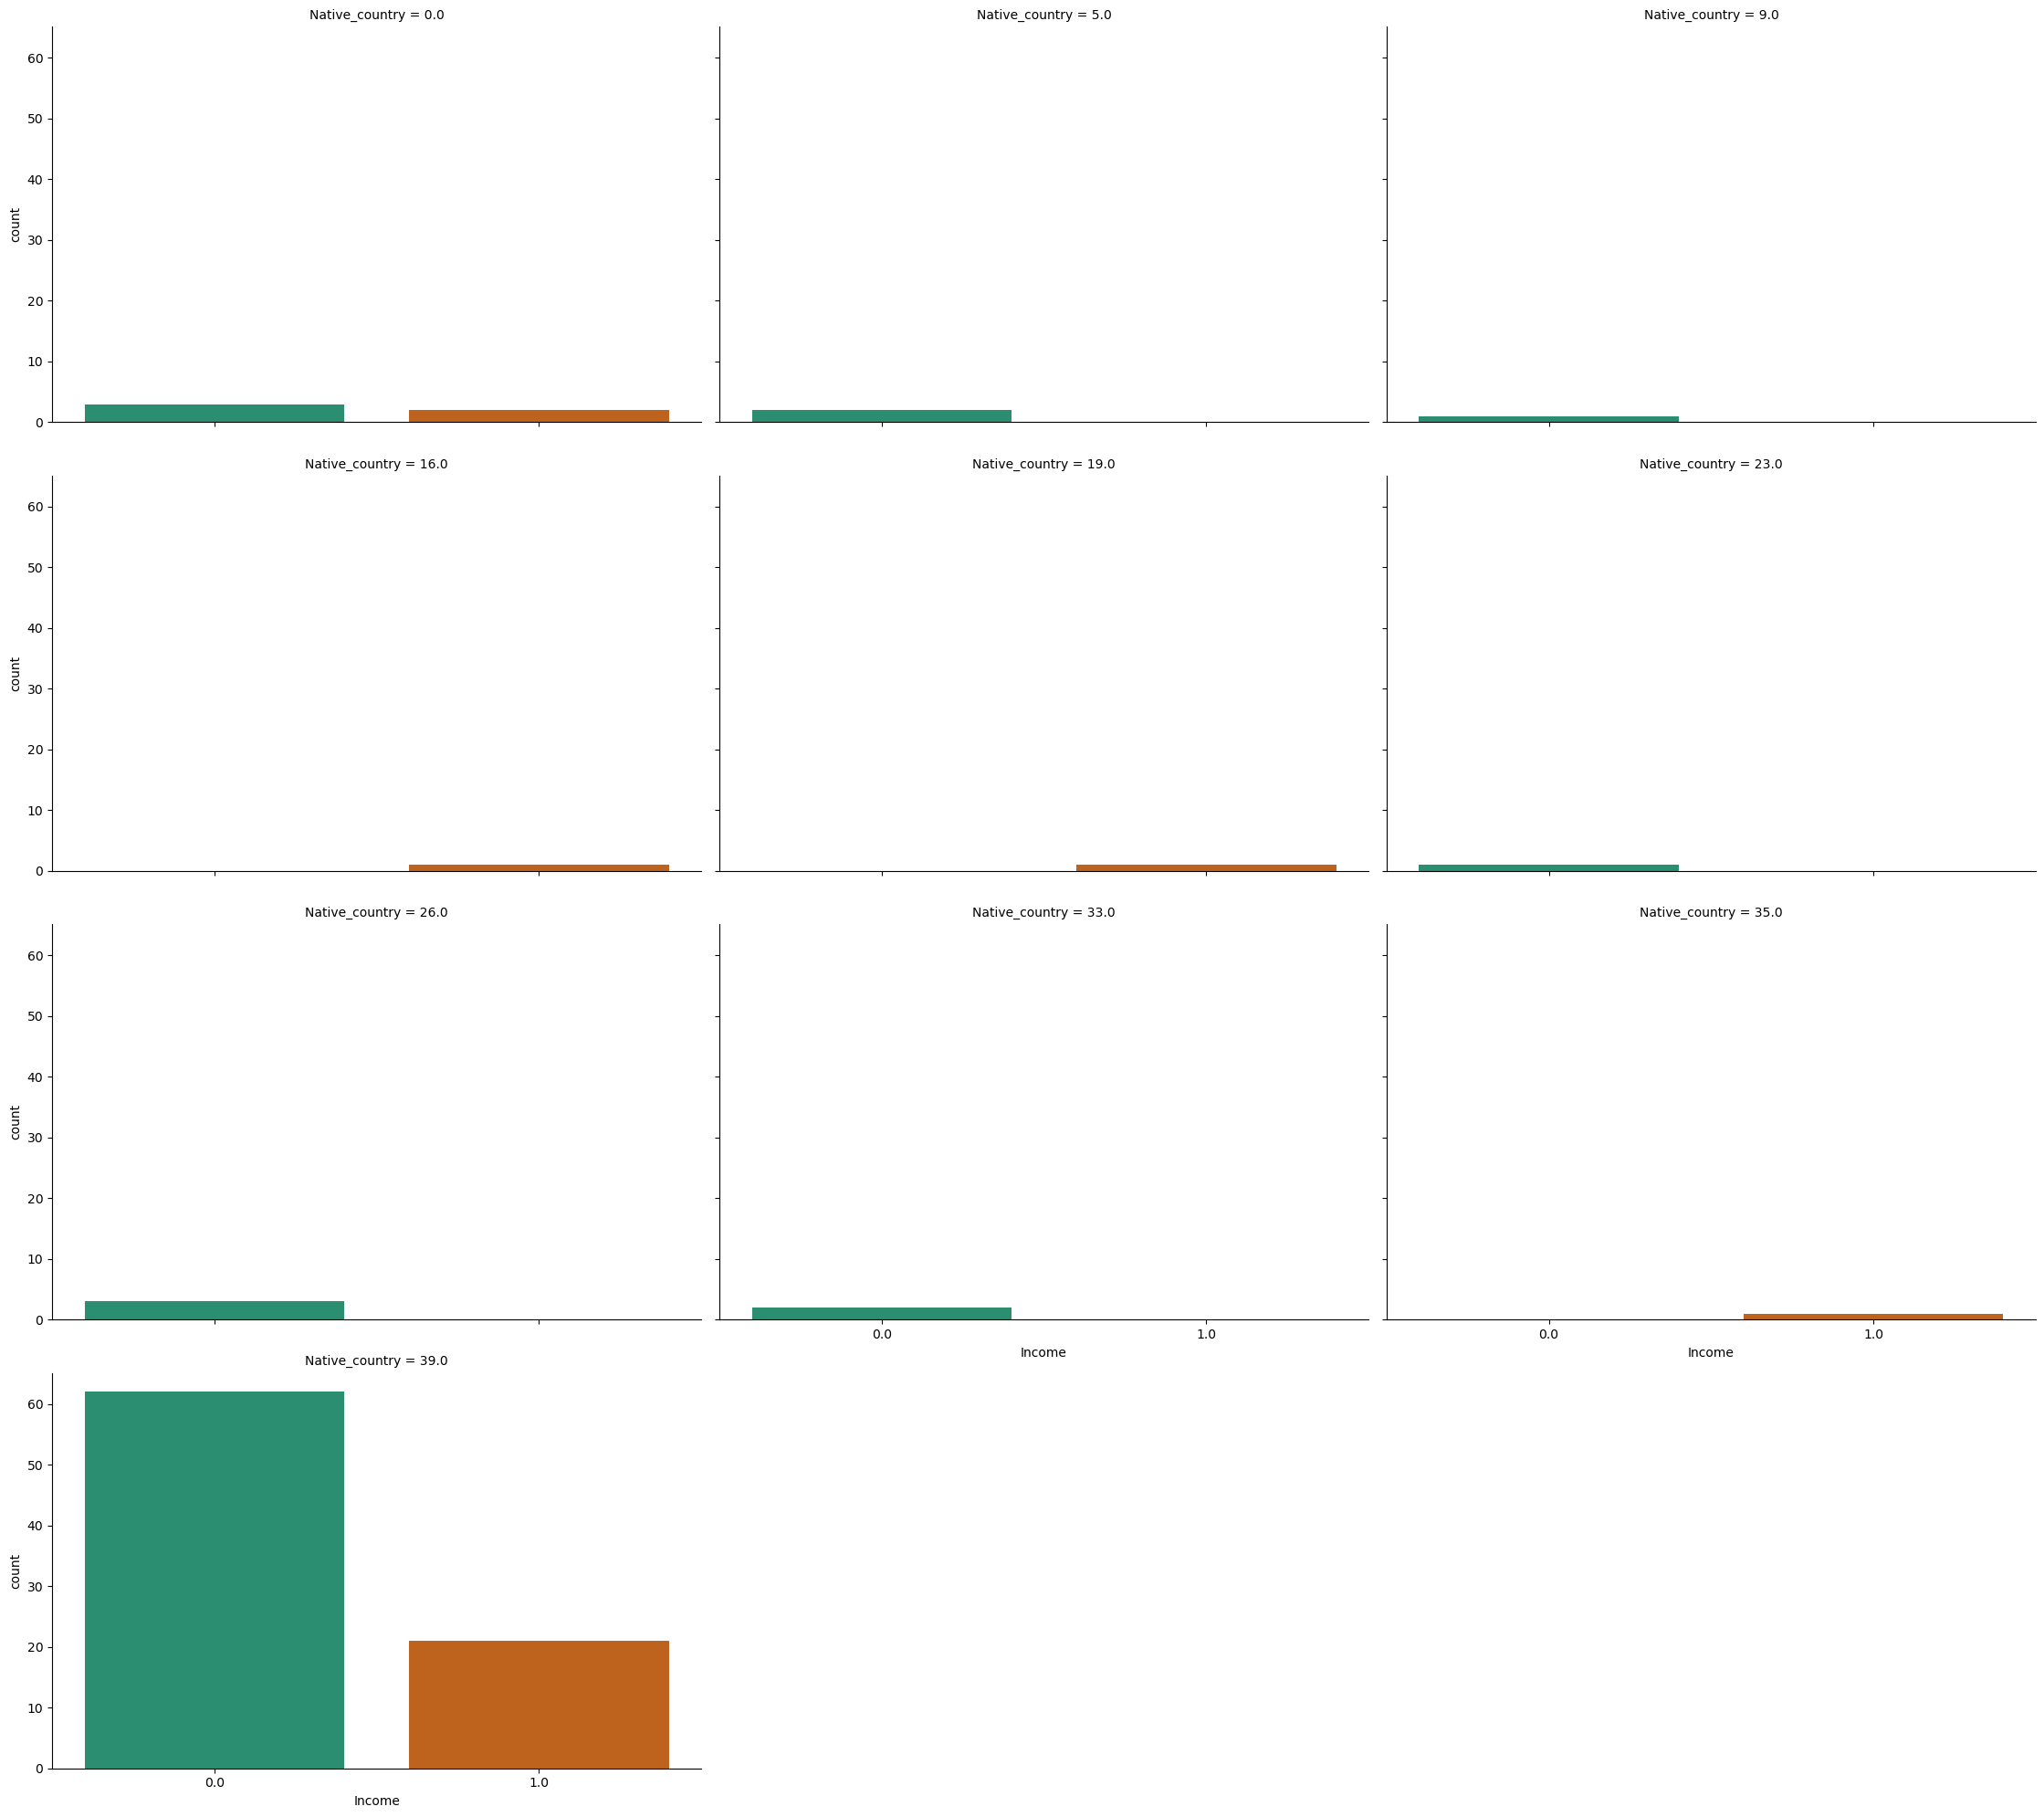

In [85]:
sns.catplot(x= 'Income', col= 'Native_country', data = census_income_data.head(100), kind="count", palette='Dark2',height=5, aspect=1.5, col_wrap=3)

most of applicants whose income is above 50k and below 50k comes from native country 39.0.

Pairplots

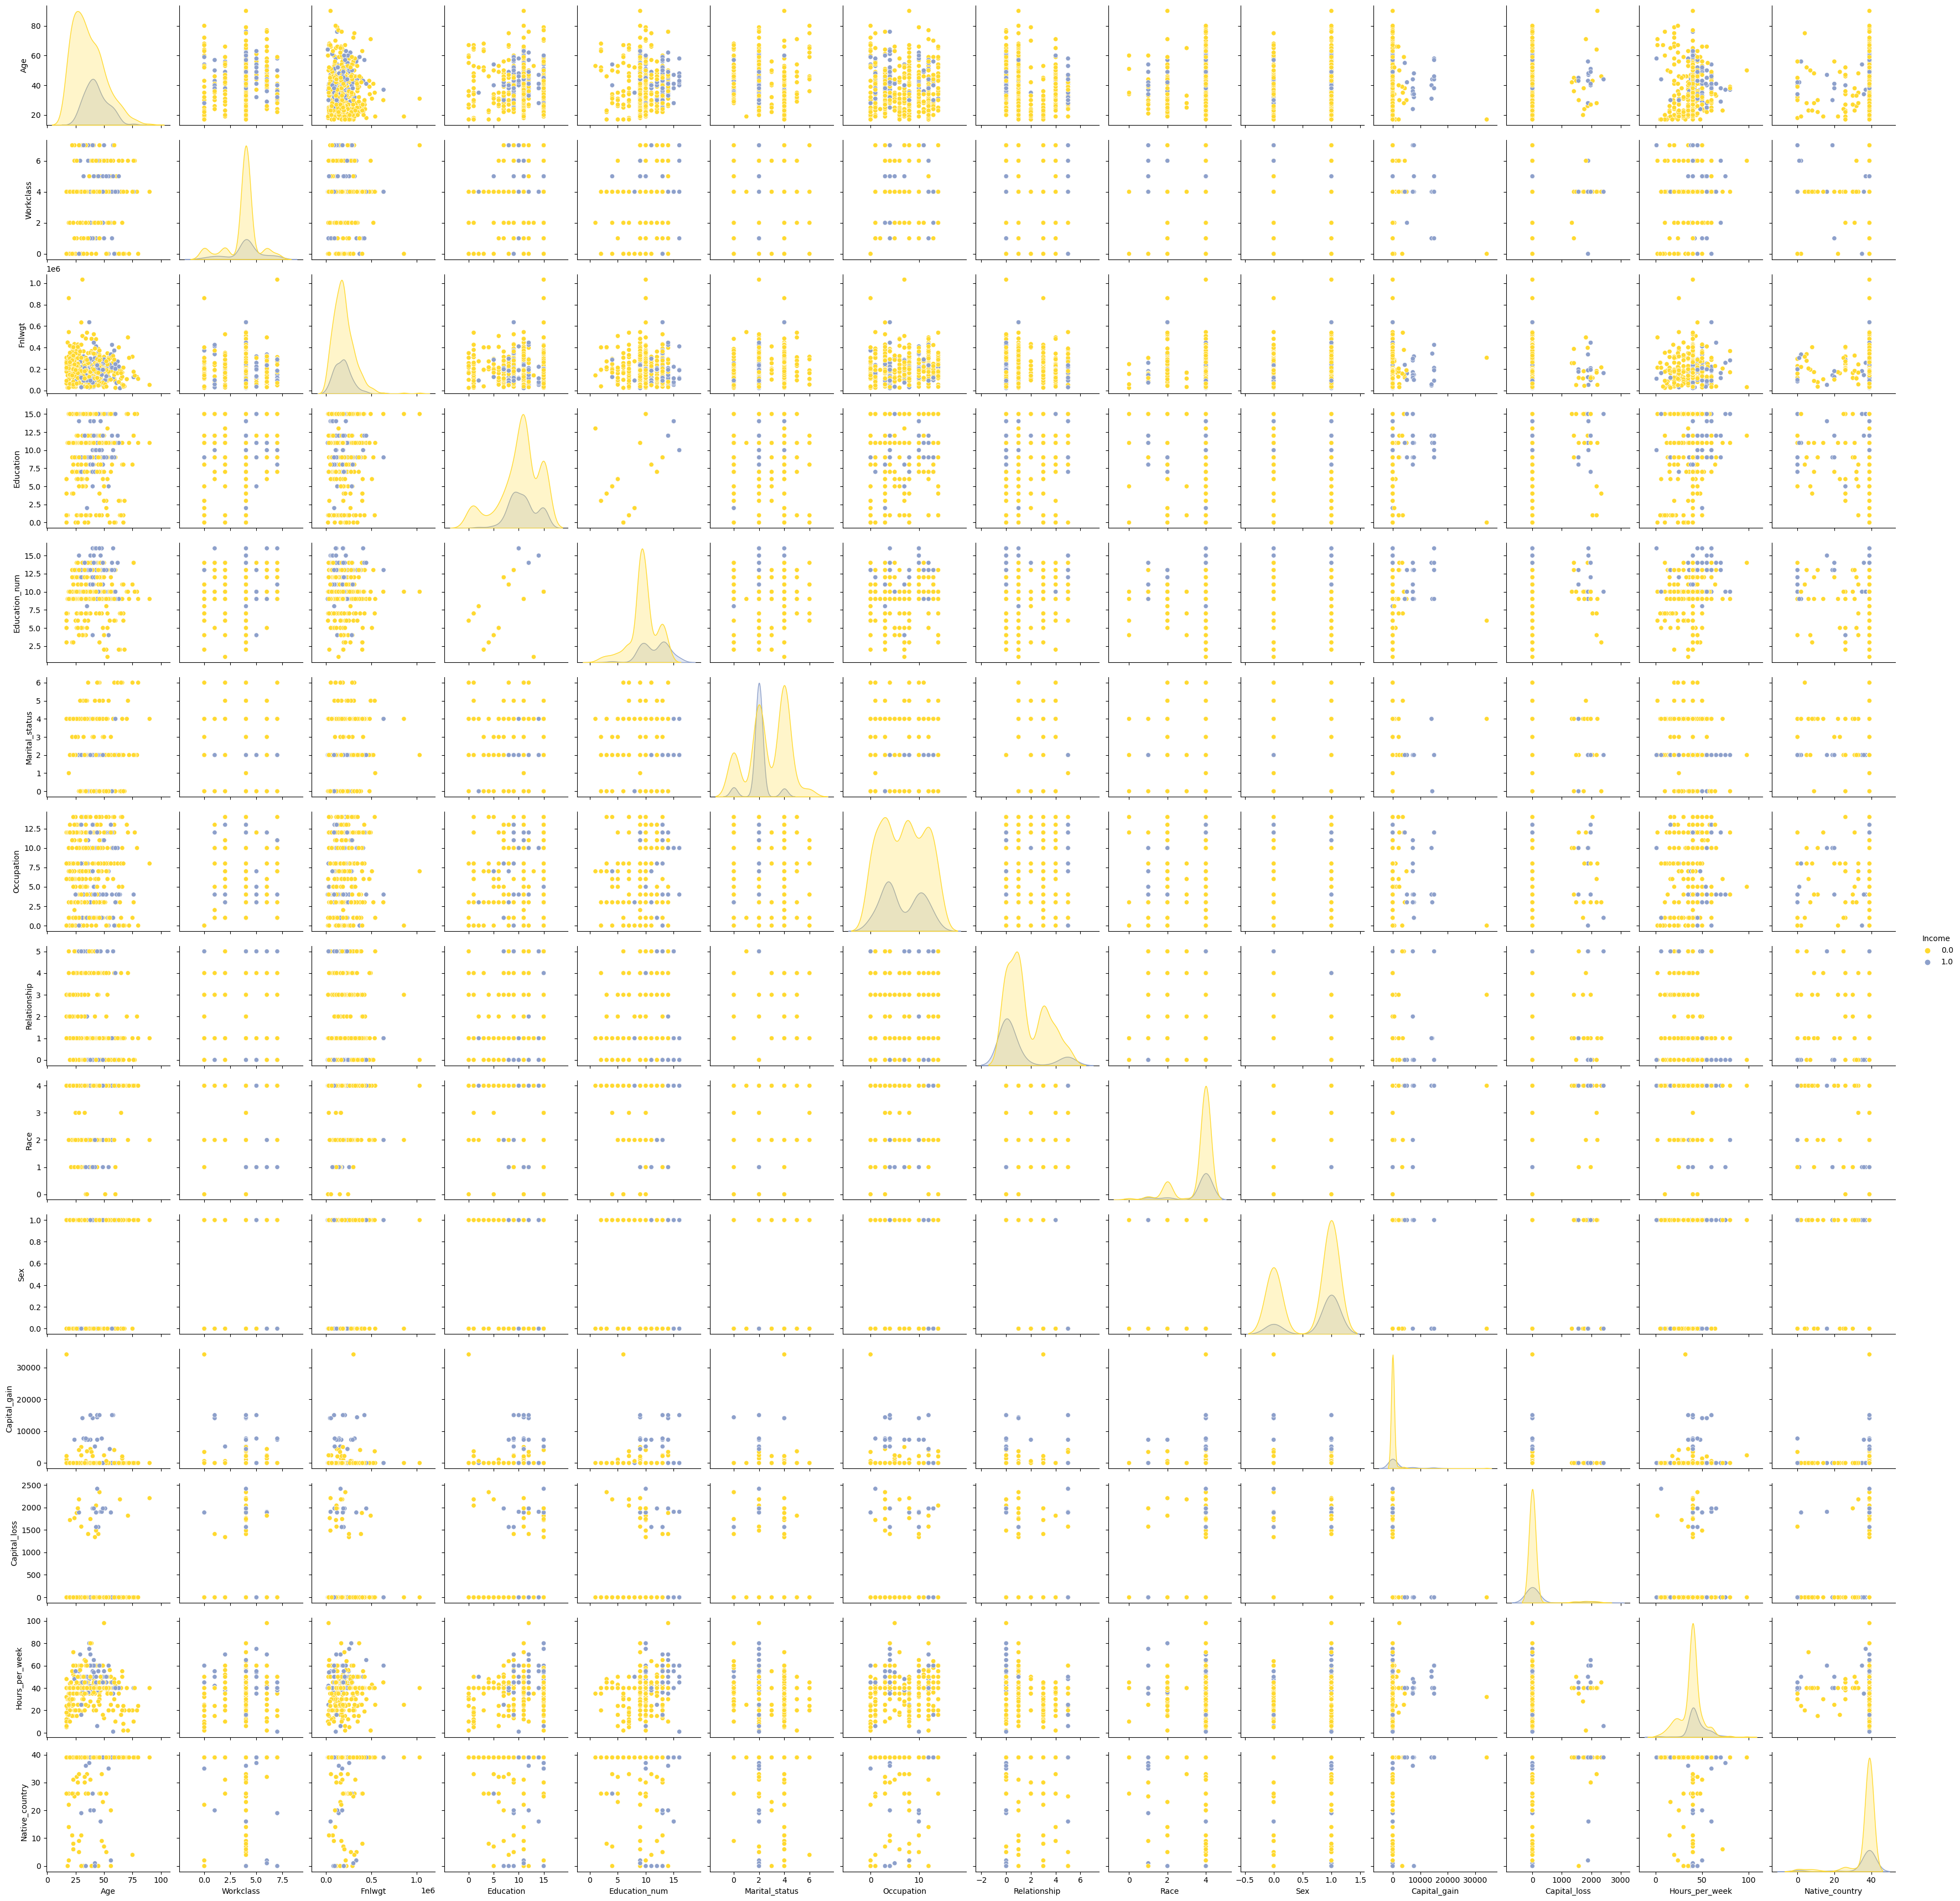

In [87]:
sns.pairplot(census_income_data.head(500), hue='Income', palette='Set2_r')
plt.show()

no conclusive correlations can be derived from the above plots.

Boxplots

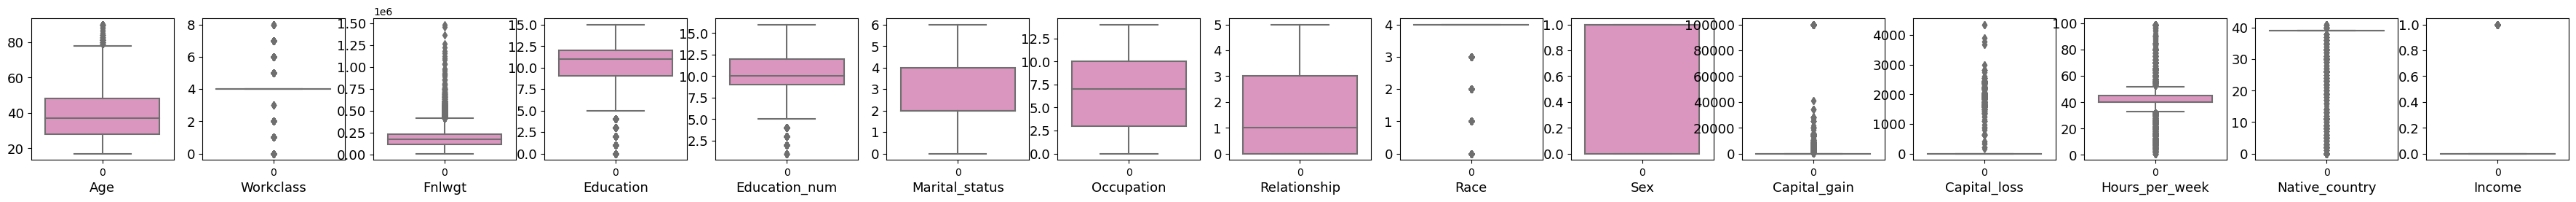

In [88]:
plt.figure(figsize=(45,45),facecolor = "white")
plotnumber=1
for col in census_income_data:
    if plotnumber<=16:
        wc=plt.subplot(15,15,plotnumber)
        sns.boxplot(census_income_data[col],palette="Set2_r")
        plt.xlabel(col,rotation=0,fontsize = 13)
        plt.yticks(rotation = 0, fontsize = 13)
    plotnumber+=1
plt.show()

Below are the findings from the above plots

1) There are outliers above the 75th percentile for the columns age, workclass, fnlwgt,hours_per_week,native country, and income.
2) There are outliers below 25th percentile for the columns workclass, education, education_num,capital_gain,capital_loss,hours_per_week, native_country and income.

In [ ]:
Skewness in the dataset

In [89]:
census_income_data.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

There is skewness in capital_gain and capital_loss columns. Lets remove it using the cbrt formula.

In [90]:
census_income_data['Capital_gain']=np.cbrt(census_income_data['Capital_gain'])
census_income_data['Capital_loss']=np.cbrt(census_income_data['Capital_loss'])

In [91]:
census_income_data.skew()

Age               0.558738
Workclass        -0.752280
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

The skewness is corrected.

Distribution plots of the output column.

C:\Users\ACHU NARAYAN\AppData\Local\Temp\ipykernel_6716\2424836491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(census_income_data['Income'],color="b", kde_kws={"shade":True}, hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


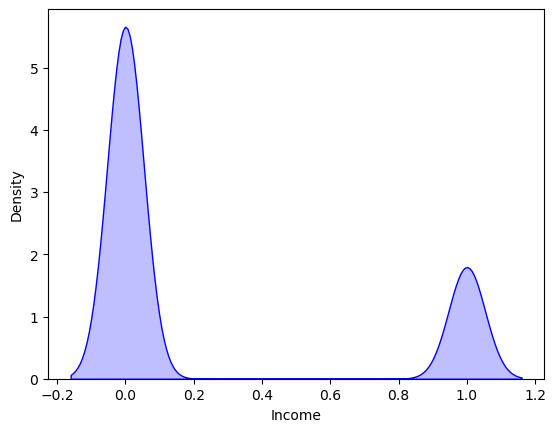

In [92]:
sns.distplot(census_income_data['Income'],color="b", kde_kws={"shade":True}, hist=False)
plt.show()

The income column is skewed to the left.

Now lets convert all the values in the columns into float values using the ordinal encoding method.

In [93]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in census_income_data.columns:
    if census_income_data[i].dtypes=='int64':
        census_income_data[i]=OE.fit_transform(loan_data[i].values.reshape(-1,1))
census_income_data

Age  Workclass    Fnlwgt  Education  Education_num  Marital_status  \
0      50.0        6.0   83311.0        9.0           13.0             2.0   
1      38.0        4.0  215646.0       11.0            9.0             0.0   
2      53.0        4.0  234721.0        1.0            7.0             2.0   
3      28.0        4.0  338409.0        9.0           13.0             2.0   
4      37.0        4.0  284582.0       12.0           14.0             2.0   
...     ...        ...       ...        ...            ...             ...   
32555  27.0        4.0  257302.0        7.0           12.0             2.0   
32556  40.0        4.0  154374.0       11.0            9.0             2.0   
32557  58.0        4.0  151910.0       11.0            9.0             6.0   
32558  22.0        4.0  201490.0       11.0            9.0             4.0   
32559  52.0        5.0  287927.0       11.0            9.0             2.0   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0             4.0           0.0   4.0  1.0      0.000000           0.0   
1             6.0           1.0   4.0  1.0      0.000000           0.0   
2             6.0           0.0   2.0  1.0      0.000000           0.0   
3            10.0           5.0   2.0  0.0      0.000000           0.0   
4             4.0           5.0   4.0  0.0      0.000000           0.0   
...           ...           ...   ...  ...           ...           ...   
32555        13.0           5.0   4.0  0.0      0.000000           0.0   
32556         7.0           0.0   4.0  1.0      0.000000           0.0   
32557         1.0           4.0   4.0  0.0      0.000000           0.0   
32558         1.0           3.0   4.0  1.0      0.000000           0.0   
32559         4.0           5.0   4.0  0.0     24.675267           0.0   

       Hours_per_week  Native_country  Income  
0                13.0            39.0     0.0  
1                40.0            39.0     0.0  
2                40.0            39.0     0.0  
3                40.0             5.0     0.0  
4                40.0            39.0     0.0  
...               ...             ...     ...  
32555            38.0            39.0     0.0  
32556            40.0            39.0     1.0  
32557            40.0            39.0     0.0  
32558            20.0            39.0     0.0  
32559            40.0            39.0     1.0  

[32560 rows x 15 columns]

Correlations

In [94]:
correlation = census_income_data.corr()
correlation

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.003786 -0.076646  -0.010508       0.036527   
Workclass       0.003786   1.000000 -0.016587   0.023537       0.052015   
Fnlwgt         -0.076646  -0.016587  1.000000  -0.028156      -0.043159   
Education      -0.010508   0.023537 -0.028156   1.000000       0.359172   
Education_num   0.036527   0.052015 -0.043159   0.359172       1.000000   
Marital_status -0.266292  -0.064798  0.028184  -0.038398      -0.069338   
Occupation     -0.020946   0.255004  0.001554  -0.021274       0.109748   
Relationship   -0.263698  -0.090449  0.008922  -0.010879      -0.094145   
Race            0.028718   0.049720 -0.021278   0.014135       0.031825   
Sex             0.088832   0.095942  0.026882  -0.027349       0.012256   
Capital_gain    0.124537   0.030252 -0.003151   0.030797       0.148259   
Capital_loss    0.052890   0.011129 -0.009382   0.016781       0.078084   
Hours_per_week  0.068756   0.138974 -0.018770   0.055510       0.148127   
Native_country -0.001151  -0.007710 -0.051957   0.064291       0.050831   
Income          0.234039   0.051645 -0.009481   0.079311       0.335182   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.266292   -0.020946     -0.263698  0.028718  0.088832   
Workclass            -0.064798    0.255004     -0.090449  0.049720  0.095942   
Fnlwgt                0.028184    0.001554      0.008922 -0.021278  0.026882   
Education            -0.038398   -0.021274     -0.010879  0.014135 -0.027349   
Education_num        -0.069338    0.109748     -0.094145  0.031825  0.012256   
Marital_status        1.000000   -0.009617      0.185461 -0.068025 -0.129337   
Occupation           -0.009617    1.000000     -0.075620  0.006779  0.080328   
Relationship          0.185461   -0.075620      1.000000 -0.116052 -0.582453   
Race                 -0.068025    0.006779     -0.116052  1.000000  0.087197   
Sex                  -0.129337    0.080328     -0.582453  0.087197  1.000000   
Capital_gain         -0.068302    0.025226     -0.086298  0.022891  0.071816   
Capital_loss         -0.035627    0.018721     -0.058887  0.018584  0.043820   
Hours_per_week       -0.190521    0.080384     -0.248975  0.041910  0.229312   
Native_country       -0.023827   -0.012532     -0.005504  0.137849 -0.008125   
Income               -0.199295    0.075448     -0.250924  0.071853  0.215995   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.124537      0.052890        0.068756       -0.001151   
Workclass           0.030252      0.011129        0.138974       -0.007710   
Fnlwgt             -0.003151     -0.009382       -0.018770       -0.051957   
Education           0.030797      0.016781        0.055510        0.064291   
Education_num       0.148259      0.078084        0.148127        0.050831   
Marital_status     -0.068302     -0.035627       -0.190521       -0.023827   
Occupation          0.025226      0.018721        0.080384       -0.012532   
Relationship       -0.086298     -0.058887       -0.248975       -0.005504   
Race                0.022891      0.018584        0.041910        0.137849   
Sex                 0.071816      0.043820        0.229312       -0.008125   
Capital_gain        1.000000     -0.061453        0.095142        0.004263   
Capital_loss       -0.061453      1.000000        0.052264        0.000412   
Hours_per_week      0.095142      0.052264        1.000000       -0.002671   
Native_country      0.004263      0.000412       -0.002671        1.000000   
Income              0.313933      0.144075        0.229690        0.015845   

                  Income  
Age             0.234039  
Workclass       0.051645  
Fnlwgt         -0.009481  
Education       0.079311  
Education_num   0.335182  
Marital_status -0.199295  
Occupation      0.075448  
Relationship   -0.250924  
Race            0.071853  
Sex             0.21

Lets visualise it using a heatmap.

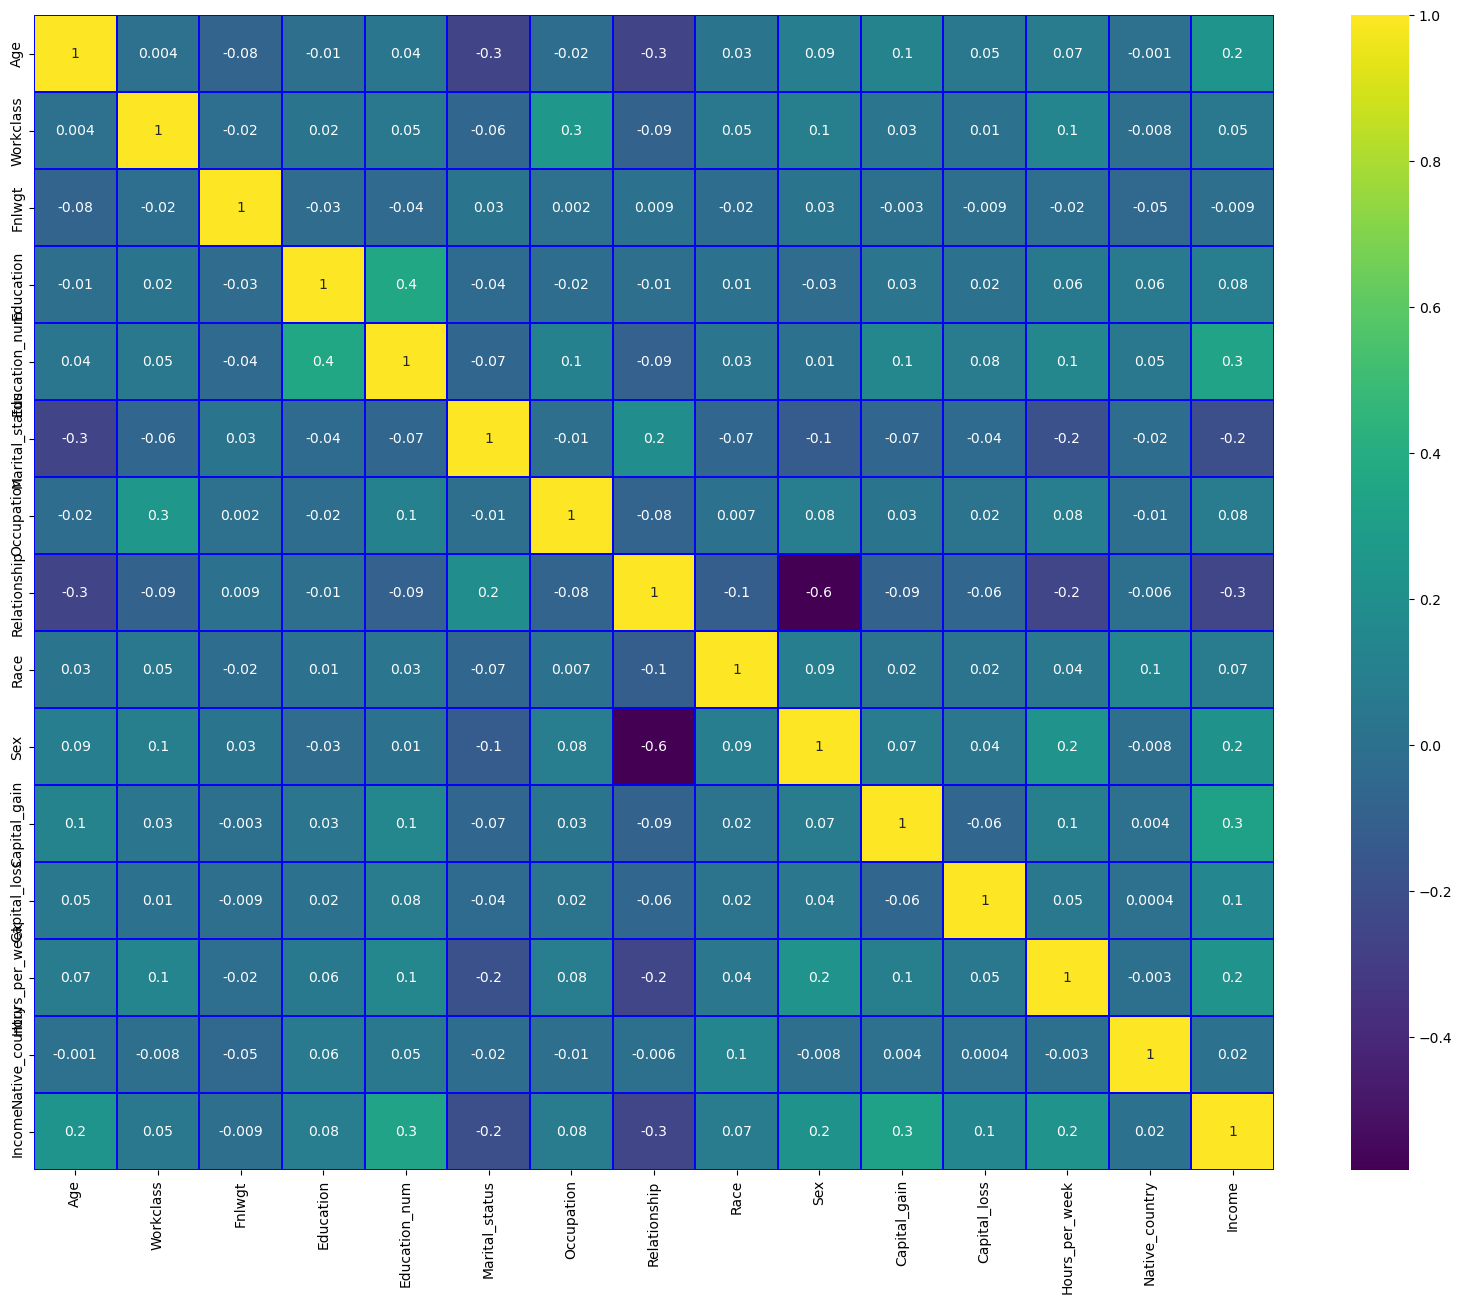

In [95]:
plt.figure(figsize = (20,15))
sns.heatmap(census_income_data.corr(), linewidths = 0.1, fmt = ".1g", linecolor= "blue", annot=True, cmap= "viridis")
plt.yticks(rotation=90);
plt.show()

Below are the following details from the above heatmap-

1) Sex and relationship have high negative correlation with each other.
2) Education and education_num has weak positive correlation with each other.
3) Marital_status and Relationship have weak negative correlation with income and age.
4) Rest of the columns have very low or no correlations to each other.

Lets sort the correlations based on the output column

In [96]:
correlation['Income'].sort_values(ascending = False)

Income            1.000000
Education_num     0.335182
Capital_gain      0.313933
Age               0.234039
Hours_per_week    0.229690
Sex               0.215995
Capital_loss      0.144075
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

In [ ]:
Lets visualise it using a boxplots

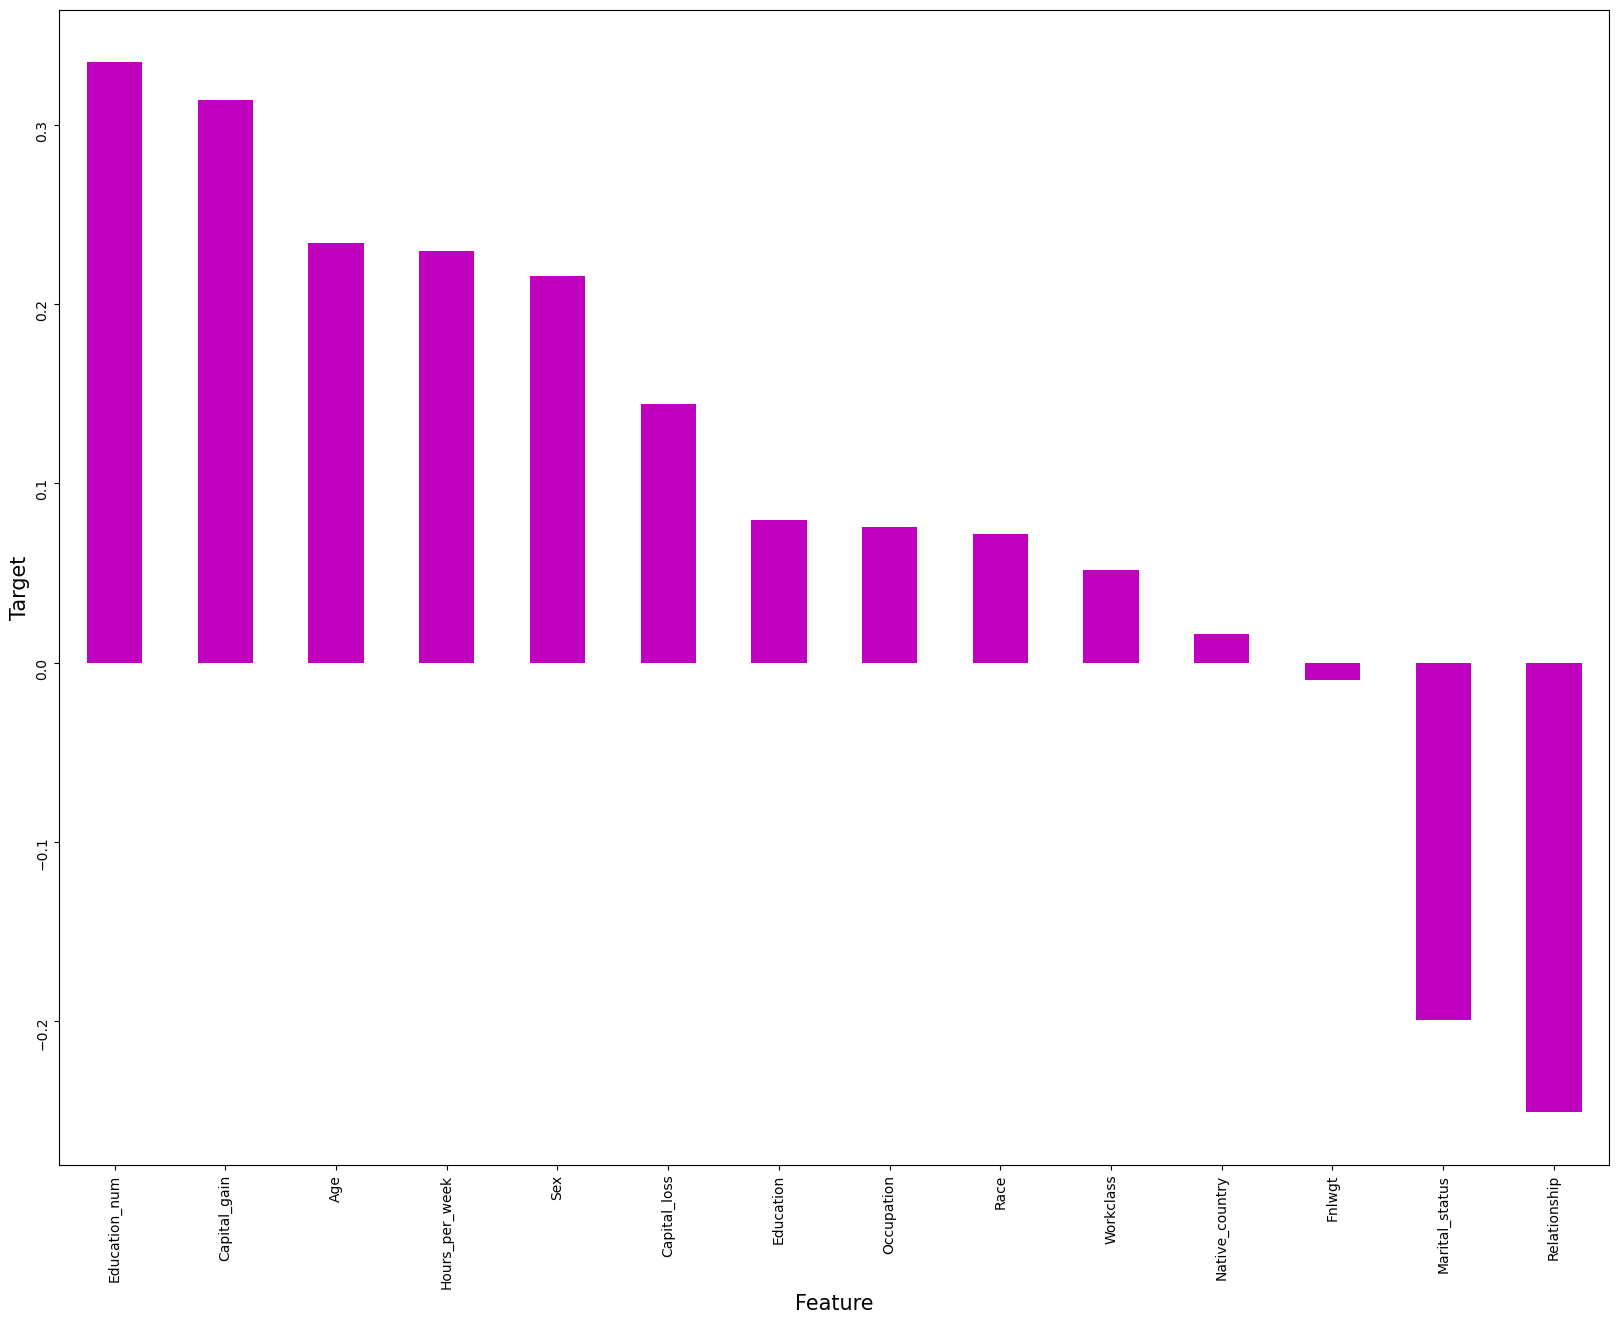

In [97]:
plt.figure(figsize = (20,15))
correlation['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.yticks(rotation=90);
plt.show()

We will be removing a lot of columns with very low correlations with the output column, but first lets scale and get the vif values.

Let's declare the x and y variables from our dataframe before scaling the input variables.

In [98]:
x = census_income_data.drop("Income", axis=1)
y = census_income_data["Income"]

we will be using the standard scaler to scale our data.

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Age  Workclass    Fnlwgt  Education  Education_num  \
0      0.837097   1.463883 -1.008742  -0.335443       1.134779   
1     -0.042640   0.090121  0.245046   0.181319      -0.420027   
2      1.057031   0.090121  0.425770  -2.402489      -1.197429   
3     -0.775755   0.090121  1.408146  -0.335443       1.134779   
4     -0.115952   0.090121  0.898170   0.439700       1.523480   
...         ...        ...       ...        ...            ...   
32555 -0.849066   0.090121  0.639710  -0.852204       0.746077   
32556  0.103982   0.090121 -0.335466   0.181319      -0.420027   
32557  1.423589   0.090121 -0.358811   0.181319      -0.420027   
32558 -1.215624   0.090121  0.110927   0.181319      -0.420027   
32559  0.983720   0.777002  0.929862   0.181319      -0.420027   

       Marital_status  Occupation  Relationship      Race       Sex  \
0           -0.406183   -0.608434     -0.900177  0.393675  0.703087   
1           -1.734026   -0.135480     -0.277810  0.393675  0.703087   
2           -0.406183   -0.135480     -0.900177 -1.962583  0.703087   
3           -0.406183    0.810427      2.211658 -1.962583 -1.422298   
4           -0.406183   -0.608434      2.211658  0.393675 -1.422298   
...               ...         ...           ...       ...       ...   
32555       -0.406183    1.519858      2.211658  0.393675 -1.422298   
32556       -0.406183    0.100997     -0.900177  0.393675  0.703087   
32557        2.249503   -1.317864      1.589291  0.393675 -1.422298   
32558        0.921660   -1.317864      0.966924  0.393675  0.703087   
32559       -0.406183   -0.608434      2.211658  0.393675 -1.422298   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  
0         -0.278624     -0.220559       -2.222120        0.291573  
1         -0.278624     -0.220559       -0.035430        0.291573  
2         -0.278624     -0.220559       -0.035430        0.291573  
3         -0.278624     -0.220559       -0.035430       -4.054157  
4         -0.278624     -0.220559       -0.035430        0.291573  
...             ...           ...             ...             ...  
32555     -0.278624     -0.220559       -0.197407        0.291573  
32556     -0.278624     -0.220559       -0.035430        0.291573  
32557     -0.278624     -0.220559       -0.035430        0.291573  
32558     -0.278624     -0.220559       -1.655200        0.291573  
32559      3.825248     -0.220559       -0.035430        0.291573  

[32560 rows x 14 columns]

Variance Inflation Factors

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values        Features
0     1.168014             Age
1     1.093785       Workclass
2     1.012317          Fnlwgt
3     1.159630       Education
4     1.226376   Education_num
5     1.127697  Marital_status
6     1.091867      Occupation
7     1.682680    Relationship
8     1.038360            Race
9     1.560598             Sex
10    1.053318    Capital_gain
11    1.019274    Capital_loss
12    1.140053  Hours_per_week
13    1.027600  Native_country

So based on our analysis we will be removing the following columns- 'Education','Occupation','Race','Workclass','Native_country', and 'Fnlwgt'.

In [101]:
columns_with_low_corelation_and_high_VIF = ['Education','Occupation','Race','Workclass','Native_country','Fnlwgt']
census_income_data = census_income_data.drop(columns=columns_with_low_corelation_and_high_VIF)

Lets repeat all the above steps agains after removing the unnecessary columns and check for the vif values.

In [102]:
x = census_income_data.drop("Income", axis=1)
y = census_income_data["Income"]

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Age  Education_num  Marital_status  Relationship       Sex  \
0      0.837097       1.134779       -0.406183     -0.900177  0.703087   
1     -0.042640      -0.420027       -1.734026     -0.277810  0.703087   
2      1.057031      -1.197429       -0.406183     -0.900177  0.703087   
3     -0.775755       1.134779       -0.406183      2.211658 -1.422298   
4     -0.115952       1.523480       -0.406183      2.211658 -1.422298   
...         ...            ...             ...           ...       ...   
32555 -0.849066       0.746077       -0.406183      2.211658 -1.422298   
32556  0.103982      -0.420027       -0.406183     -0.900177  0.703087   
32557  1.423589      -0.420027        2.249503      1.589291 -1.422298   
32558 -1.215624      -0.420027        0.921660      0.966924  0.703087   
32559  0.983720      -0.420027       -0.406183      2.211658 -1.422298   

       Capital_gain  Capital_loss  Hours_per_week  
0         -0.278624     -0.220559       -2.222120  
1         -0.278624     -0.220559       -0.035430  
2         -0.278624     -0.220559       -0.035430  
3         -0.278624     -0.220559       -0.035430  
4         -0.278624     -0.220559       -0.035430  
...             ...           ...             ...  
32555     -0.278624     -0.220559       -0.197407  
32556     -0.278624     -0.220559       -0.035430  
32557     -0.278624     -0.220559       -0.035430  
32558     -0.278624     -0.220559       -1.655200  
32559      3.825248     -0.220559       -0.035430  

[32560 rows x 8 columns]

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

VIF values        Features
0    1.158925             Age
1    1.057679   Education_num
2    1.122730  Marital_status
3    1.672404    Relationship
4    1.552891             Sex
5    1.052496    Capital_gain
6    1.018957    Capital_loss
7    1.126698  Hours_per_week

In [ ]:
The vif values are corrected.

In [ ]:
lets correct the y value counts using SMOTE analysis

In [105]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

In [106]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [107]:
y1.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

Z-score analysis

In [109]:
from scipy.stats import zscore
out_features=census_income_data[['Age', 'Education_num', 'Marital_status', 'Relationship', 'Sex', 'Capital_gain','Capital_loss','Hours_per_week']]
z=np.abs(zscore(out_features))
z

Age  Education_num  Marital_status  Relationship       Sex  \
0      0.837097       1.134779        0.406183      0.900177  0.703087   
1      0.042640       0.420027        1.734026      0.277810  0.703087   
2      1.057031       1.197429        0.406183      0.900177  0.703087   
3      0.775755       1.134779        0.406183      2.211658  1.422298   
4      0.115952       1.523480        0.406183      2.211658  1.422298   
...         ...            ...             ...           ...       ...   
32555  0.849066       0.746077        0.406183      2.211658  1.422298   
32556  0.103982       0.420027        0.406183      0.900177  0.703087   
32557  1.423589       0.420027        2.249503      1.589291  1.422298   
32558  1.215624       0.420027        0.921660      0.966924  0.703087   
32559  0.983720       0.420027        0.406183      2.211658  1.422298   

       Capital_gain  Capital_loss  Hours_per_week  
0          0.278624      0.220559        2.222120  
1          0.278624      0.220559        0.035430  
2          0.278624      0.220559        0.035430  
3          0.278624      0.220559        0.035430  
4          0.278624      0.220559        0.035430  
...             ...           ...             ...  
32555      0.278624      0.220559        0.197407  
32556      0.278624      0.220559        0.035430  
32557      0.278624      0.220559        0.035430  
32558      0.278624      0.220559        1.655200  
32559      3.825248      0.220559        0.035430  

[32560 rows x 8 columns]

lets check for all the columns with z-score above 3/-3

In [110]:
np.where(z>3)

(array([    7,     9,    22, ..., 32530, 32537, 32559], dtype=int64),
 array([5, 7, 6, ..., 7, 5, 5], dtype=int64))

now lets remove all the columns with z-score above 3/-3 and check the new shape of the dataframe 

In [111]:
census_income_data_new=census_income_data[(z<3).all(axis=1)]
census_income_data_new.shape

(29208, 9)

now lets check the data loss percentage after removal of the unwanted columns

In [112]:
data_loss_percentage = ((census_income_data.shape[0] - census_income_data_new.shape[0]) / census_income_data.shape[0]) * 100
print("Data Loss Percentage:", data_loss_percentage)

Data Loss Percentage: 10.294840294840295


The data loss percentage is under the acceptable levels.

Now lets scale the data again with our new dataframe and balance the output column using SMOTE analysis.

In [113]:
x = census_income_data_new.drop("Income", axis=1)
y = census_income_data_new["Income"]

In [114]:
y.value_counts()

0.0    23381
1.0     5827
Name: Income, dtype: int64

In [115]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

In [116]:
y1.value_counts()

0.0    23381
1.0    23381
Name: Income, dtype: int64

Predictions

lets import the necessary packages in order for us to do the classification tasks.

In [146]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

now lets get the maximum accuracy score at the maximum random state using the random forest classifier with a 70-30 split.

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxaccuracy = 0
maxrandomstate = 0
for i in range(1,200):
      x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state=i)
      RFC = RandomForestClassifier()
      RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc = accuracy_score(y_test, pred)
if acc>maxaccuracy:
    maxaccuracy=acc
    maxrandomstate=i
print("the best accuracy score",maxaccuracy,"at the following random state",maxrandomstate)

the best accuracy score 0.8724071566041771 at the following random state 199


We found out that the best accuracy score 0.8724071566041771 at the following random state 199.

lets train the model with the maximum random state using the same split and our processed dataframe.

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1, test_size = 0.30, random_state=maxrandomstate)

We will be using the following classifier- RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, Support Vector Classifier, Decision Tree Classifier, KNN Classifier and Logistic Regression.

In [120]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8713379428327037
[[5803 1116]
 [ 689 6421]]
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87      6919
         1.0       0.85      0.90      0.88      7110

    accuracy                           0.87     14029
   macro avg       0.87      0.87      0.87     14029
weighted avg       0.87      0.87      0.87     14029



Random Forest Classifier gives an accuracy score 0.8713379428327037 with a precision, recall and f1 score ranges from .84 to .89.

In [121]:
LogReg = LogisticRegression(max_iter=6000)
LogReg.fit(x_train,y_train)
predLogReg=LogReg.predict(x_test)
print(accuracy_score(y_test, predLogReg))
print(confusion_matrix(y_test,predLogReg))
print(classification_report(y_test,predLogReg))

0.7560054173497754
[[5050 1869]
 [1554 5556]]
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75      6919
         1.0       0.75      0.78      0.76      7110

    accuracy                           0.76     14029
   macro avg       0.76      0.76      0.76     14029
weighted avg       0.76      0.76      0.76     14029



Logistic Regression gives an accuracy score 0.7560054173497 with a precision, recall and f1 score ranges from .73 to .76.

In [122]:
GradBoos = GradientBoostingClassifier()
GradBoos.fit(x_train,y_train)
predGradBoos=GradBoos.predict(x_test)
print(accuracy_score(y_test, predGradBoos))
print(confusion_matrix(y_test,predGradBoos))
print(classification_report(y_test,predGradBoos))

0.8580796920664339
[[5535 1384]
 [ 607 6503]]
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      6919
         1.0       0.82      0.91      0.87      7110

    accuracy                           0.86     14029
   macro avg       0.86      0.86      0.86     14029
weighted avg       0.86      0.86      0.86     14029



Gradient Boosting Classifier gives an accuracy score 0.8580796920664339 with a precision, recall and f1 score ranges from .80 to .90.

In [147]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))

0.8118224352390734
[[6293  711]
 [ 938  821]]
              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      7004
         1.0       0.54      0.47      0.50      1759

    accuracy                           0.81      8763
   macro avg       0.70      0.68      0.69      8763
weighted avg       0.80      0.81      0.81      8763



Decision Tree Classifier gives an accuracy score 0.811822435239073 with a precision, recall and f1 score ranges from .87 to .90.

In [123]:
BagClass = BaggingClassifier()
BagClass.fit(x_train,y_train)
predBagClass=BagClass.predict(x_test)
print(accuracy_score(y_test, predBagClass))
print(confusion_matrix(y_test,predBagClass))
print(classification_report(y_test,predBagClass))

0.8666334022382208
[[5811 1108]
 [ 763 6347]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      6919
         1.0       0.85      0.89      0.87      7110

    accuracy                           0.87     14029
   macro avg       0.87      0.87      0.87     14029
weighted avg       0.87      0.87      0.87     14029



Bagging Classifier gives an accuracy score 0.866633402238220 with a precision, recall and f1 score ranges from .84 to .88.

In [124]:
Extrees = ExtraTreesClassifier()
Extrees.fit(x_train,y_train)
predExtrees=Extrees.predict(x_test)
print(accuracy_score(y_test, predExtrees))
print(confusion_matrix(y_test,predExtrees))
print(classification_report(y_test,predExtrees))

0.8726209993584717
[[5838 1081]
 [ 706 6404]]
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.87      6919
         1.0       0.86      0.90      0.88      7110

    accuracy                           0.87     14029
   macro avg       0.87      0.87      0.87     14029
weighted avg       0.87      0.87      0.87     14029



Extra Trees Classifier gives an accuracy score 0.8726209993584717 with a precision, recall and f1 score ranges from .84 to .89.

In [125]:
SVC = SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test, predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC,zero_division=1))

0.7730415567752512
[[4958 1961]
 [1223 5887]]
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      6919
         1.0       0.75      0.83      0.79      7110

    accuracy                           0.77     14029
   macro avg       0.78      0.77      0.77     14029
weighted avg       0.78      0.77      0.77     14029



Support Vector Classifier gives an accuracy score 0.7730415567752512 with a precision, recall and f1 score ranges from .72 to .80.

In [126]:
AdaBoos = AdaBoostClassifier()
AdaBoos.fit(x_train,y_train)
Adapred=AdaBoos.predict(x_test)
print(accuracy_score(y_test, Adapred))
print(confusion_matrix(y_test,Adapred))
print(classification_report(y_test,Adapred))

0.845462969563048
[[5467 1452]
 [ 716 6394]]
              precision    recall  f1-score   support

         0.0       0.88      0.79      0.83      6919
         1.0       0.81      0.90      0.86      7110

    accuracy                           0.85     14029
   macro avg       0.85      0.84      0.84     14029
weighted avg       0.85      0.85      0.84     14029



Ada Boost Classifier gives an accuracy score 0.845462969563 with a precision, recall and f1 score ranges from .79 to .88.

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print("Classification Report:")
print(classification_report(y_test, pred))

Accuracy Score: 0.8255755934136432
Confusion Matrix:
[[5290 1629]
 [ 818 6292]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.76      0.81      6919
         1.0       0.79      0.88      0.84      7110

    accuracy                           0.83     14029
   macro avg       0.83      0.82      0.82     14029
weighted avg       0.83      0.83      0.82     14029



K Neighbours Classifier gives an accuracy score 0.8255755934136432 with a precision, recall and f1 score ranges from .76 to .87.

R2 Score of Logistic Regression

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)
LogRegmodel = LogisticRegression(max_iter=1000)
LogRegmodel.fit(x_train, y_train)
true_values = y_test
predicted_values = LogRegmodel.predict(x_test)

In [132]:
first_30_true_values = y_test[:30]

In [133]:
first_30_true_values

5843     0.0
19821    1.0
25284    0.0
30696    0.0
13725    0.0
1630     0.0
15707    1.0
10097    0.0
12969    1.0
21487    0.0
22469    1.0
13831    0.0
27439    1.0
25072    0.0
11565    0.0
30548    1.0
27745    0.0
10169    0.0
21977    1.0
9878     0.0
19404    0.0
22767    0.0
25850    1.0
558      0.0
15191    0.0
27380    0.0
5106     0.0
3715     1.0
30219    0.0
7065     0.0
Name: Income, dtype: float64

In [134]:
first_30_predicted_values = predicted_values[:30]

In [135]:
first_30_predicted_values

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [137]:
from sklearn.metrics import r2_score
predicted_values = [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]
true_values = [0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0.,0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.]
r2 = r2_score(true_values, predicted_values)
print("R2 Score:", r2)

R2 Score: -0.11111111111111138


We get an r2 score of -0.1111111111111 for logistic regression.

Cross-Validation Scores

In [138]:
X = x
y = y
classifier = ExtraTreesClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.82762752 0.83669976 0.82796987 0.83530217 0.8317069 ]
Mean Score: 0.831861246459219
Standard Deviation: 0.003697085548240176


In [139]:
X = x
y = y
classifier = BaggingClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.82403287 0.83139336 0.82471756 0.83444616 0.82520116]
Mean Score: 0.8279582214077598
Standard Deviation: 0.004181031501767836


In [140]:
X = x
y = y
classifier = RandomForestClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.82625813 0.83960972 0.82865457 0.83992467 0.83495977]
Mean Score: 0.8338813722847517
Standard Deviation: 0.005584472329575951


In [141]:
X = x
y = y
classifier = LogisticRegression(max_iter=1000)
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='r2')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [-0.13007917 -0.09292075 -0.08863479 -0.10439391 -0.0883105 ]
Mean Score: -0.10086782305716908
Standard Deviation: 0.015724027826451242


In [142]:
from sklearn.svm import SVC
X = x
y = y
classifier = SVC()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.81633002 0.81684355 0.81496063 0.81287451 0.82074987]
Mean Score: 0.8163517160006638
Standard Deviation: 0.002592768330802938


In [143]:
X = x
y = y
classifier = AdaBoostClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.84303321 0.84697022 0.85552893 0.85704503 0.85327855]
Mean Score: 0.8511711853329247
Standard Deviation: 0.005325556084476827


In [144]:
X = x
y = y
classifier = KNeighborsClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.81735707 0.82831222 0.82334817 0.82999486 0.82366033]
Mean Score: 0.8245345311604255
Standard Deviation: 0.0044220768157423014


In [145]:
X = x
y = y
classifier = GradientBoostingClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.84714139 0.85604245 0.85655597 0.86303715 0.85413457]
Mean Score: 0.8553823064607042
Standard Deviation: 0.00509665567909288


In [148]:
X = x
y = y
classifier = DecisionTreeClassifier()
cross_val_scores = cross_val_score(classifier, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Score:", cross_val_scores.mean())
print("Standard Deviation:", cross_val_scores.std())

Cross-Validation Scores: [0.81324889 0.82403287 0.8165012  0.82520116 0.82160589]
Mean Score: 0.8201180009261755
Standard Deviation: 0.004552900350808438


After analysing all the cross validation scores, we found that kneighbours classifier is best model for hyperparameter tuning with our dataframe because it has the least difference between accuract and cross validation scores i.e.=0.00104106241.

Hyperparameter Tuning

We will be using the following parameters to select best hyperparameters for k neighbours classifer- 'n_neighbors': [3, 5, 7, 10],'weights': ['uniform', 'distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],'p': [1, 2]

In [149]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': [3, 5, 7, 10],'weights': ['uniform', 'distance'],'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],'p': [1, 2]}

In [150]:
GSCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)

In [151]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

now lets select the best parameters for our model.

In [152]:
GSCV.best_params_

{'algorithm': 'brute', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}

now lets train the model with these hyperparameters and get the accuracy score

In [153]:
Selected_model = KNeighborsClassifier(algorithm='brute',n_neighbors= 10, p= 1, weights = 'uniform')
Selected_model.fit(x_train,y_train)
pred = Selected_model.predict(x_test)
accuracy= accuracy_score(y_test,pred)
print(accuracy*100)

82.58587241812165


We got an accuracy score of 82.5858724181216 percent

ROC-AUC Curve

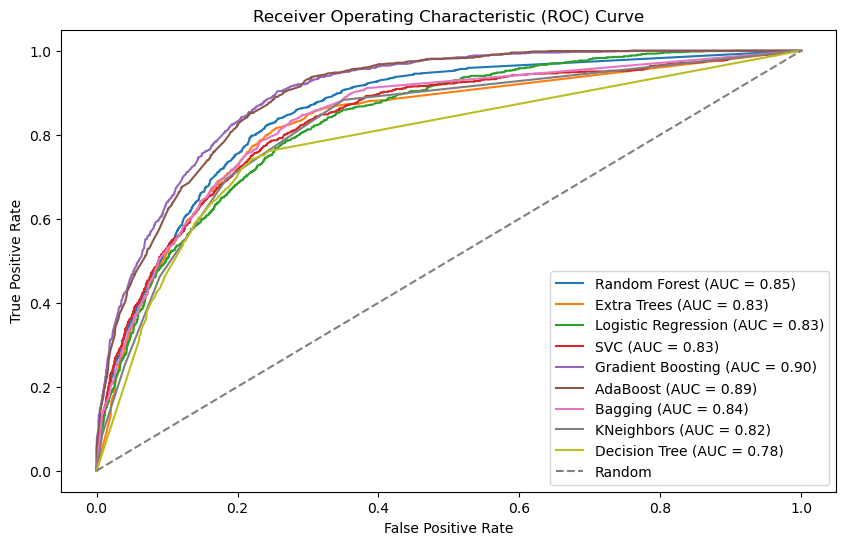

Random Forest: ROC AUC = 0.85
Extra Trees: ROC AUC = 0.83
Logistic Regression: ROC AUC = 0.83
SVC: ROC AUC = 0.83
Gradient Boosting: ROC AUC = 0.90
AdaBoost: ROC AUC = 0.89
Bagging: ROC AUC = 0.84
KNeighbors: ROC AUC = 0.82
Decision Tree: ROC AUC = 0.78


In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ("Extra Trees", ExtraTreesClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("SVC", SVC(probability=True)),  
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("Bagging", BaggingClassifier()),
    ("KNeighbors", KNeighborsClassifier()),  
    ("Decision Tree", DecisionTreeClassifier())  
]

roc_auc_scores = {}

plt.figure(figsize=(10, 6))
for classifiername, classifier in classifiers:
    classifier.fit(x_train, y_train)
    if hasattr(classifier, "predict_proba"):
        y_pred_probability = classifier.predict_proba(x_test)[:, 1]
    else:
        y_pred_probability = classifier.decision_function(x_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
    roc_auc = roc_auc_score(y_test, y_pred_probability)
    roc_auc_scores[classifiername] = roc_auc
    
    plt.plot(fpr, tpr, label=f'{classifiername} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

for name, roc_auc in roc_auc_scores.items():
    print(f'{name}: ROC AUC = {roc_auc:.2f}')

We got fpr/tpr ratio of .82 using the KNeighbours classifier.

Saving the model

We will be using the joblib method to save our model

In [155]:
import joblib
joblib.dump(Selected_model,"Census_Income_Data_Analysis.pkl")

['Census_Income_Data_Analysis.pkl']

In [156]:
model = joblib.load("Census_Income_Data_Analysis.pkl")
prediction = model.predict(x_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

now lets compare the predicted values and original values and see how our model has performed.

In [157]:
finaldata = np.array(y_test)
incometype = pd.DataFrame()
incometype["ourprediction"] = prediction
incometype["originalvalues"] = finaldata
incometype

ourprediction  originalvalues
0               0.0             0.0
1               0.0             1.0
2               0.0             0.0
3               0.0             0.0
4               0.0             0.0
...             ...             ...
5837            0.0             0.0
5838            0.0             0.0
5839            0.0             0.0
5840            0.0             0.0
5841            0.0             0.0

[5842 rows x 2 columns]

we can see that our model has performed well, which leads us to conclude our project.